In [68]:
# Make sure you are using the cmip6-2019.10 kernel

# Add ldcpy root to system path (MODIFY FOR YOUR LDCPY CODE LOCATION)
import sys

#sys.path.insert(0, '/glade/u/home/apinard/newldcpy/ldcpy')
sys.path.insert(0, '/Users/alex/git/ldcpy')
import ldcpy

# Display output of plots directly in Notebook
%matplotlib inline
# Automatically reload module if it is edited
%reload_ext autoreload
%autoreload 2

# silence warnings
import warnings

warnings.filterwarnings("ignore")
import os
import xarray as xr
xr.set_options(keep_attrs=True)
#hdf_pp = os.environ["HDF5_PLUGIN_PATH"]
#env_list = ['export HDF5_PLUGIN_PATH='+hdf_pp]

# load netcdf file

In [243]:
# ds = ldcpy.open_datasets(data_type="cam-fv", varnames=[f"CH4"], list_of_files=["../../data/methane/Permian_res_0.5_2021_12.nc",
#                                                                                  "../../data/methane/Permian_res_0.5_2021_11.nc",
#                                                                                  "../../data/methane/Permian_res_0.5_2021_10.nc",
#                                                                                  "../../data/methane/Permian_res_0.5_2021_9.nc",
#                                                                                  "../../data/methane/Permian_res_0.5_2021_8.nc",
#                                                                                  "../../data/methane/Permian_res_0.5_2021_7.nc",
#                                                                                  "../../data/methane/Permian_res_0.5_2021_6.nc",
#                                                                                  "../../data/methane/Permian_res_0.5_2021_5.nc",
#                                                                                  "../../data/methane/Permian_res_0.5_2021_4.nc",
#                                                                                  "../../data/methane/Permian_res_0.5_2021_3.nc",
#                                                                                  "../../data/methane/Permian_res_0.5_2021_2.nc",
#                                                                                  "../../data/methane/Permian_res_0.5_2021_1.nc"], labels=["12", "11", "10", "9", "8", "7", "6", "5", "4", "3", "2", "1"], weights=False)

ds = ldcpy.open_datasets(data_type="cam-fv", varnames=[f"CH4"], list_of_files=["../../data/methane/Bakken_res_0.5_2018_12.nc",
                                                                               "../../data/methane/Bakken_res_0.5_2018_11.nc",
                                                                               "../../data/methane/Bakken_res_0.5_2018_10.nc",
                                                                               "../../data/methane/Bakken_res_0.5_2018_9.nc",
                                                                               "../../data/methane/Bakken_res_0.5_2018_8.nc",
                                                                               "../../data/methane/Bakken_res_0.5_2018_7.nc",
                                                                               "../../data/methane/Bakken_res_0.5_2018_6.nc",
                                                                               "../../data/methane/Bakken_res_0.5_2018_5.nc"], labels=["Dec", "Nov", "Oct", "Sept", "Aug", "Jul", "Jun", "May"], weights=False)

# ds = ldcpy.open_datasets(data_type="cam-fv", varnames=[f"CH4"], list_of_files=["../../data/methane/Permian_res_0.5_2018_12.nc",
#                                                                                "../../data/methane/Permian_res_0.5_2018_11.nc",
#                                                                                "../../data/methane/Permian_res_0.5_2018_10.nc",
#                                                                                "../../data/methane/Permian_res_0.5_2018_9.nc",
#                                                                                "../../data/methane/Permian_res_0.5_2018_8.nc",
#                                                                                "../../data/methane/Permian_res_0.5_2018_7.nc",
#                                                                                "../../data/methane/Permian_res_0.5_2018_6.nc",
#                                                                                "../../data/methane/Permian_res_0.5_2018_5.nc"], labels=["Dec", "Nov", "Oct", "Sept", "Aug", "Jul", "Jun", "May"], weights=False)

col_ts = ldcpy.open_datasets(
    "cam-fv",
    ["TS"],
    [
        "../../../ldcpy/data/cam-fv/orig.TS.100days.nc",
        "../../../ldcpy/data/cam-fv/zfp1.0.TS.100days.nc",
        "../../../ldcpy/data/cam-fv/zfp1e-1.TS.100days.nc",
    ],
    ["orig", "zfpA1.0", "zfpA1e-1"],
)


dataset size in GB 0.00

dataset size in GB 0.07



In [207]:
ds

<xarray.Dataset>
Dimensions:     (collection: 12, lat: 10, lon: 14, time: 31)
Coordinates:
  * lat         (lat) float64 30.25 30.75 31.25 31.75 ... 33.75 34.25 34.75
  * lon         (lon) float64 -106.8 -106.2 -105.8 ... -101.2 -100.8 -100.2
  * time        (time) int64 1 2 3 4 5 6 7 8 9 10 ... 23 24 25 26 27 28 29 30 31
  * collection  (collection) <U2 '12' '11' '10' '9' '8' ... '5' '4' '3' '2' '1'
Data variables:
    CH4         (collection, lat, lon, time) float64 dask.array<chunksize=(1, 10, 14, 31), meta=np.ndarray>
Attributes:
    cell_measures:  area: cell_area
    data_type:      cam-fv
    file_size:      {'12': 44662, '11': 44662, '10': 44662, '9': 44662, '8': ...

In [208]:
ds["CH4"].lon.attrs["units"] = "degrees_east"

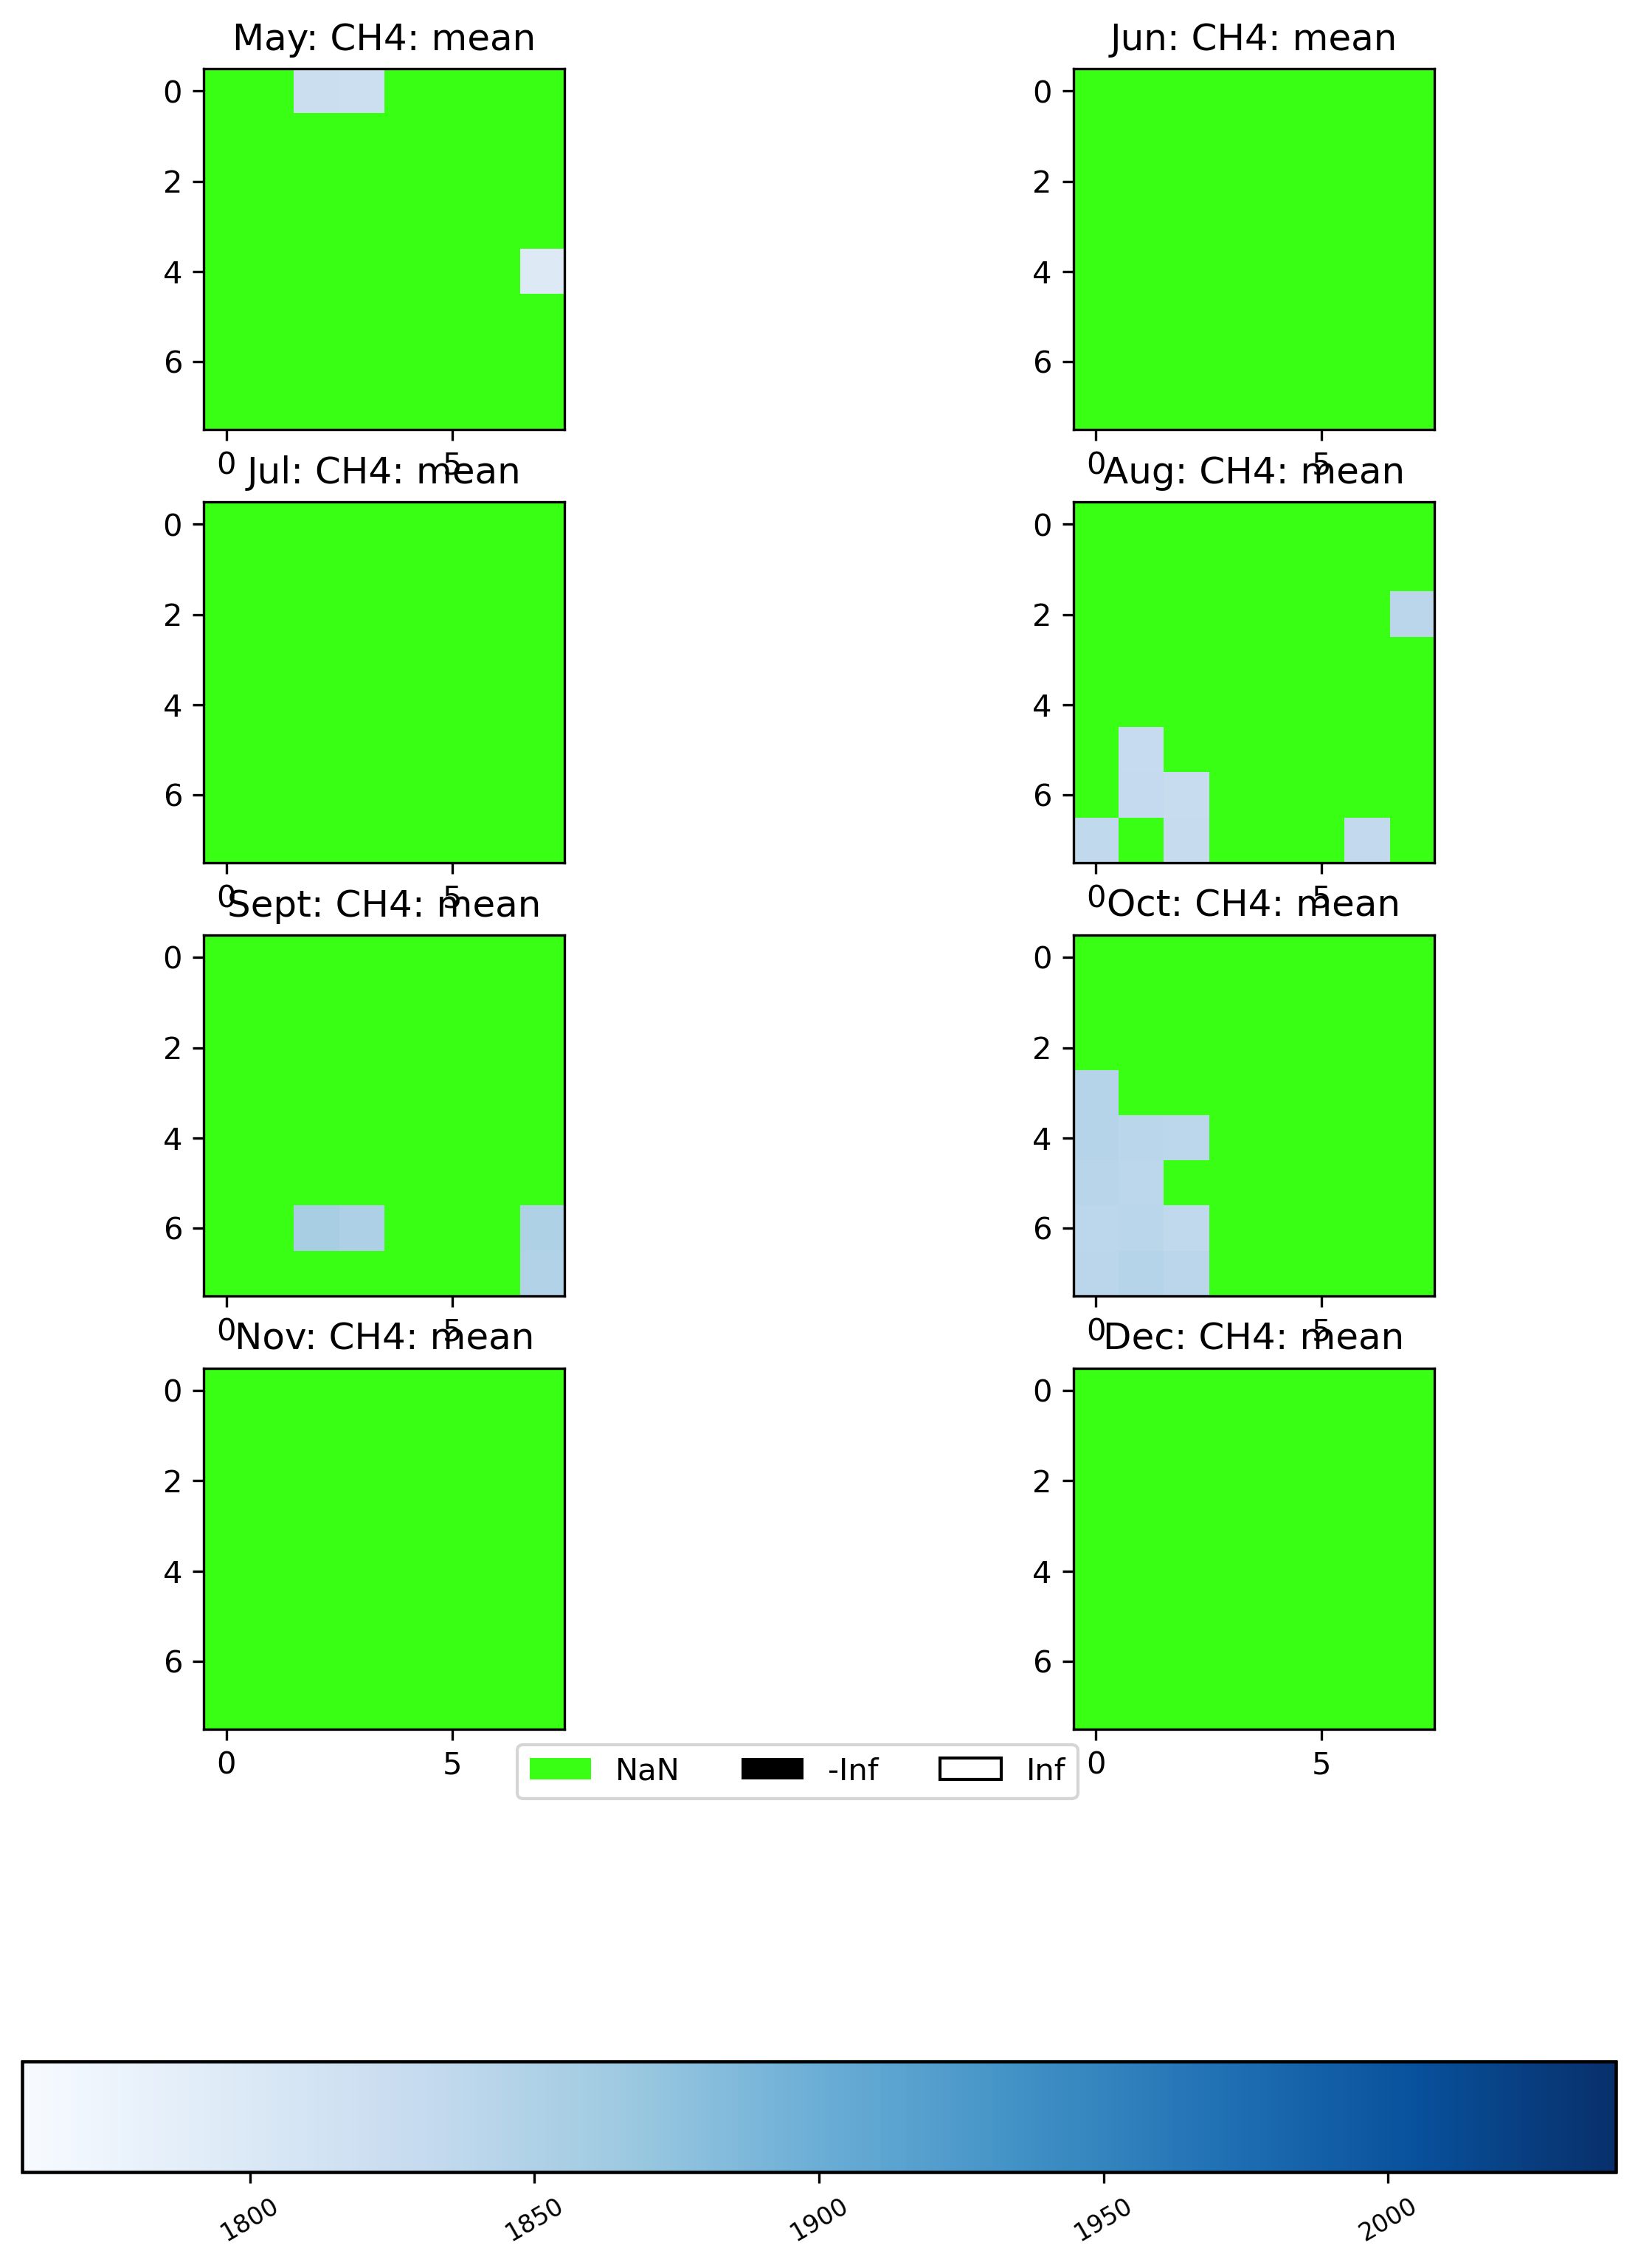

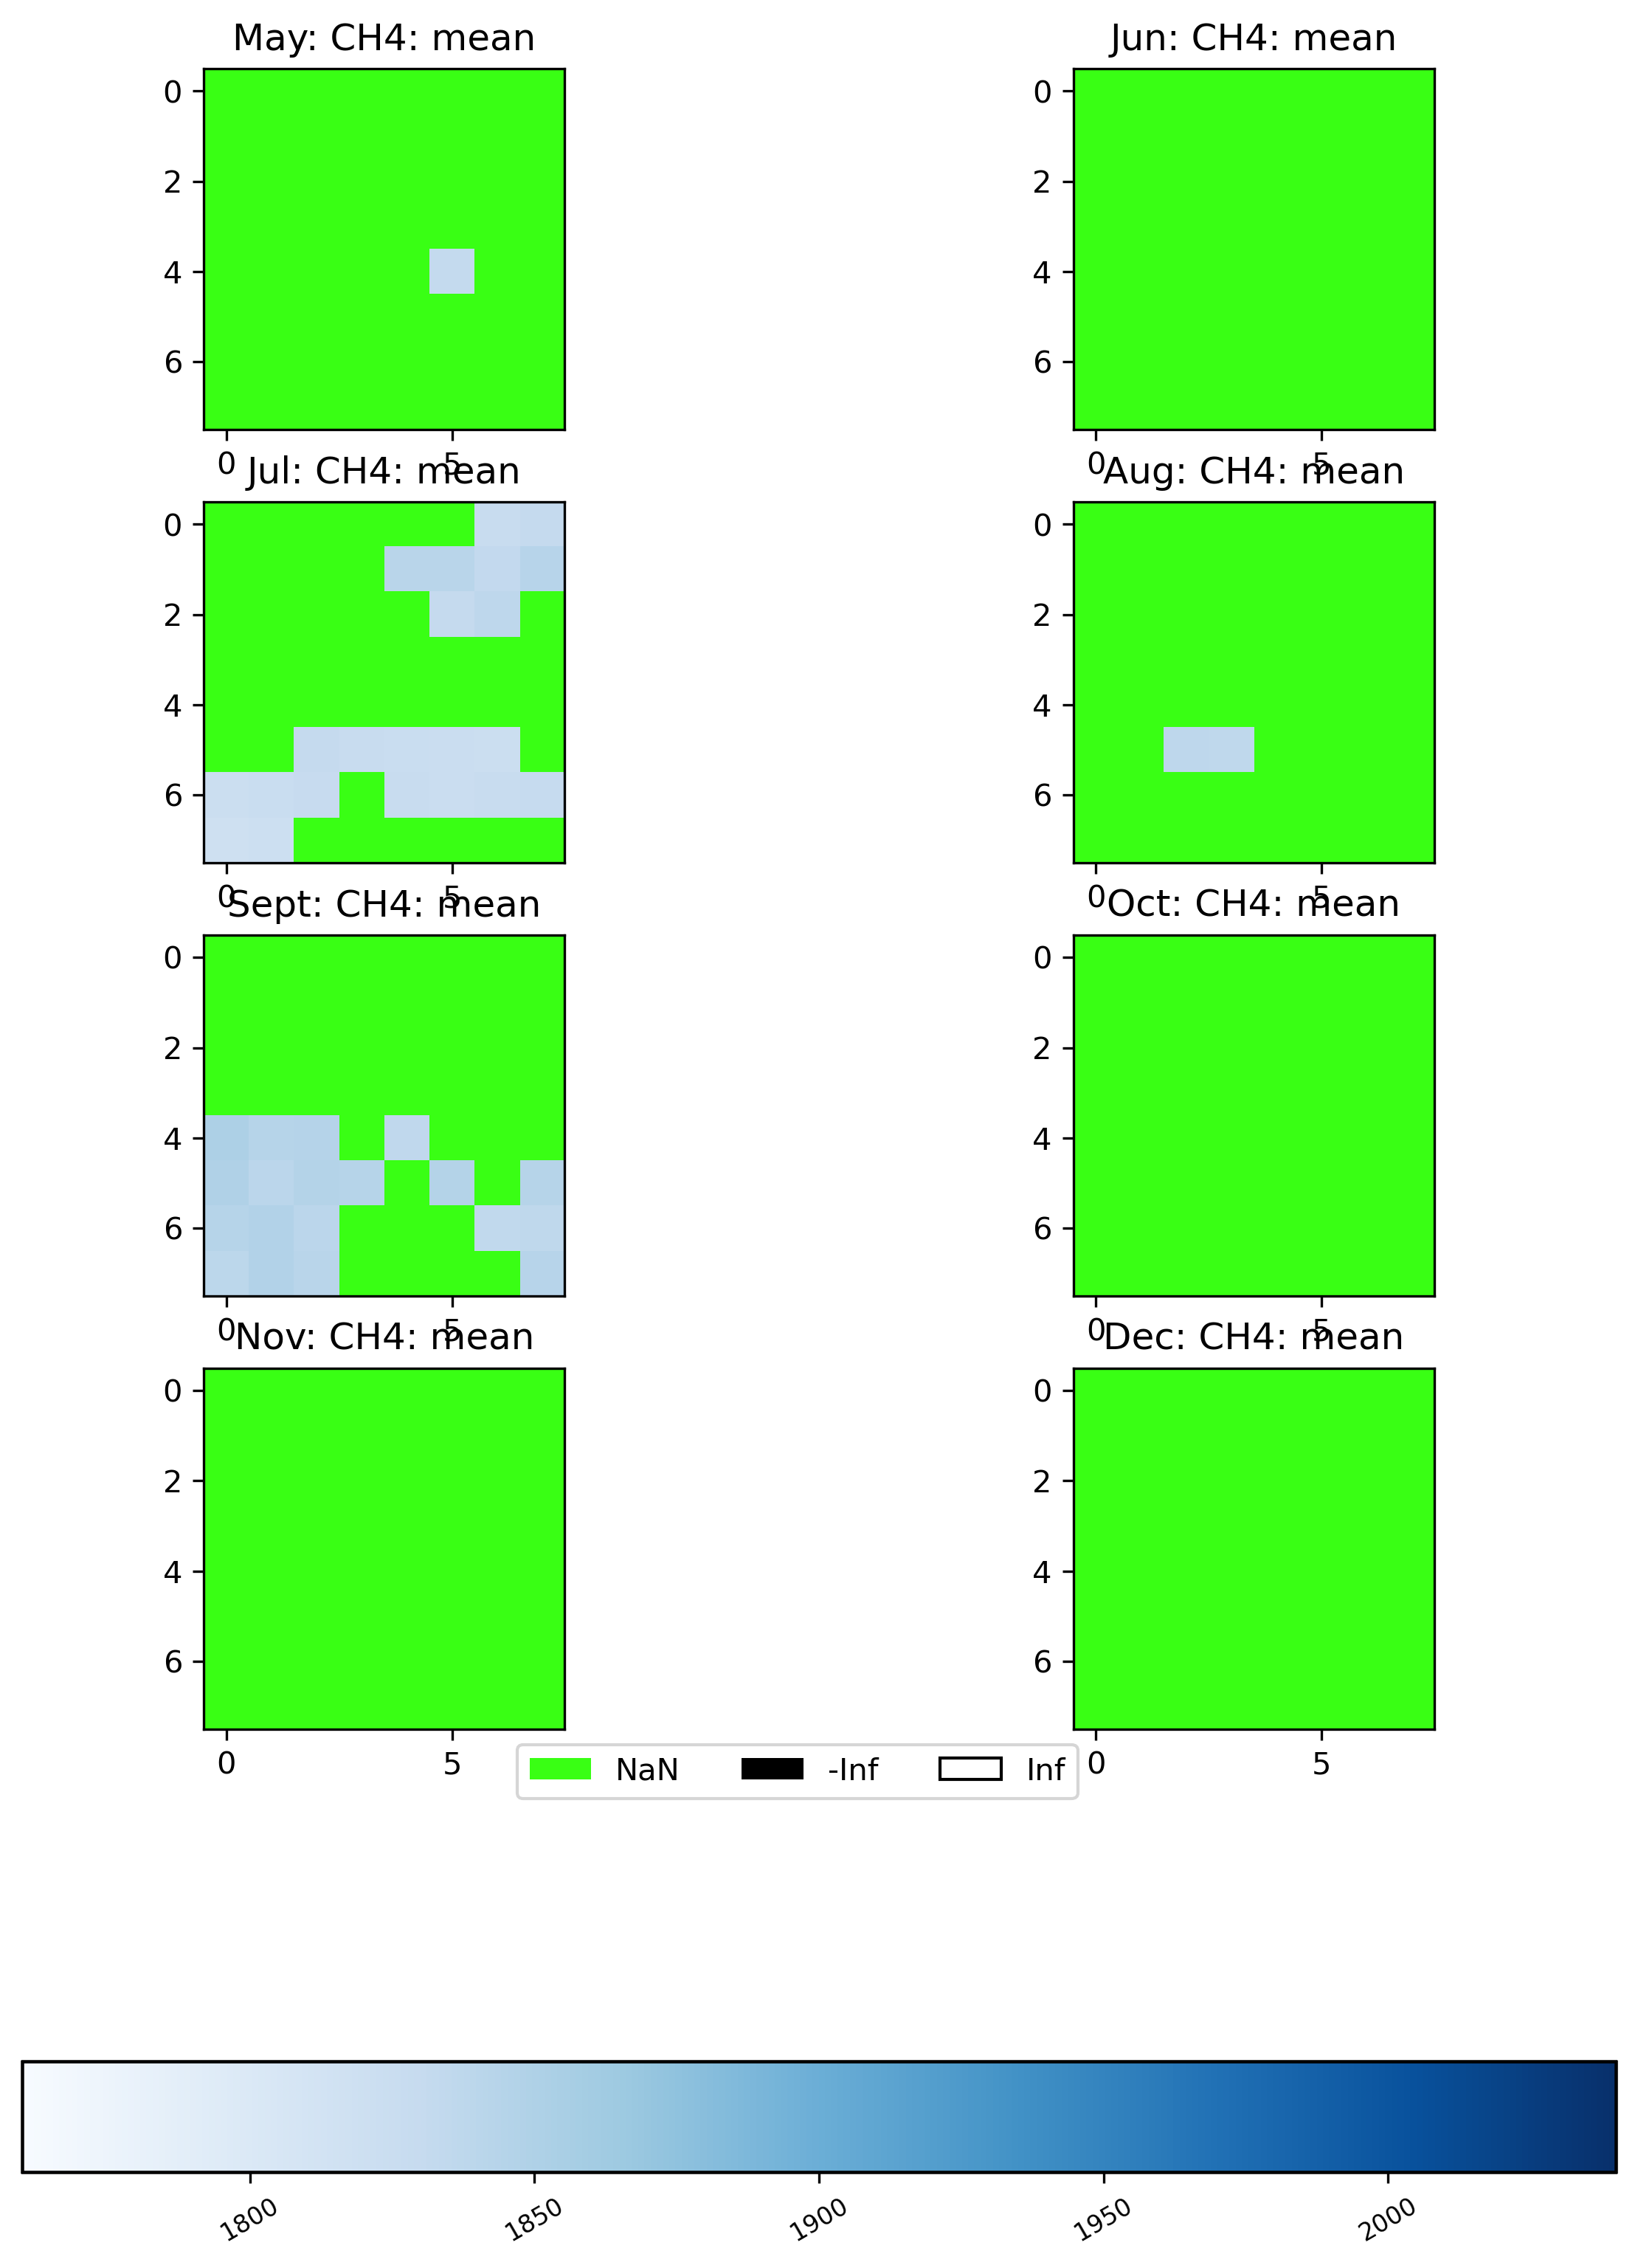

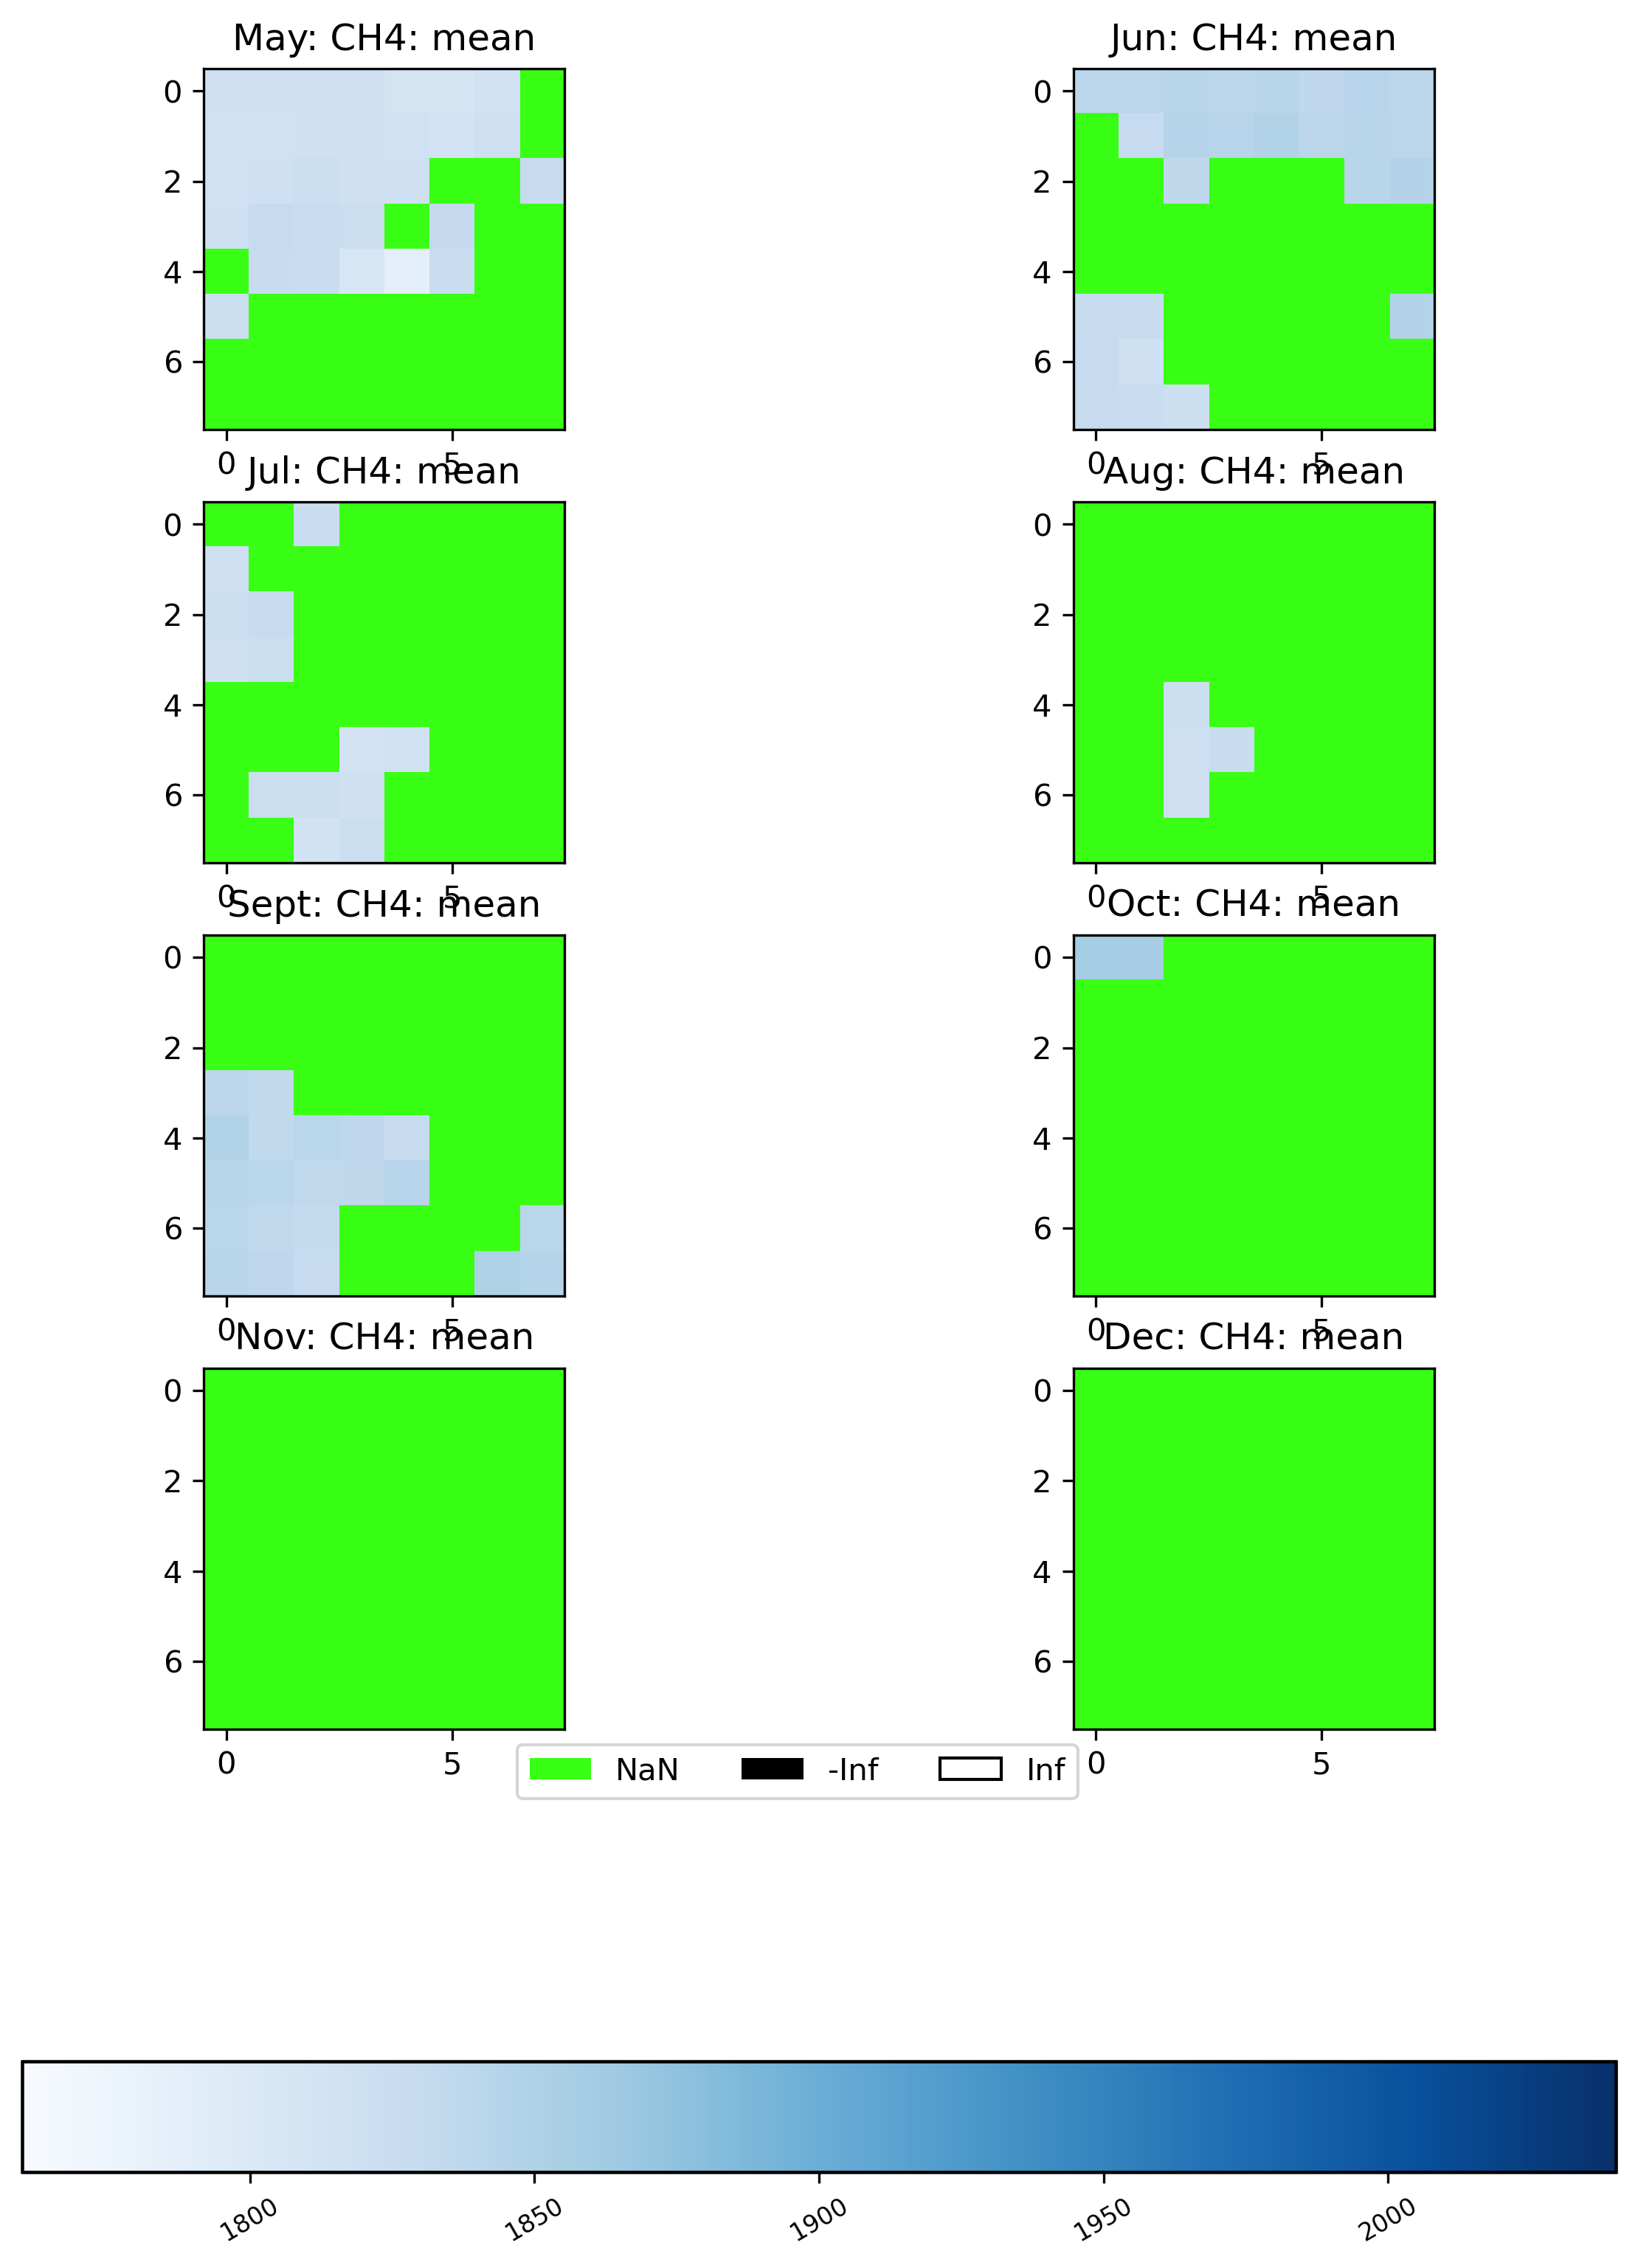

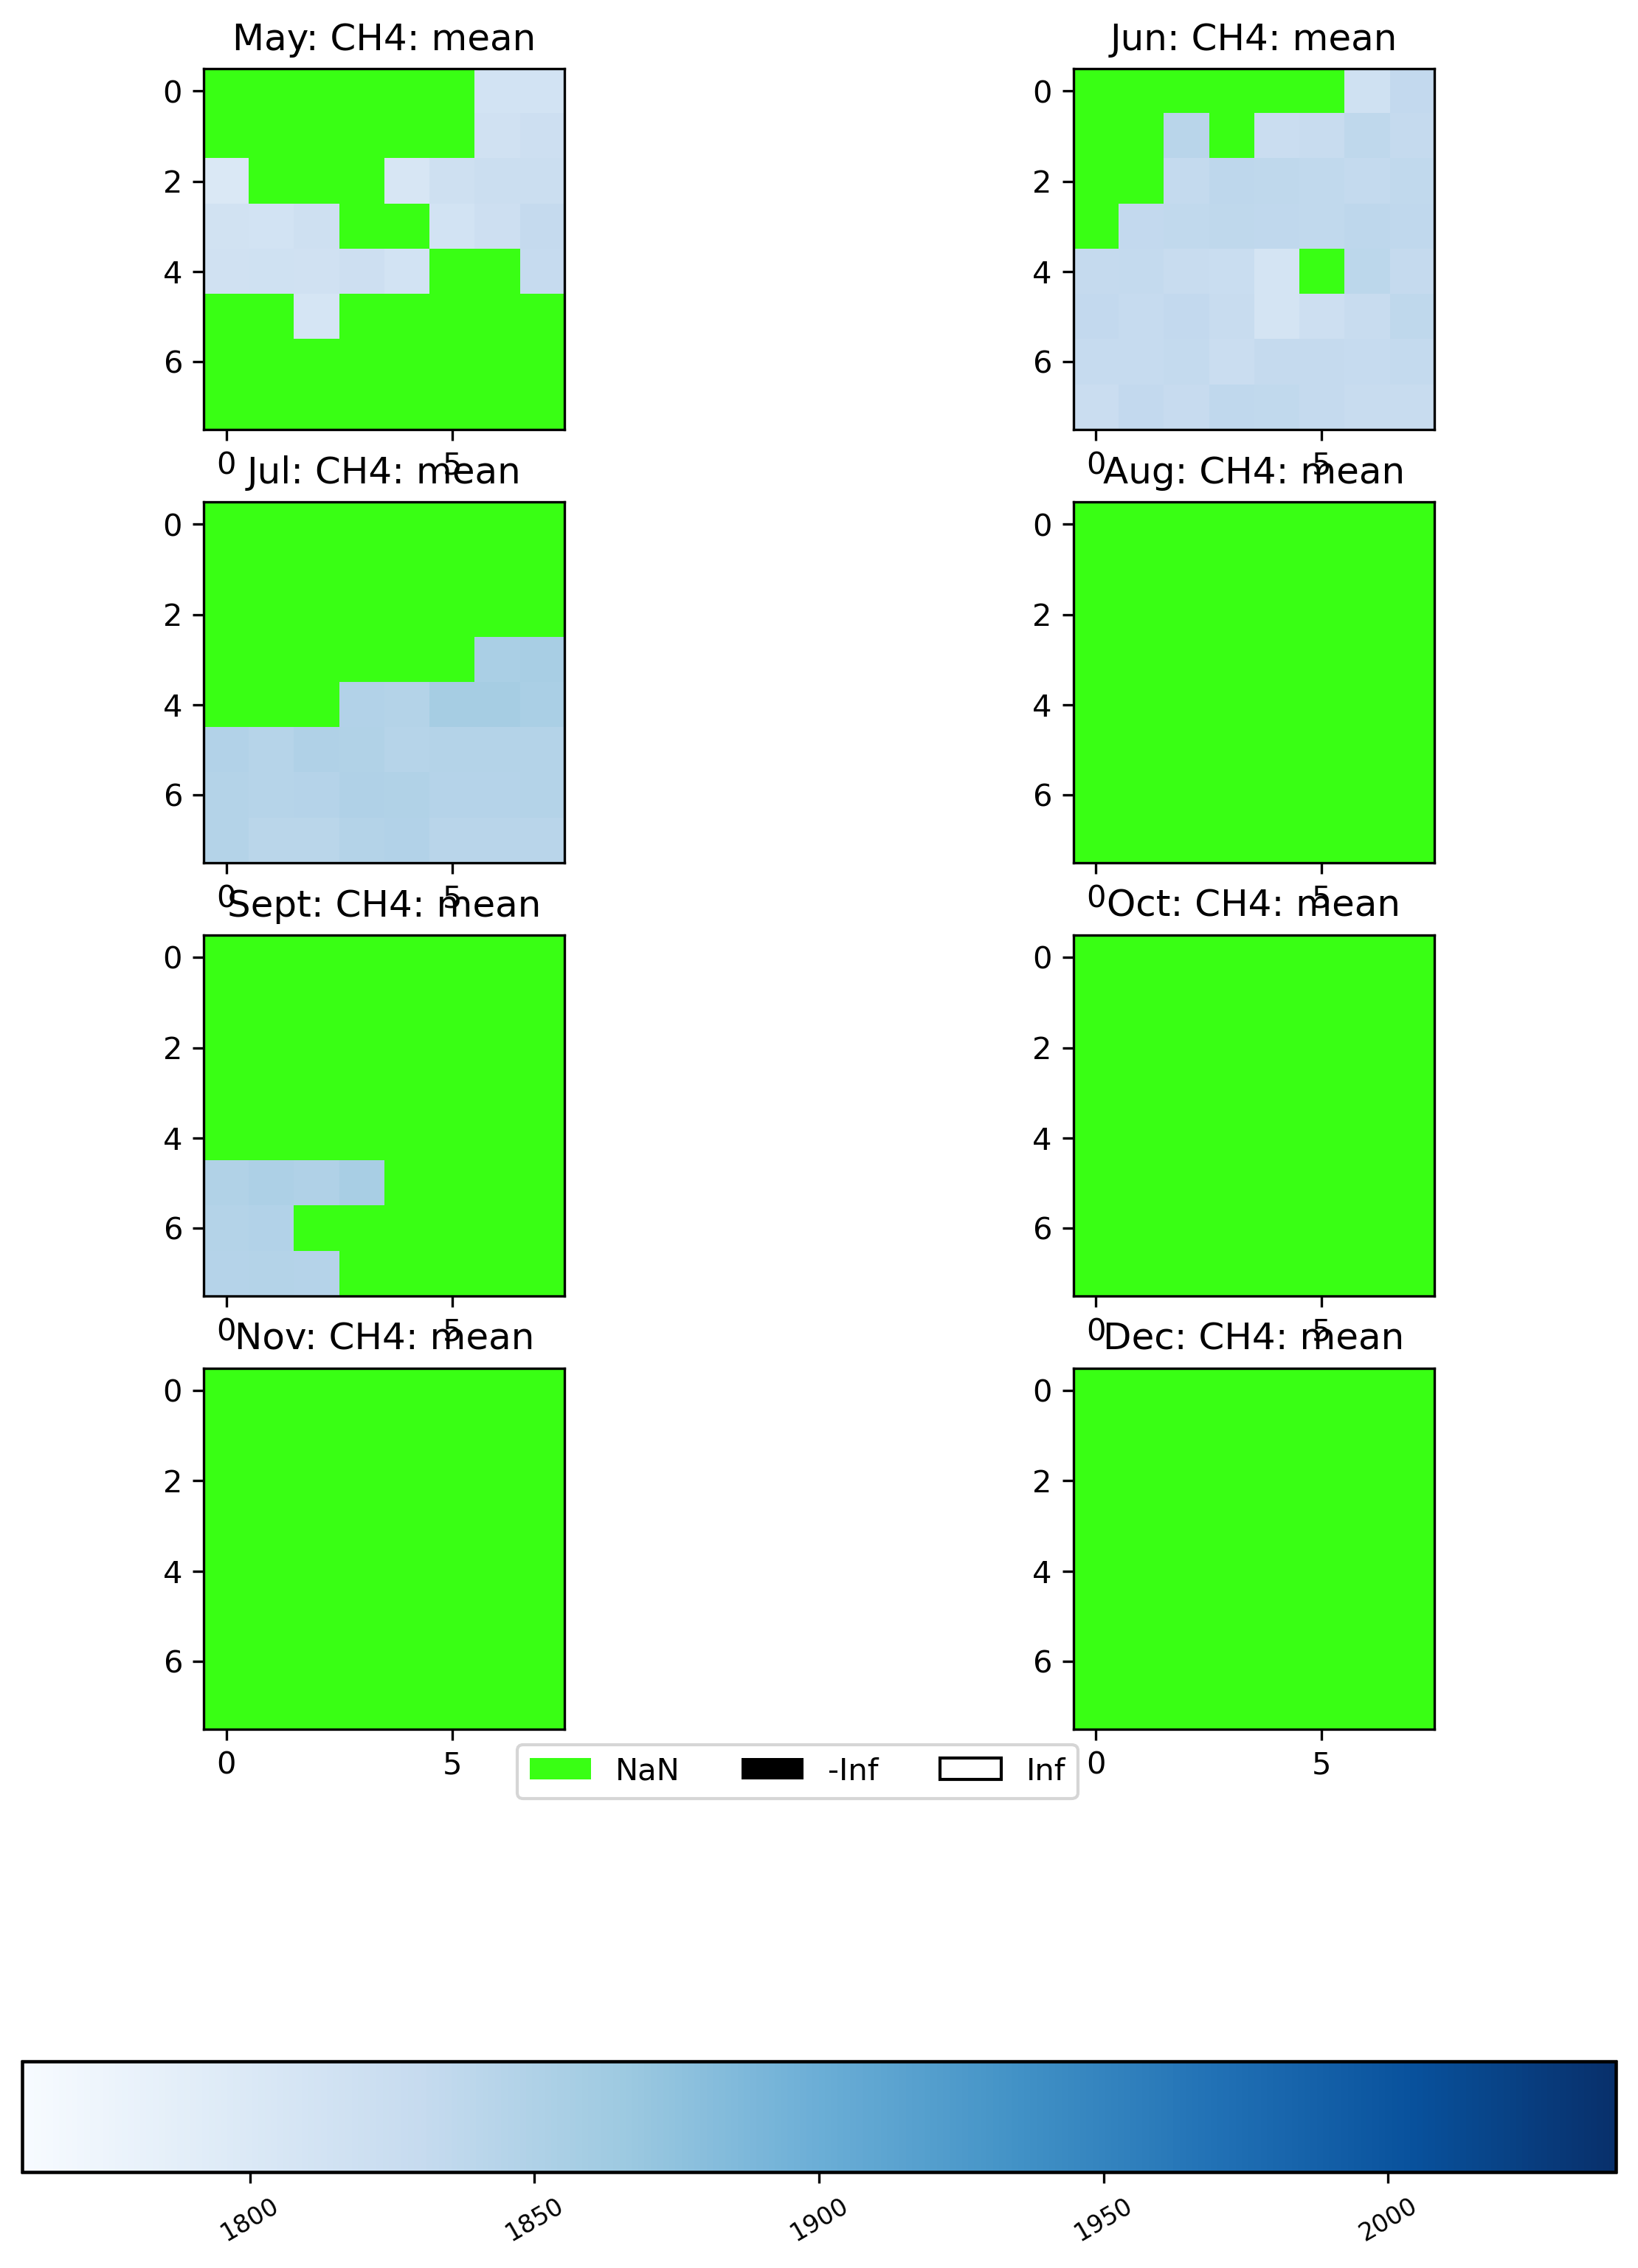

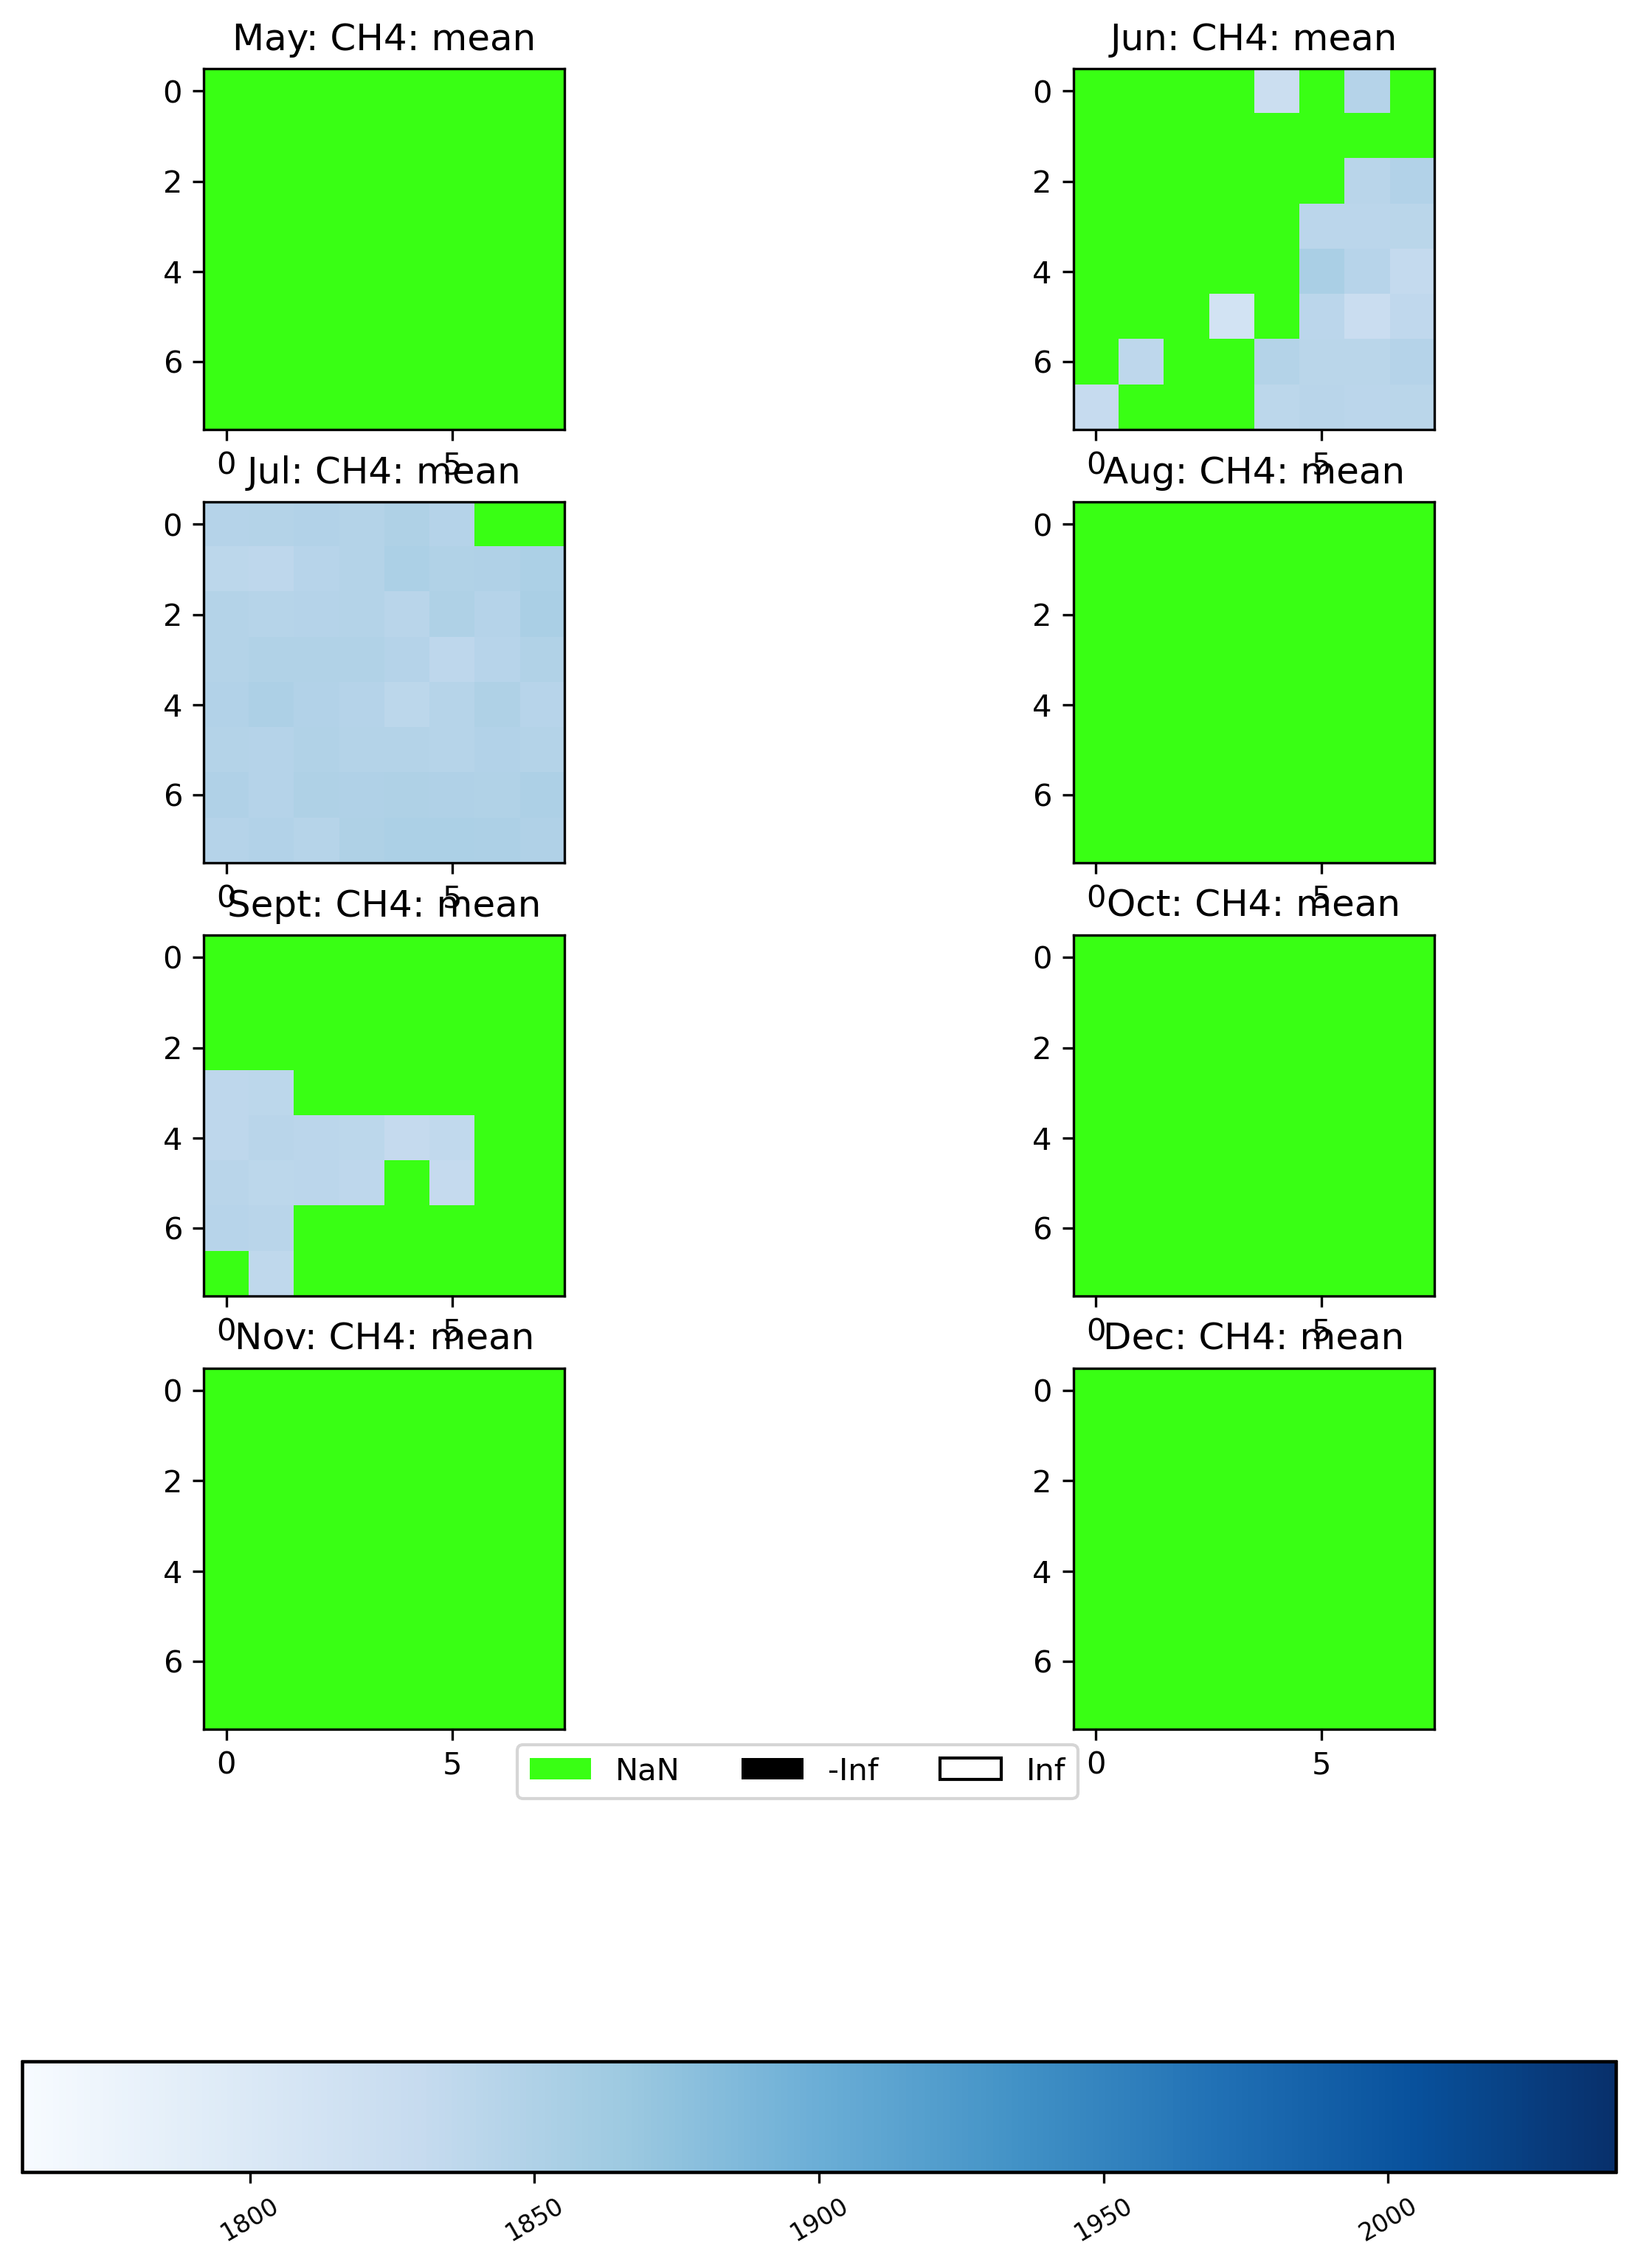

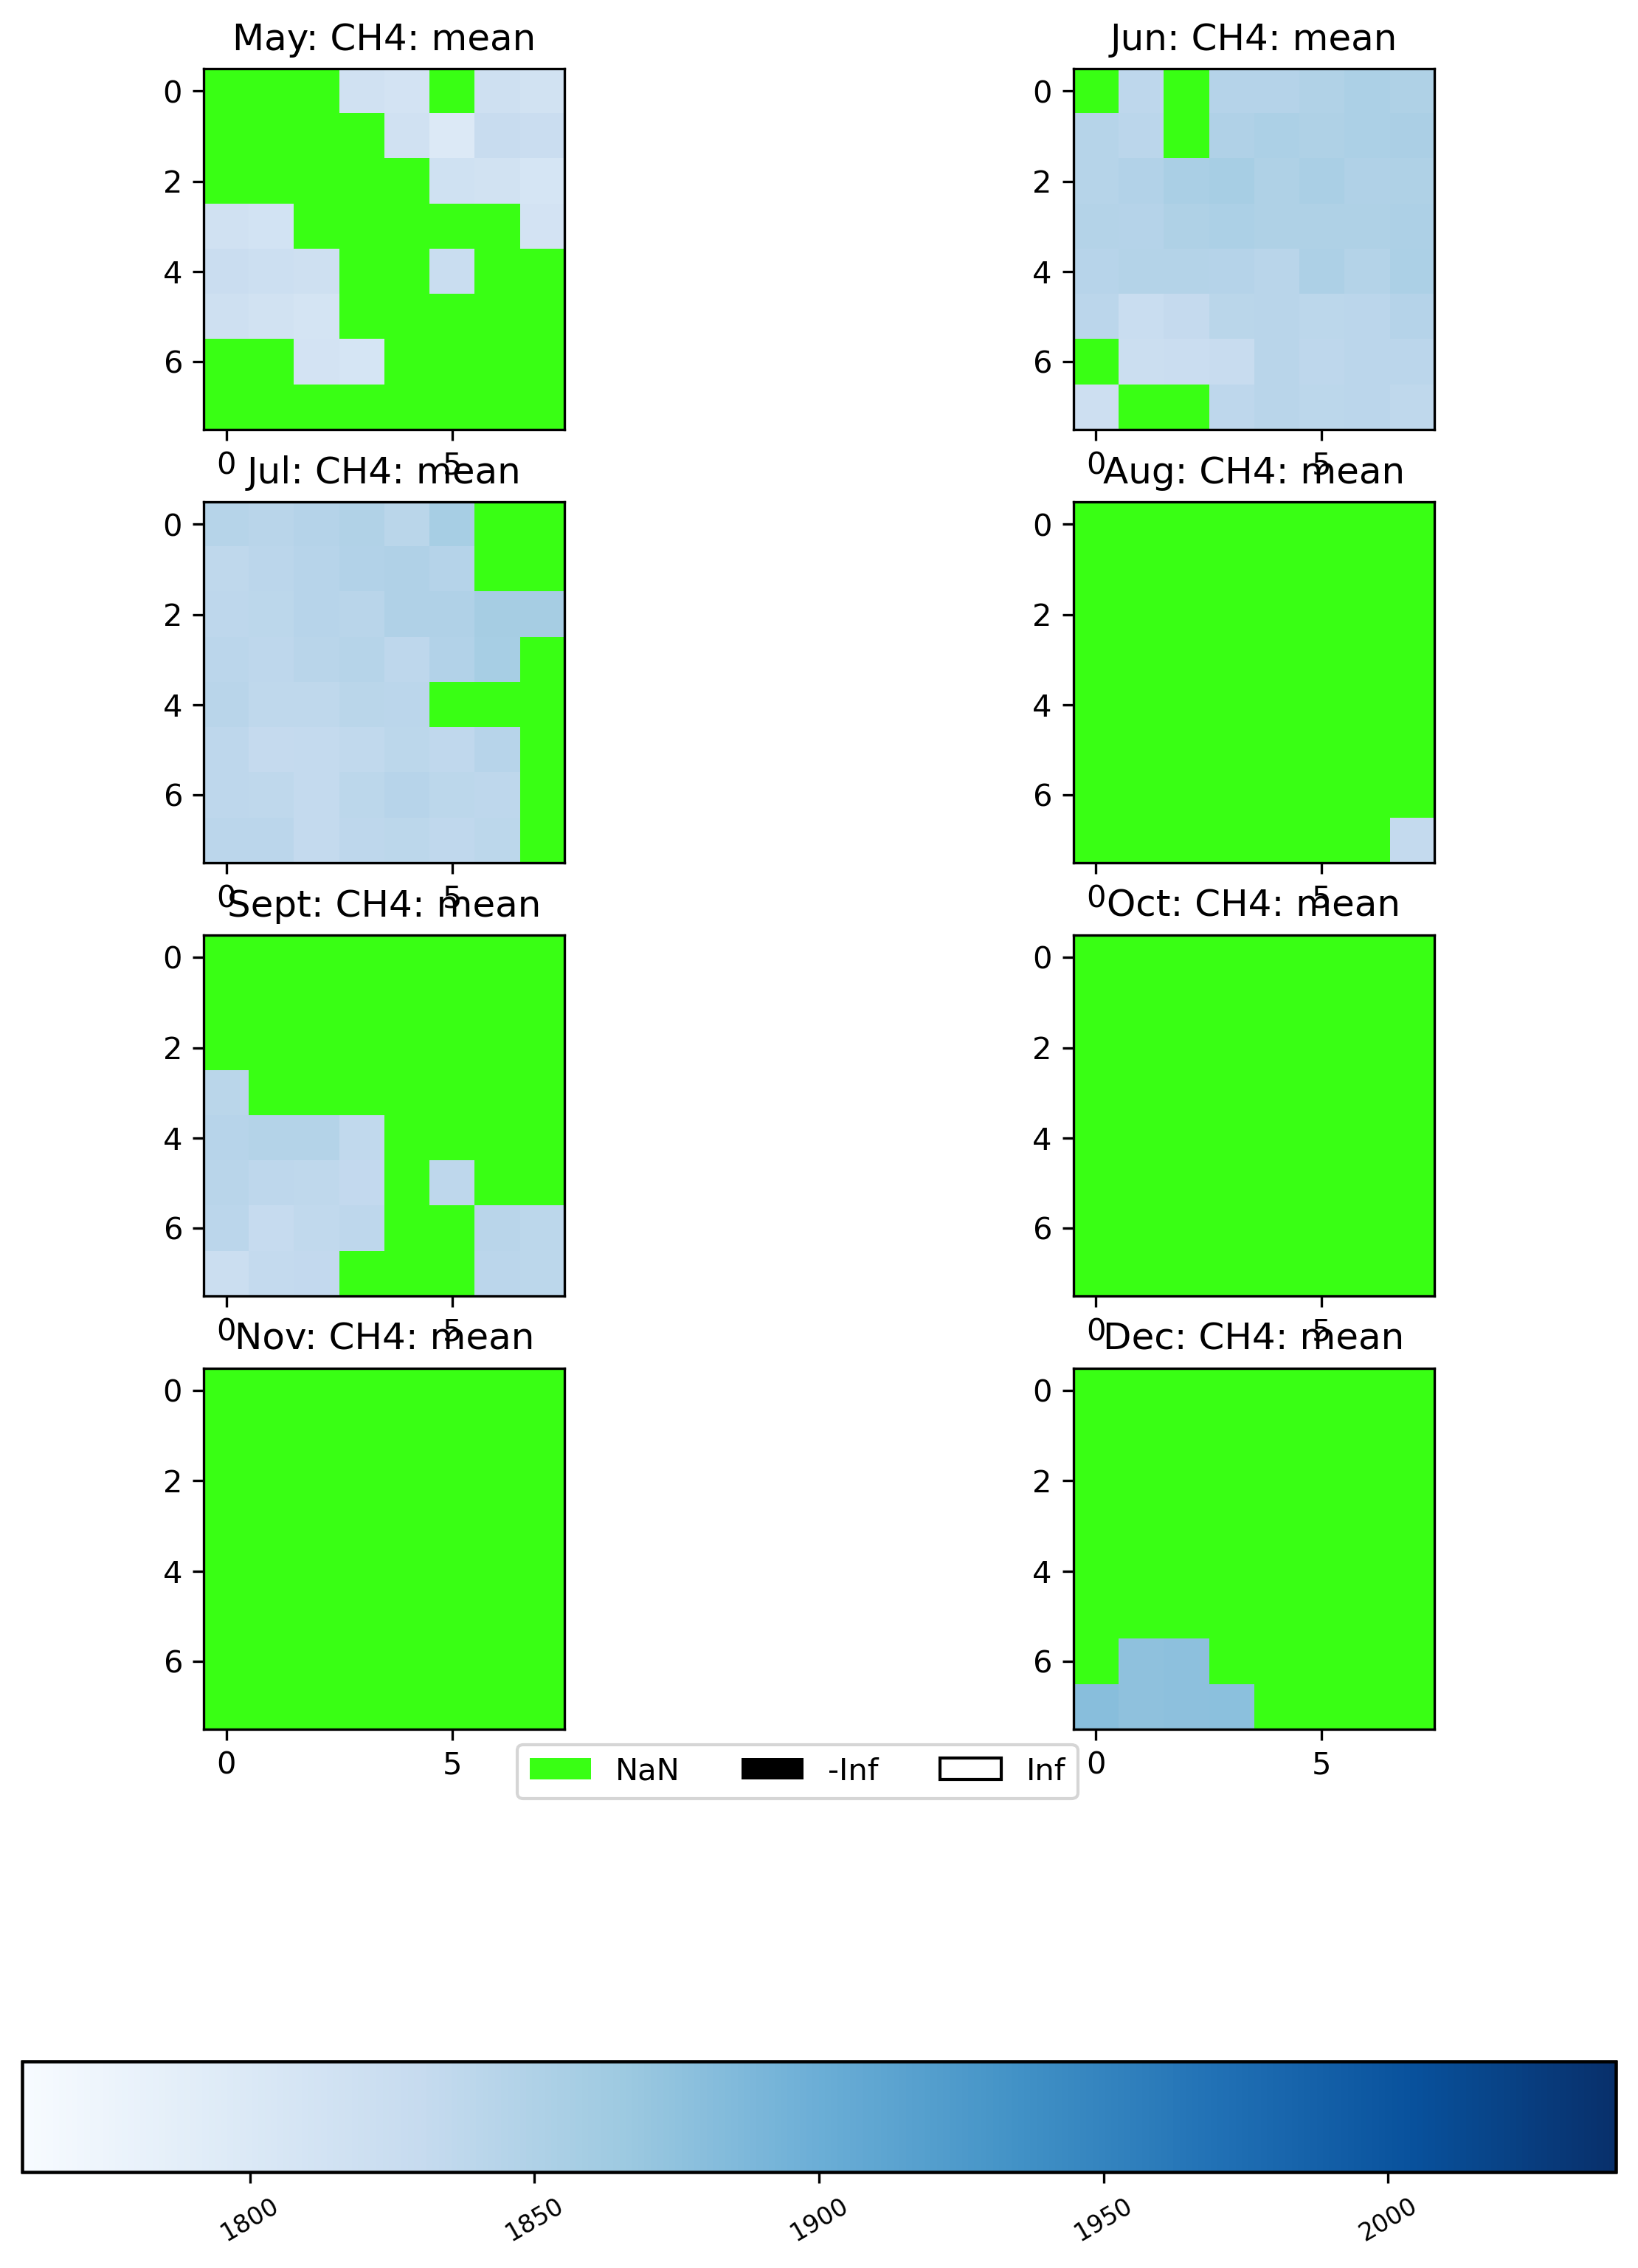

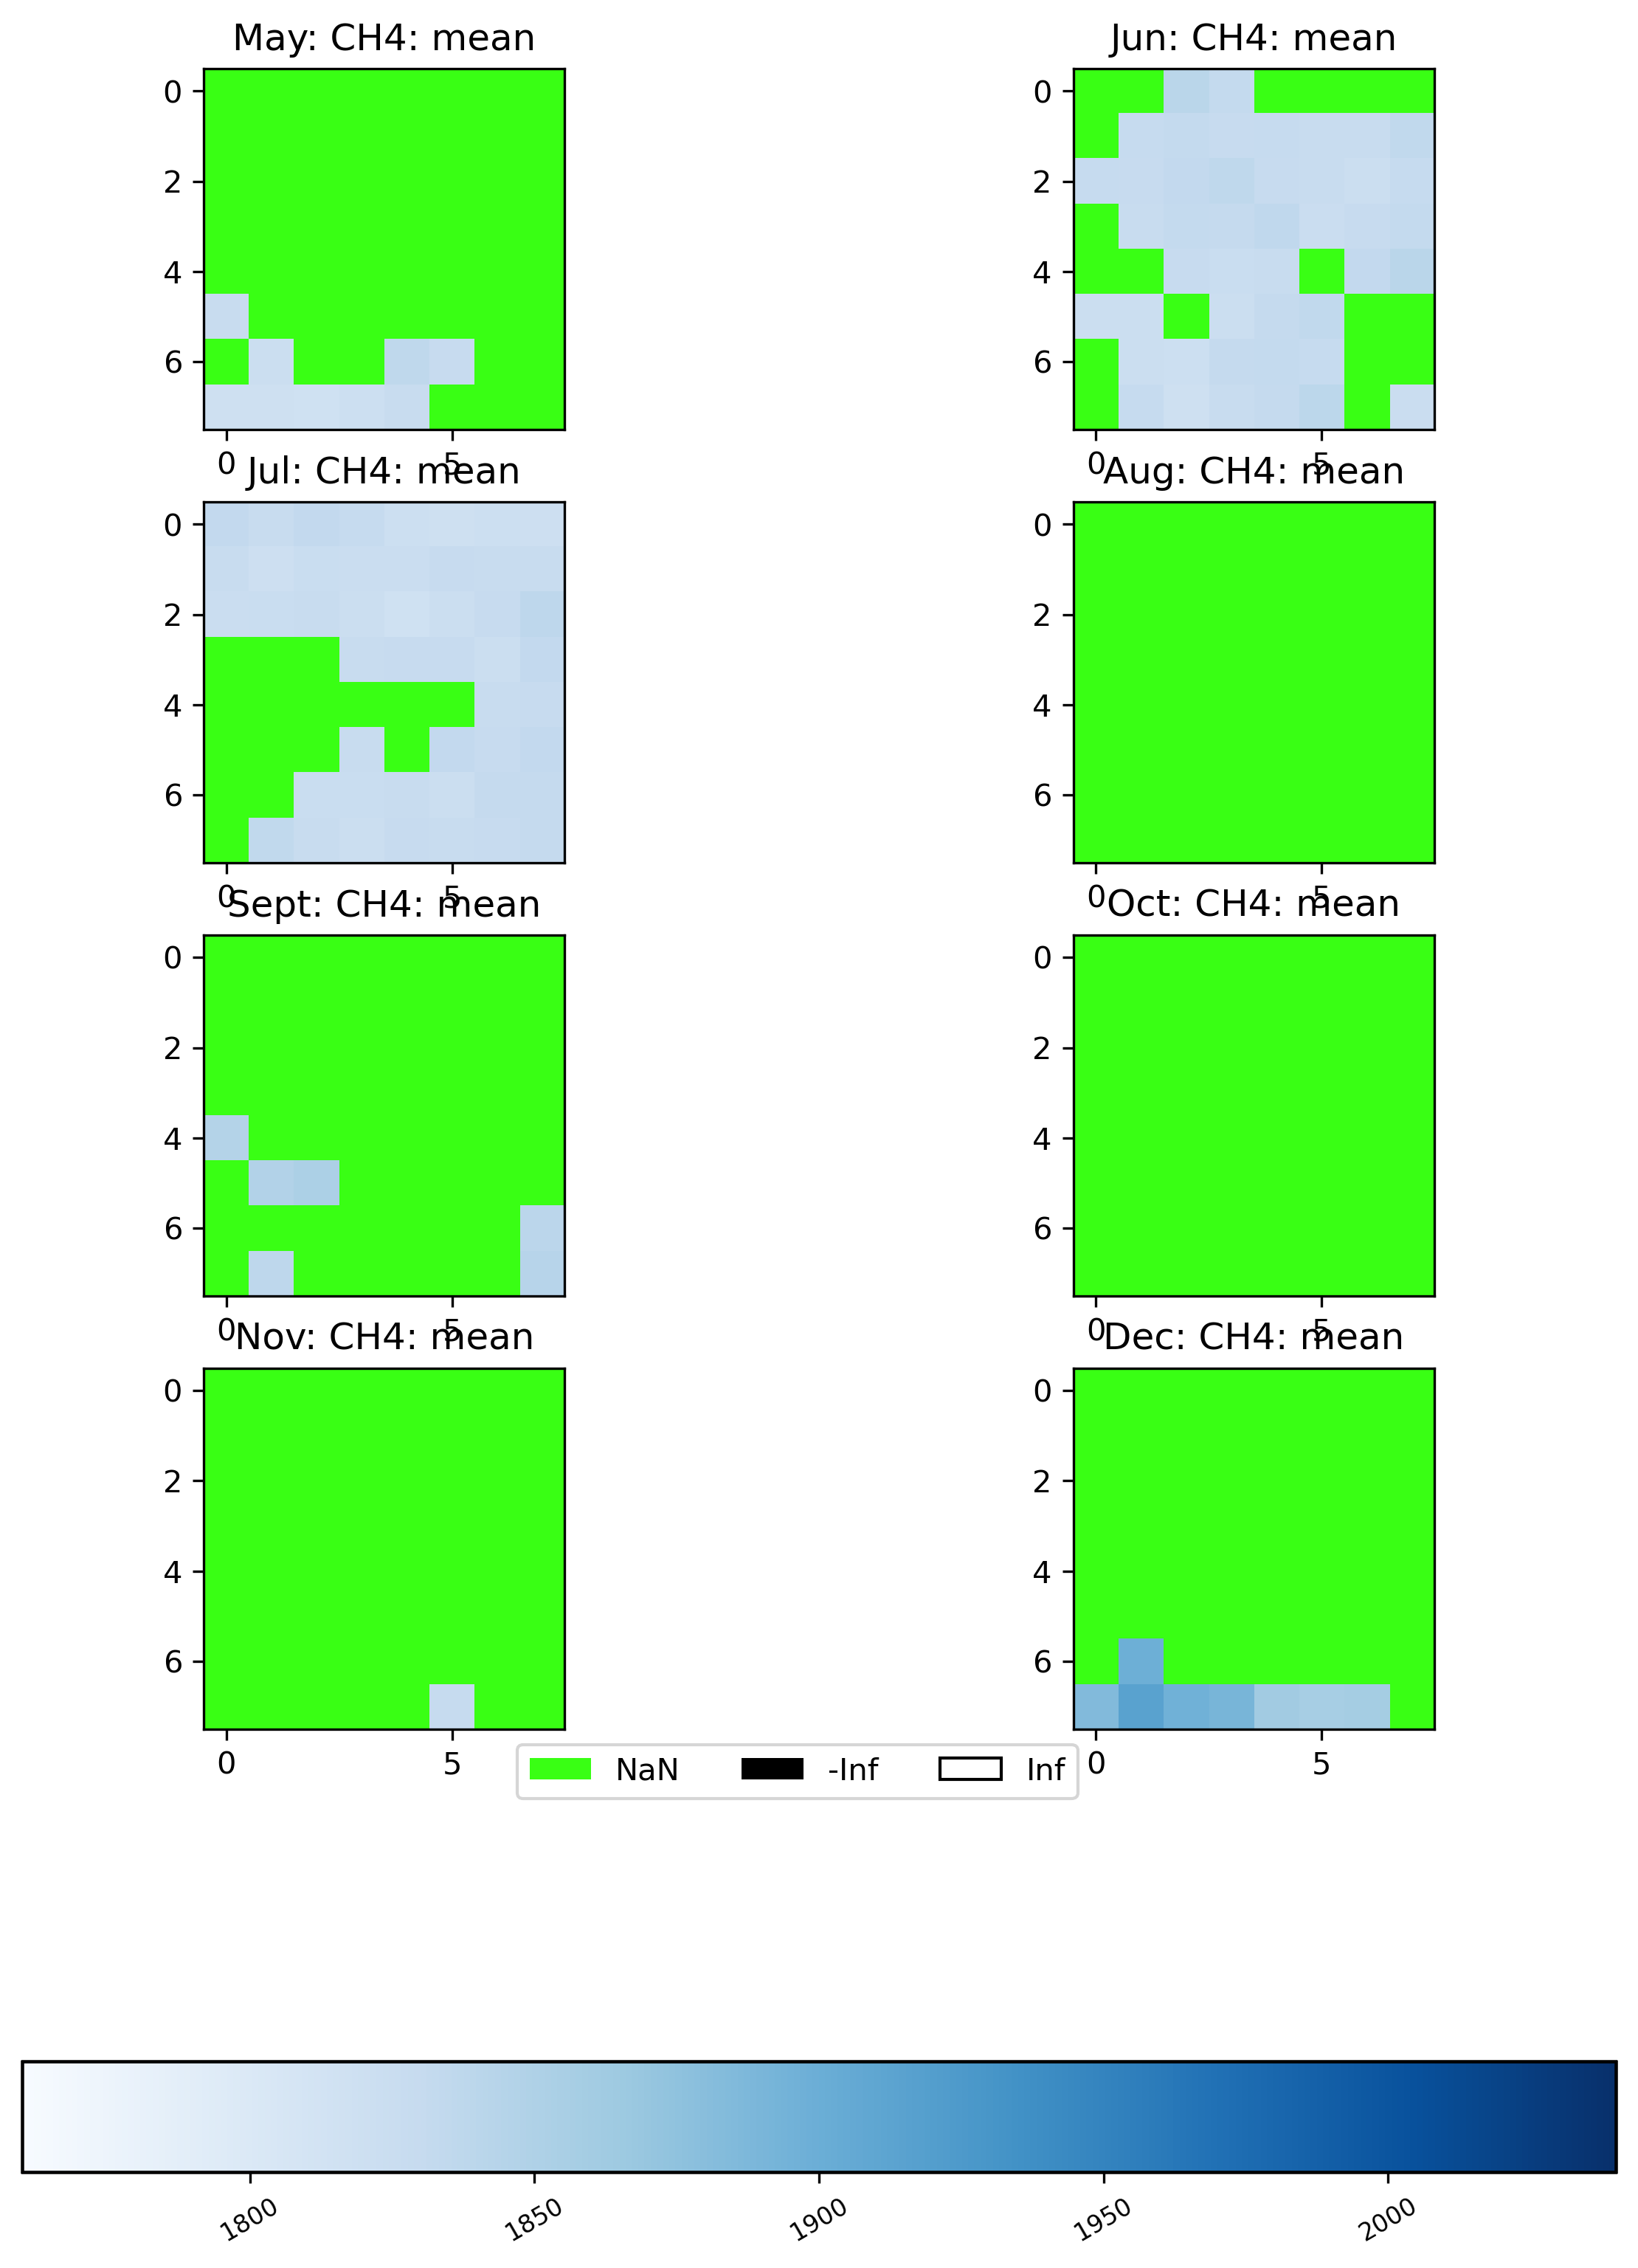

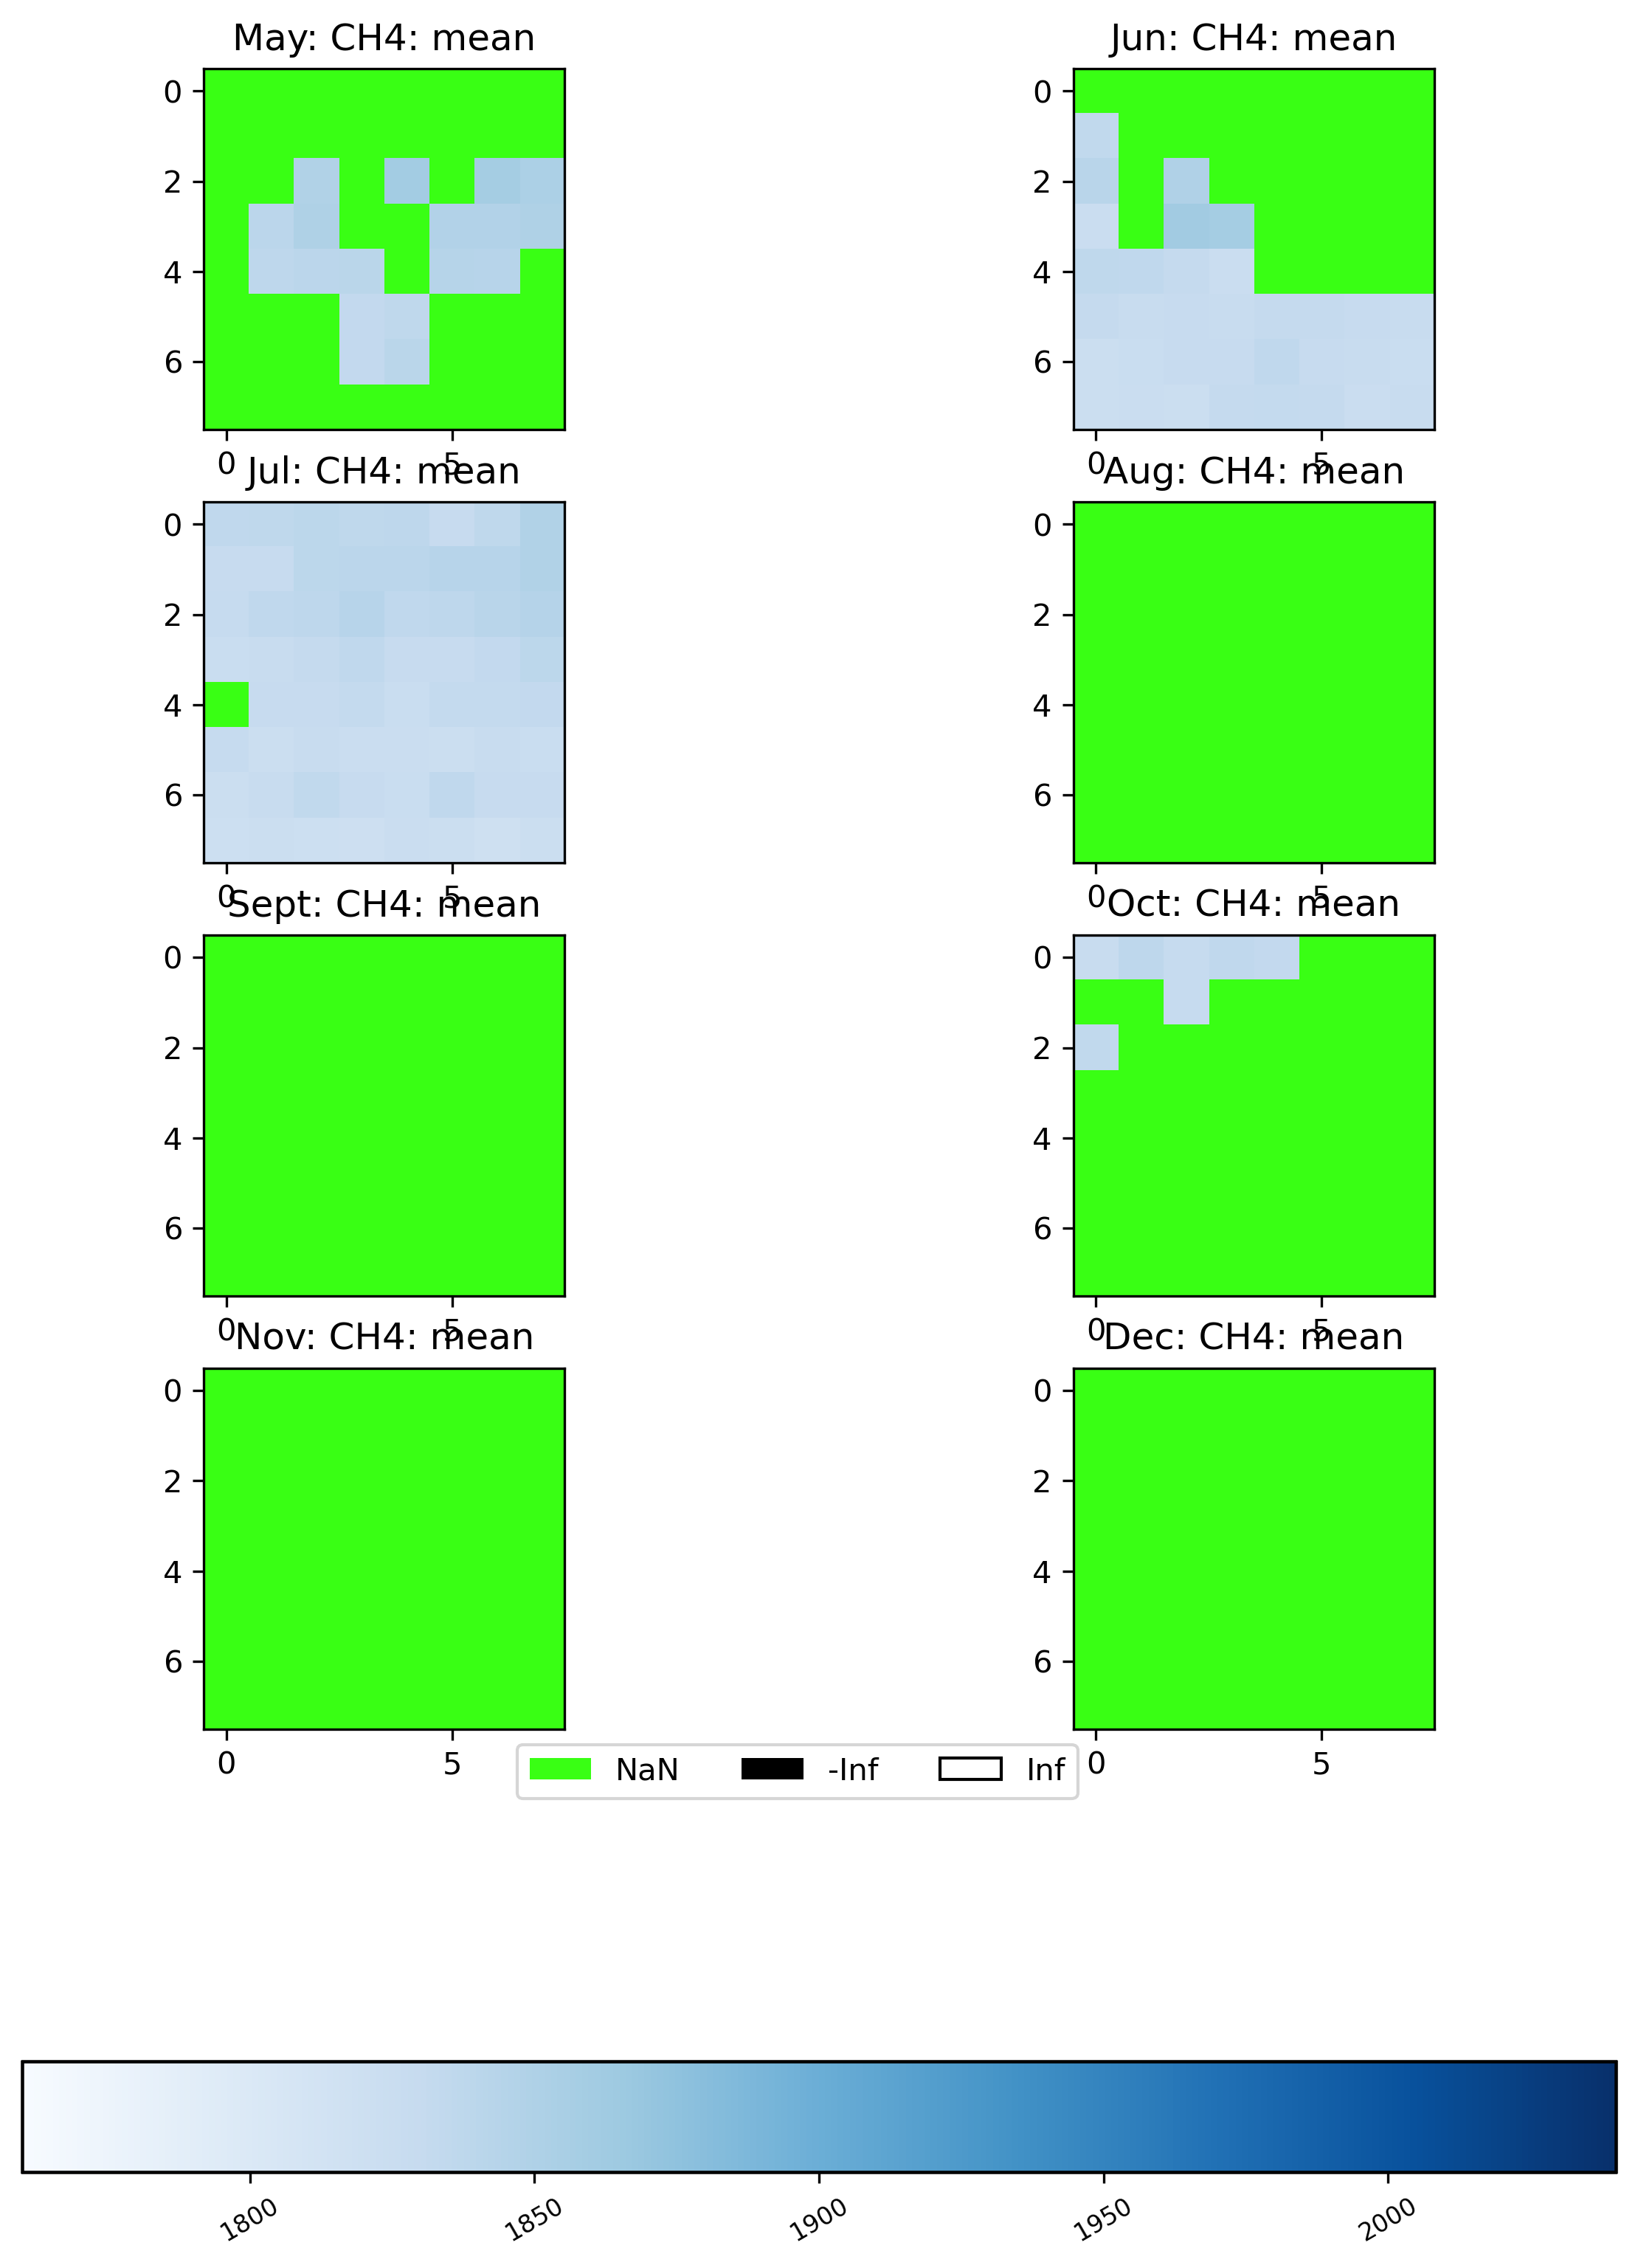

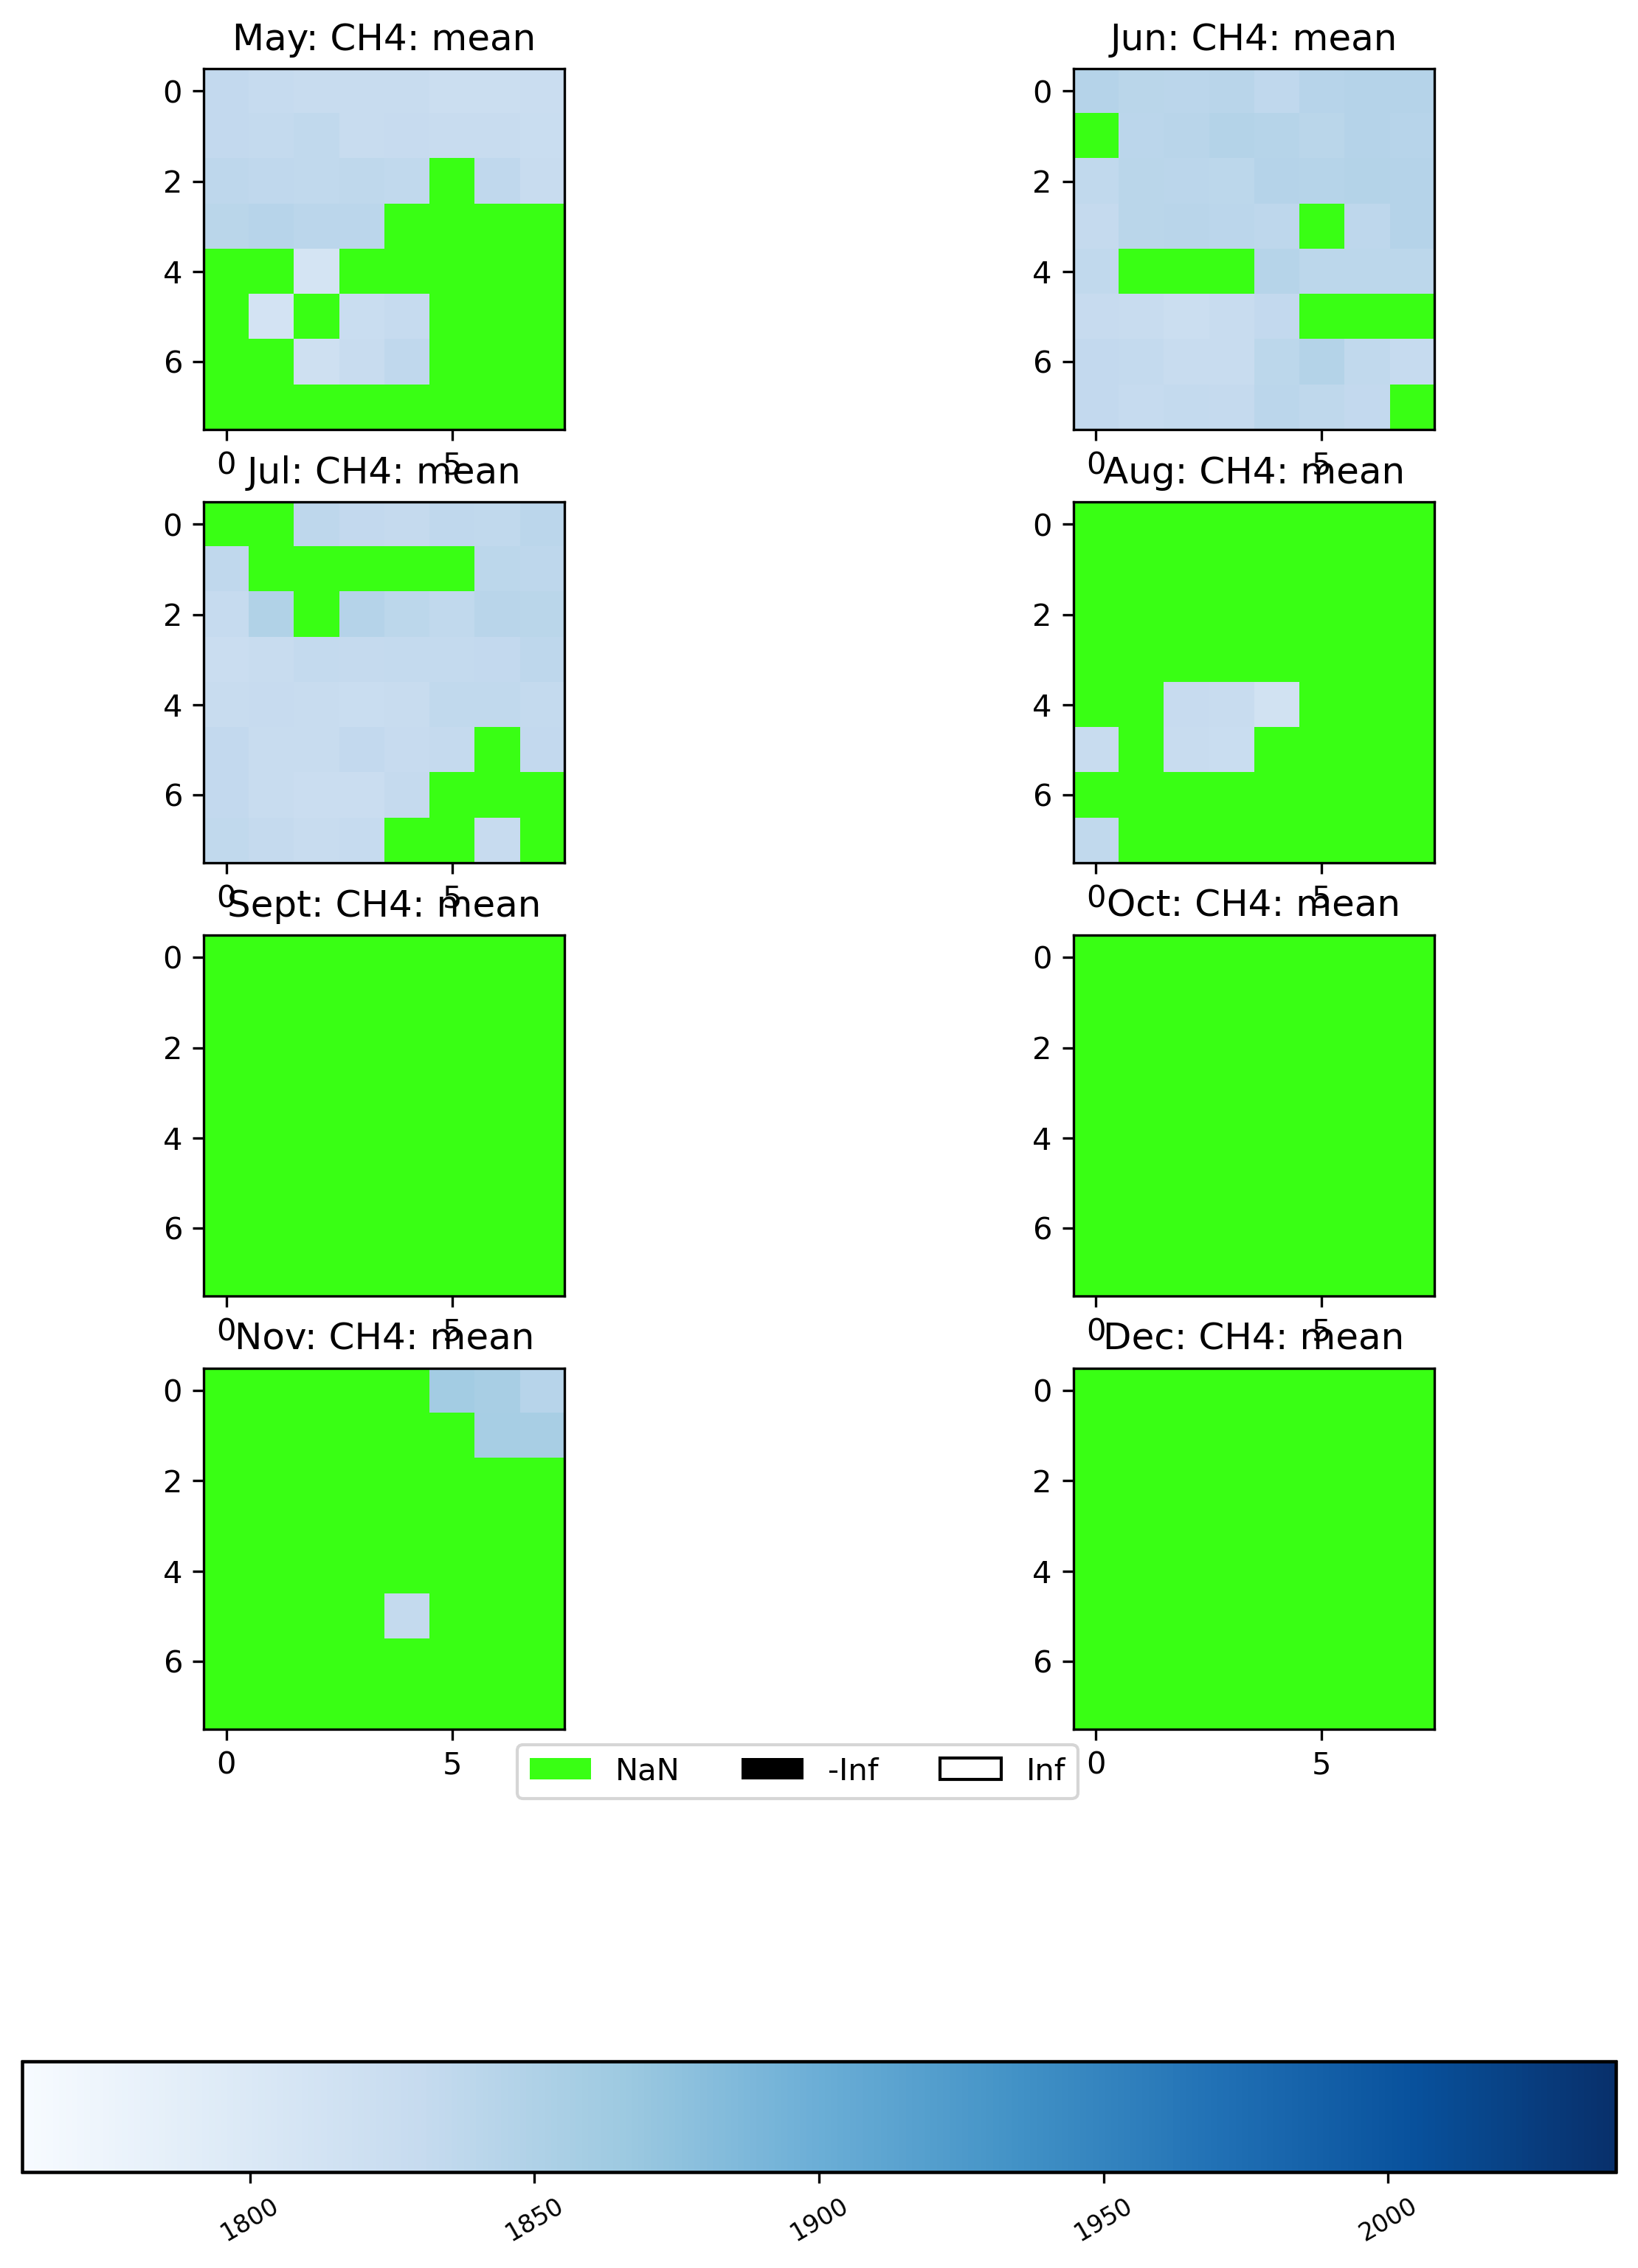

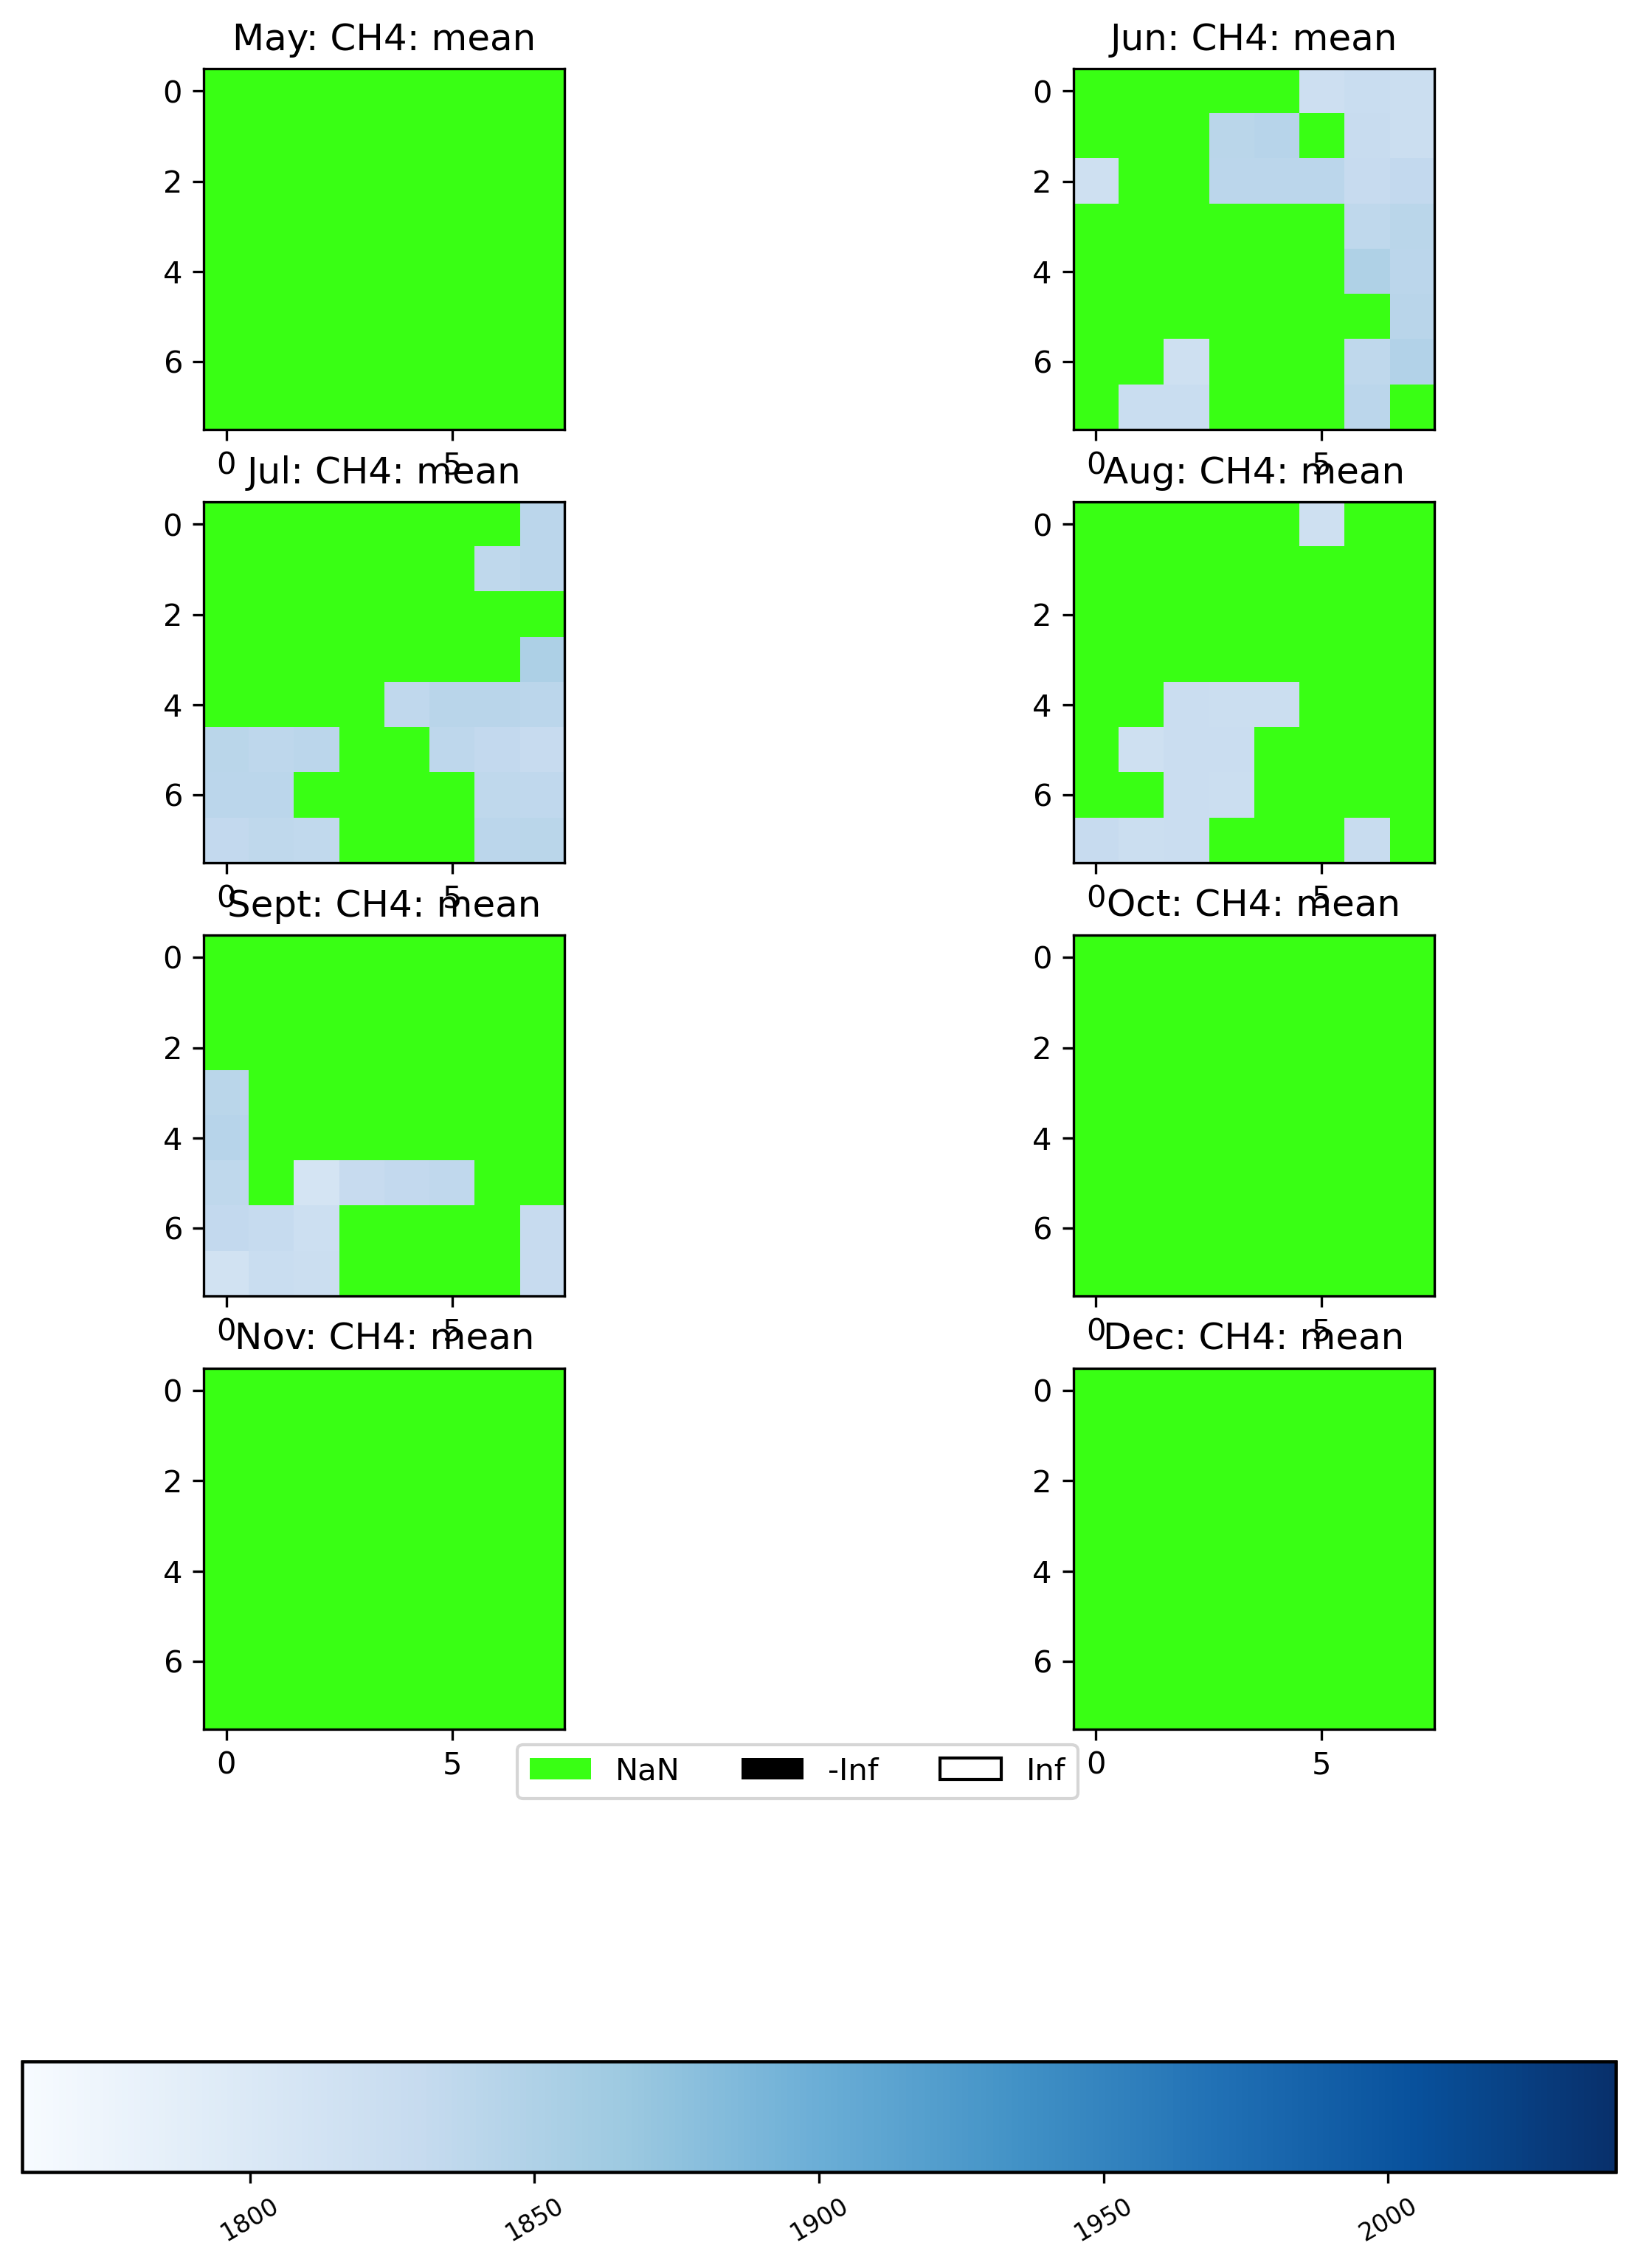

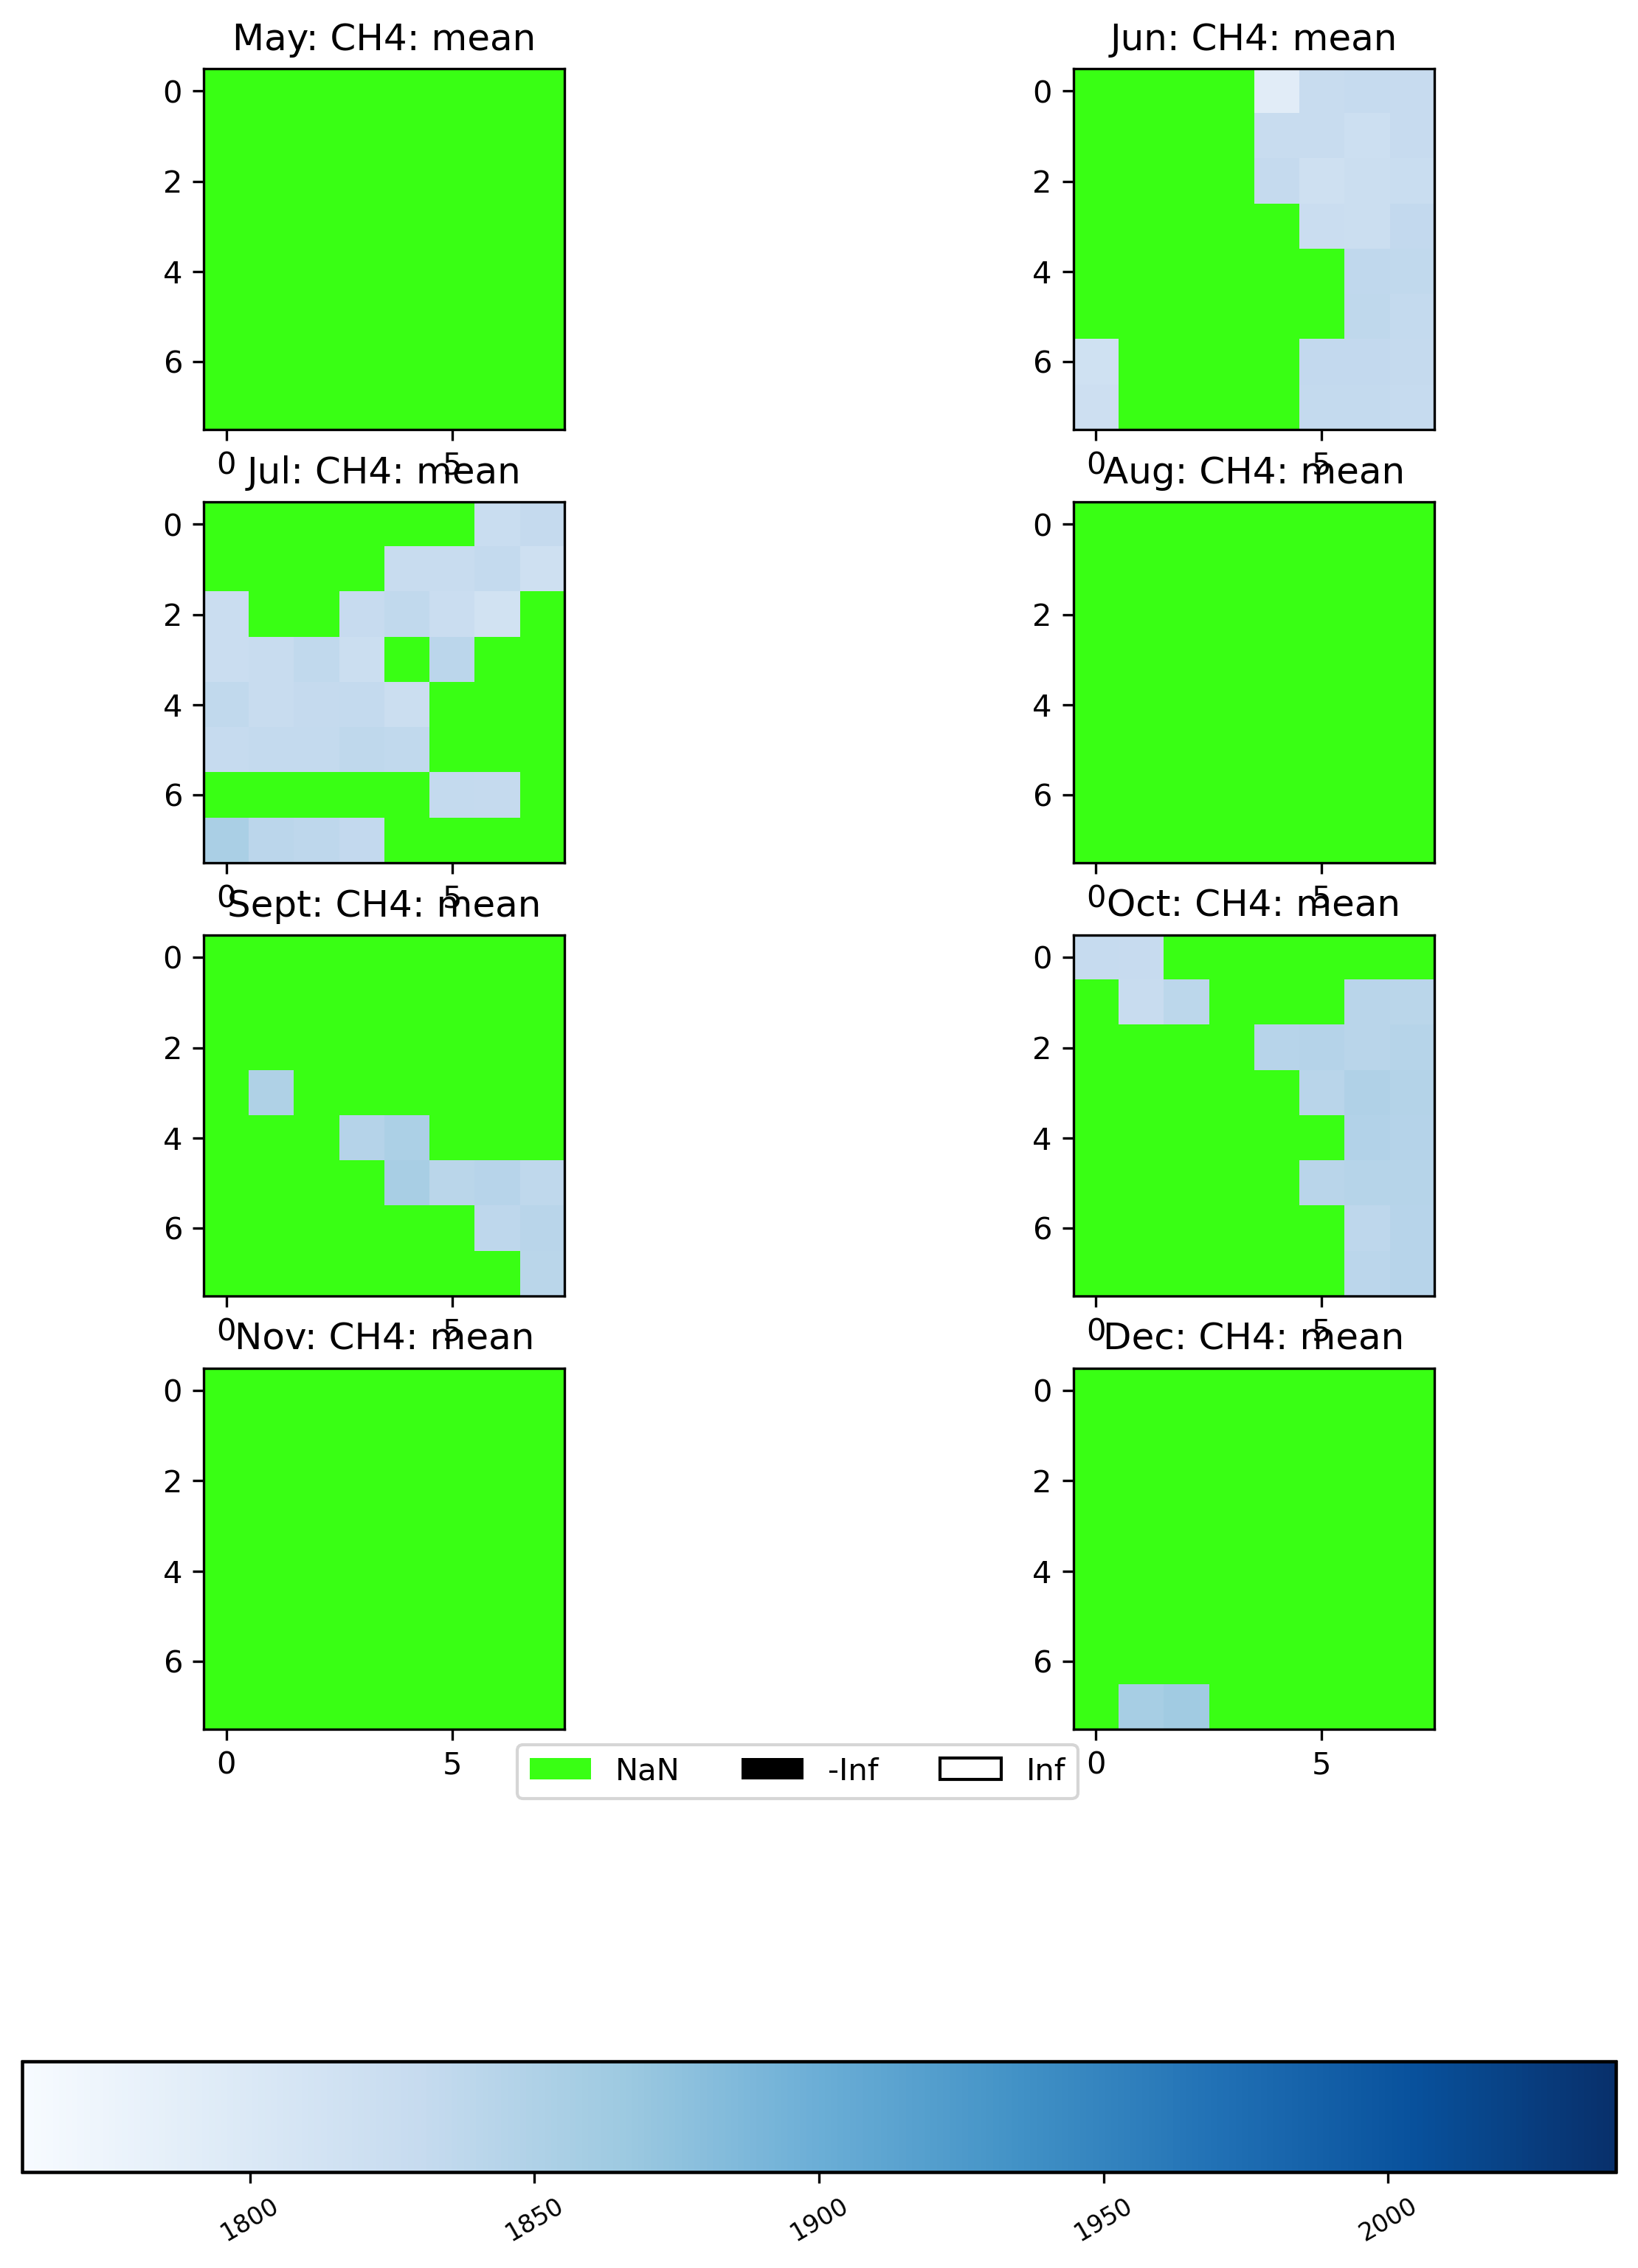

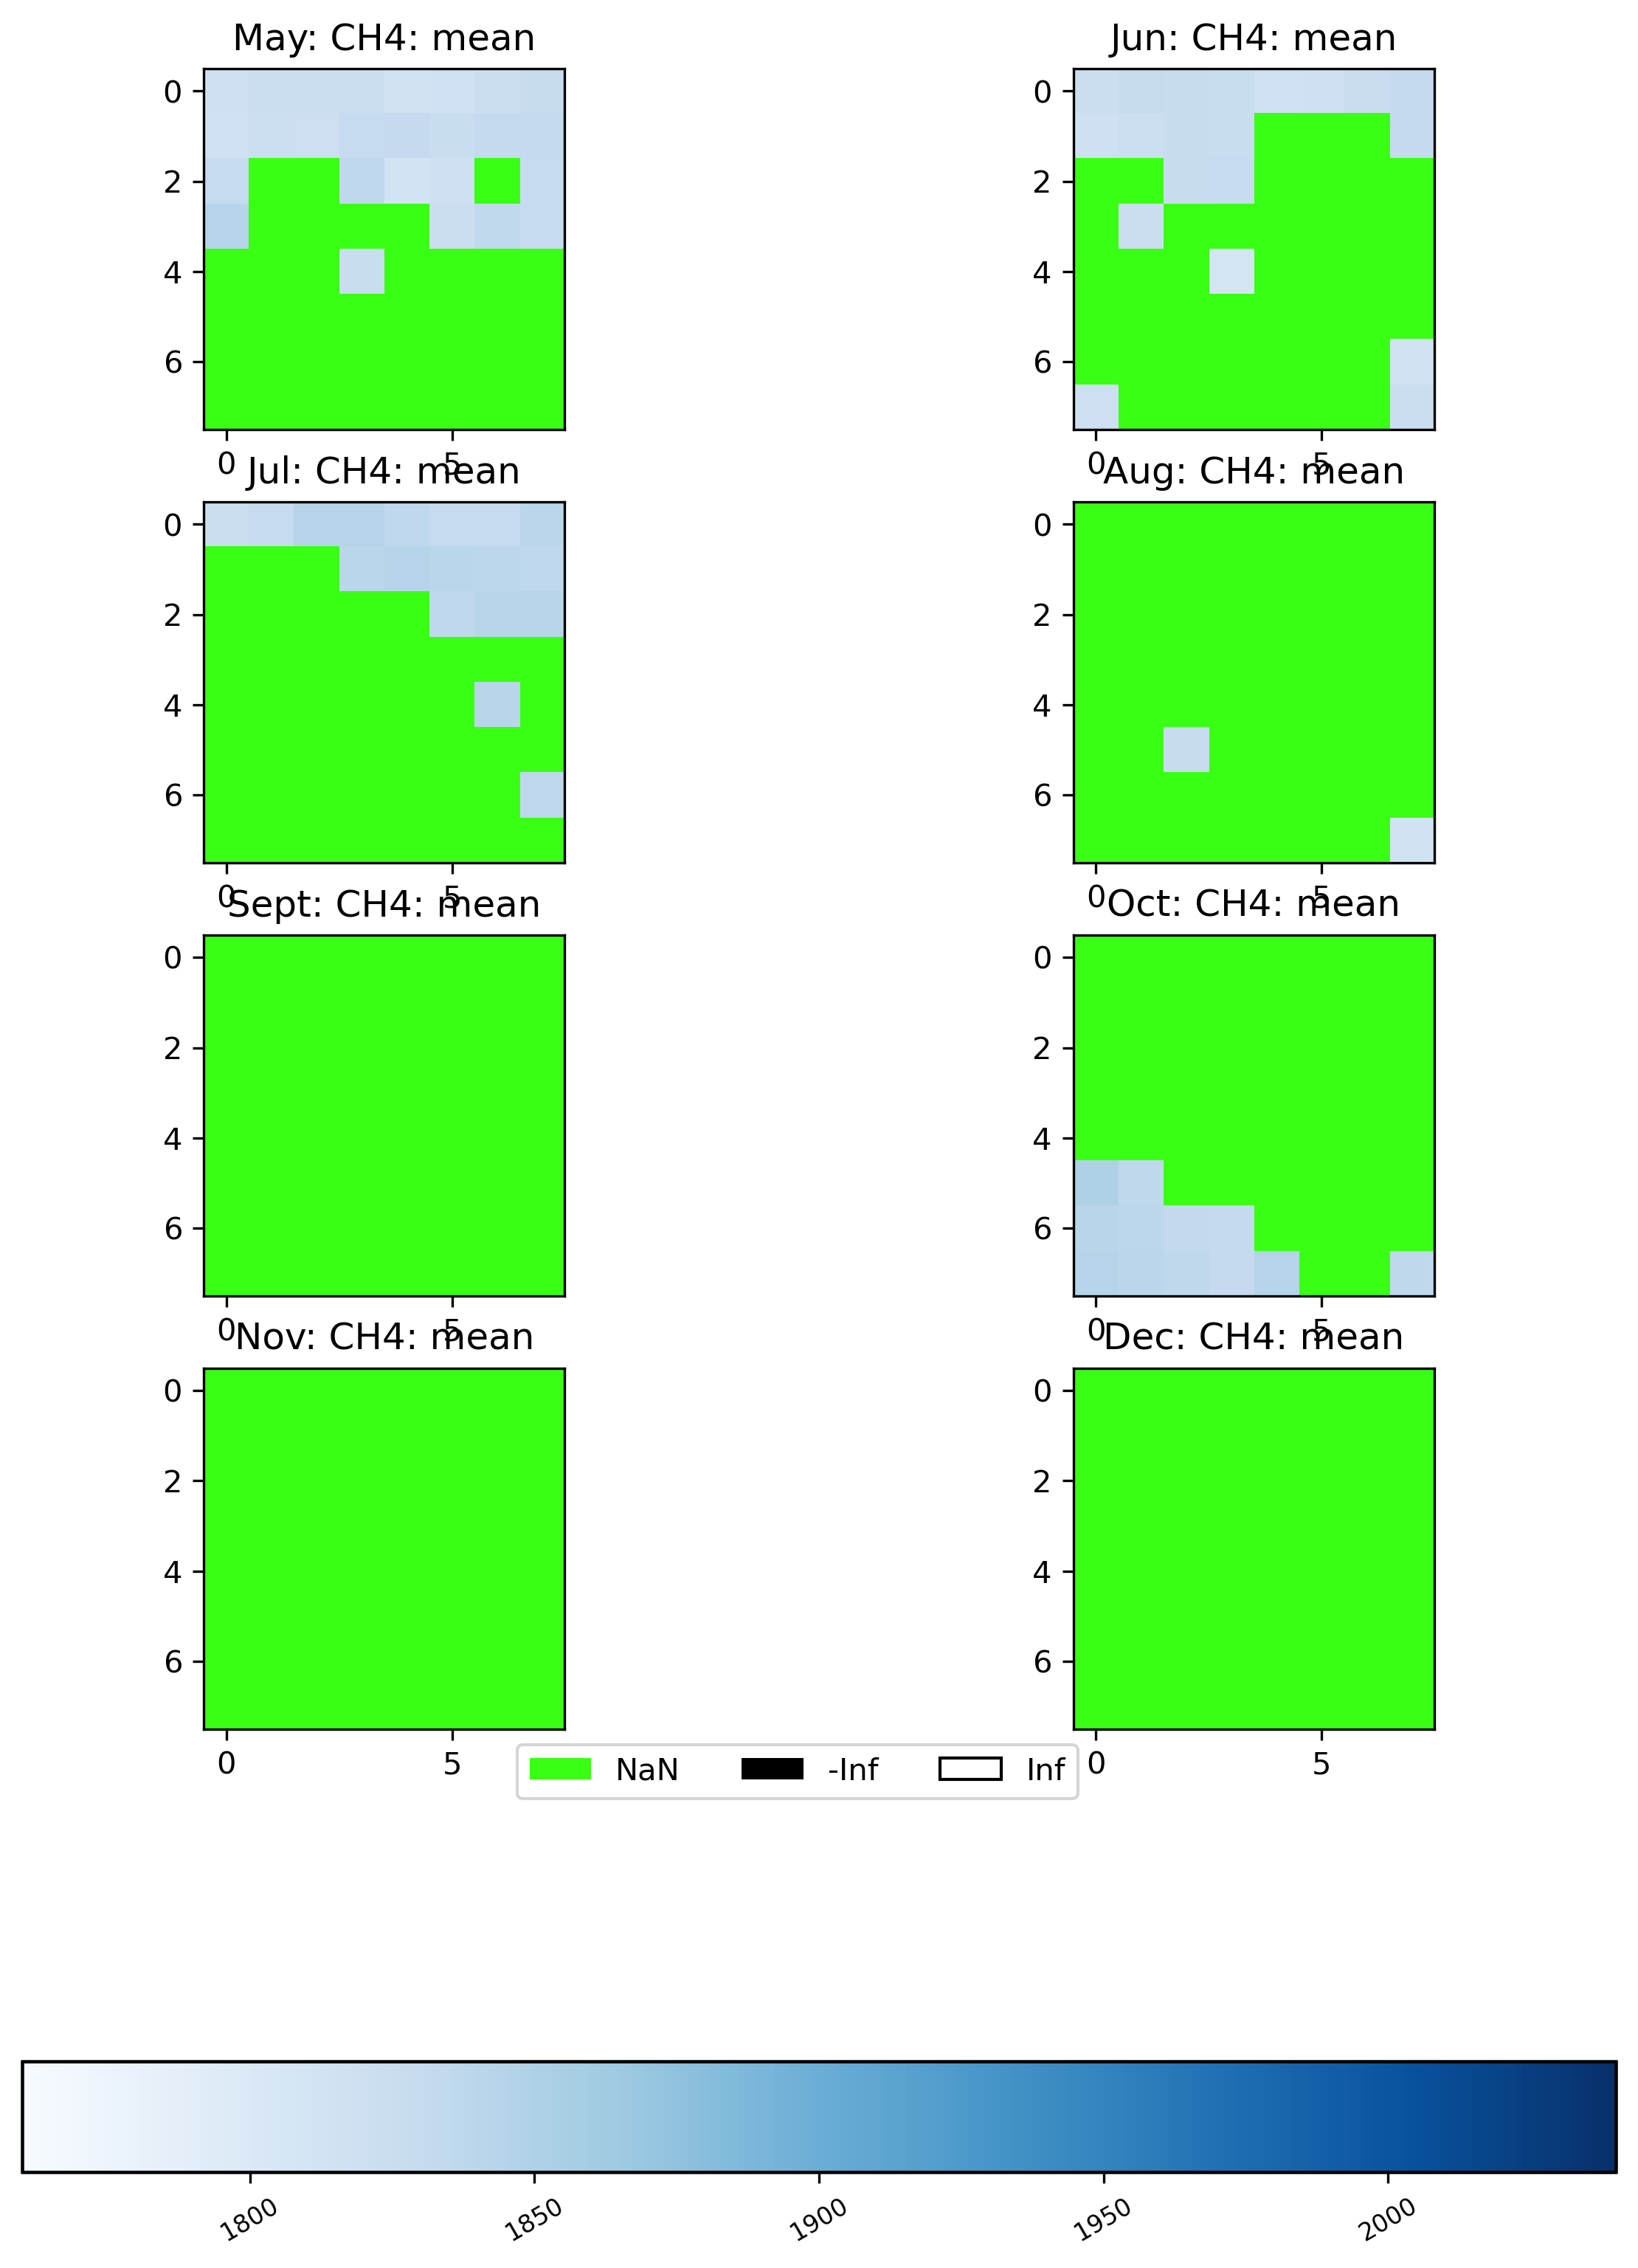

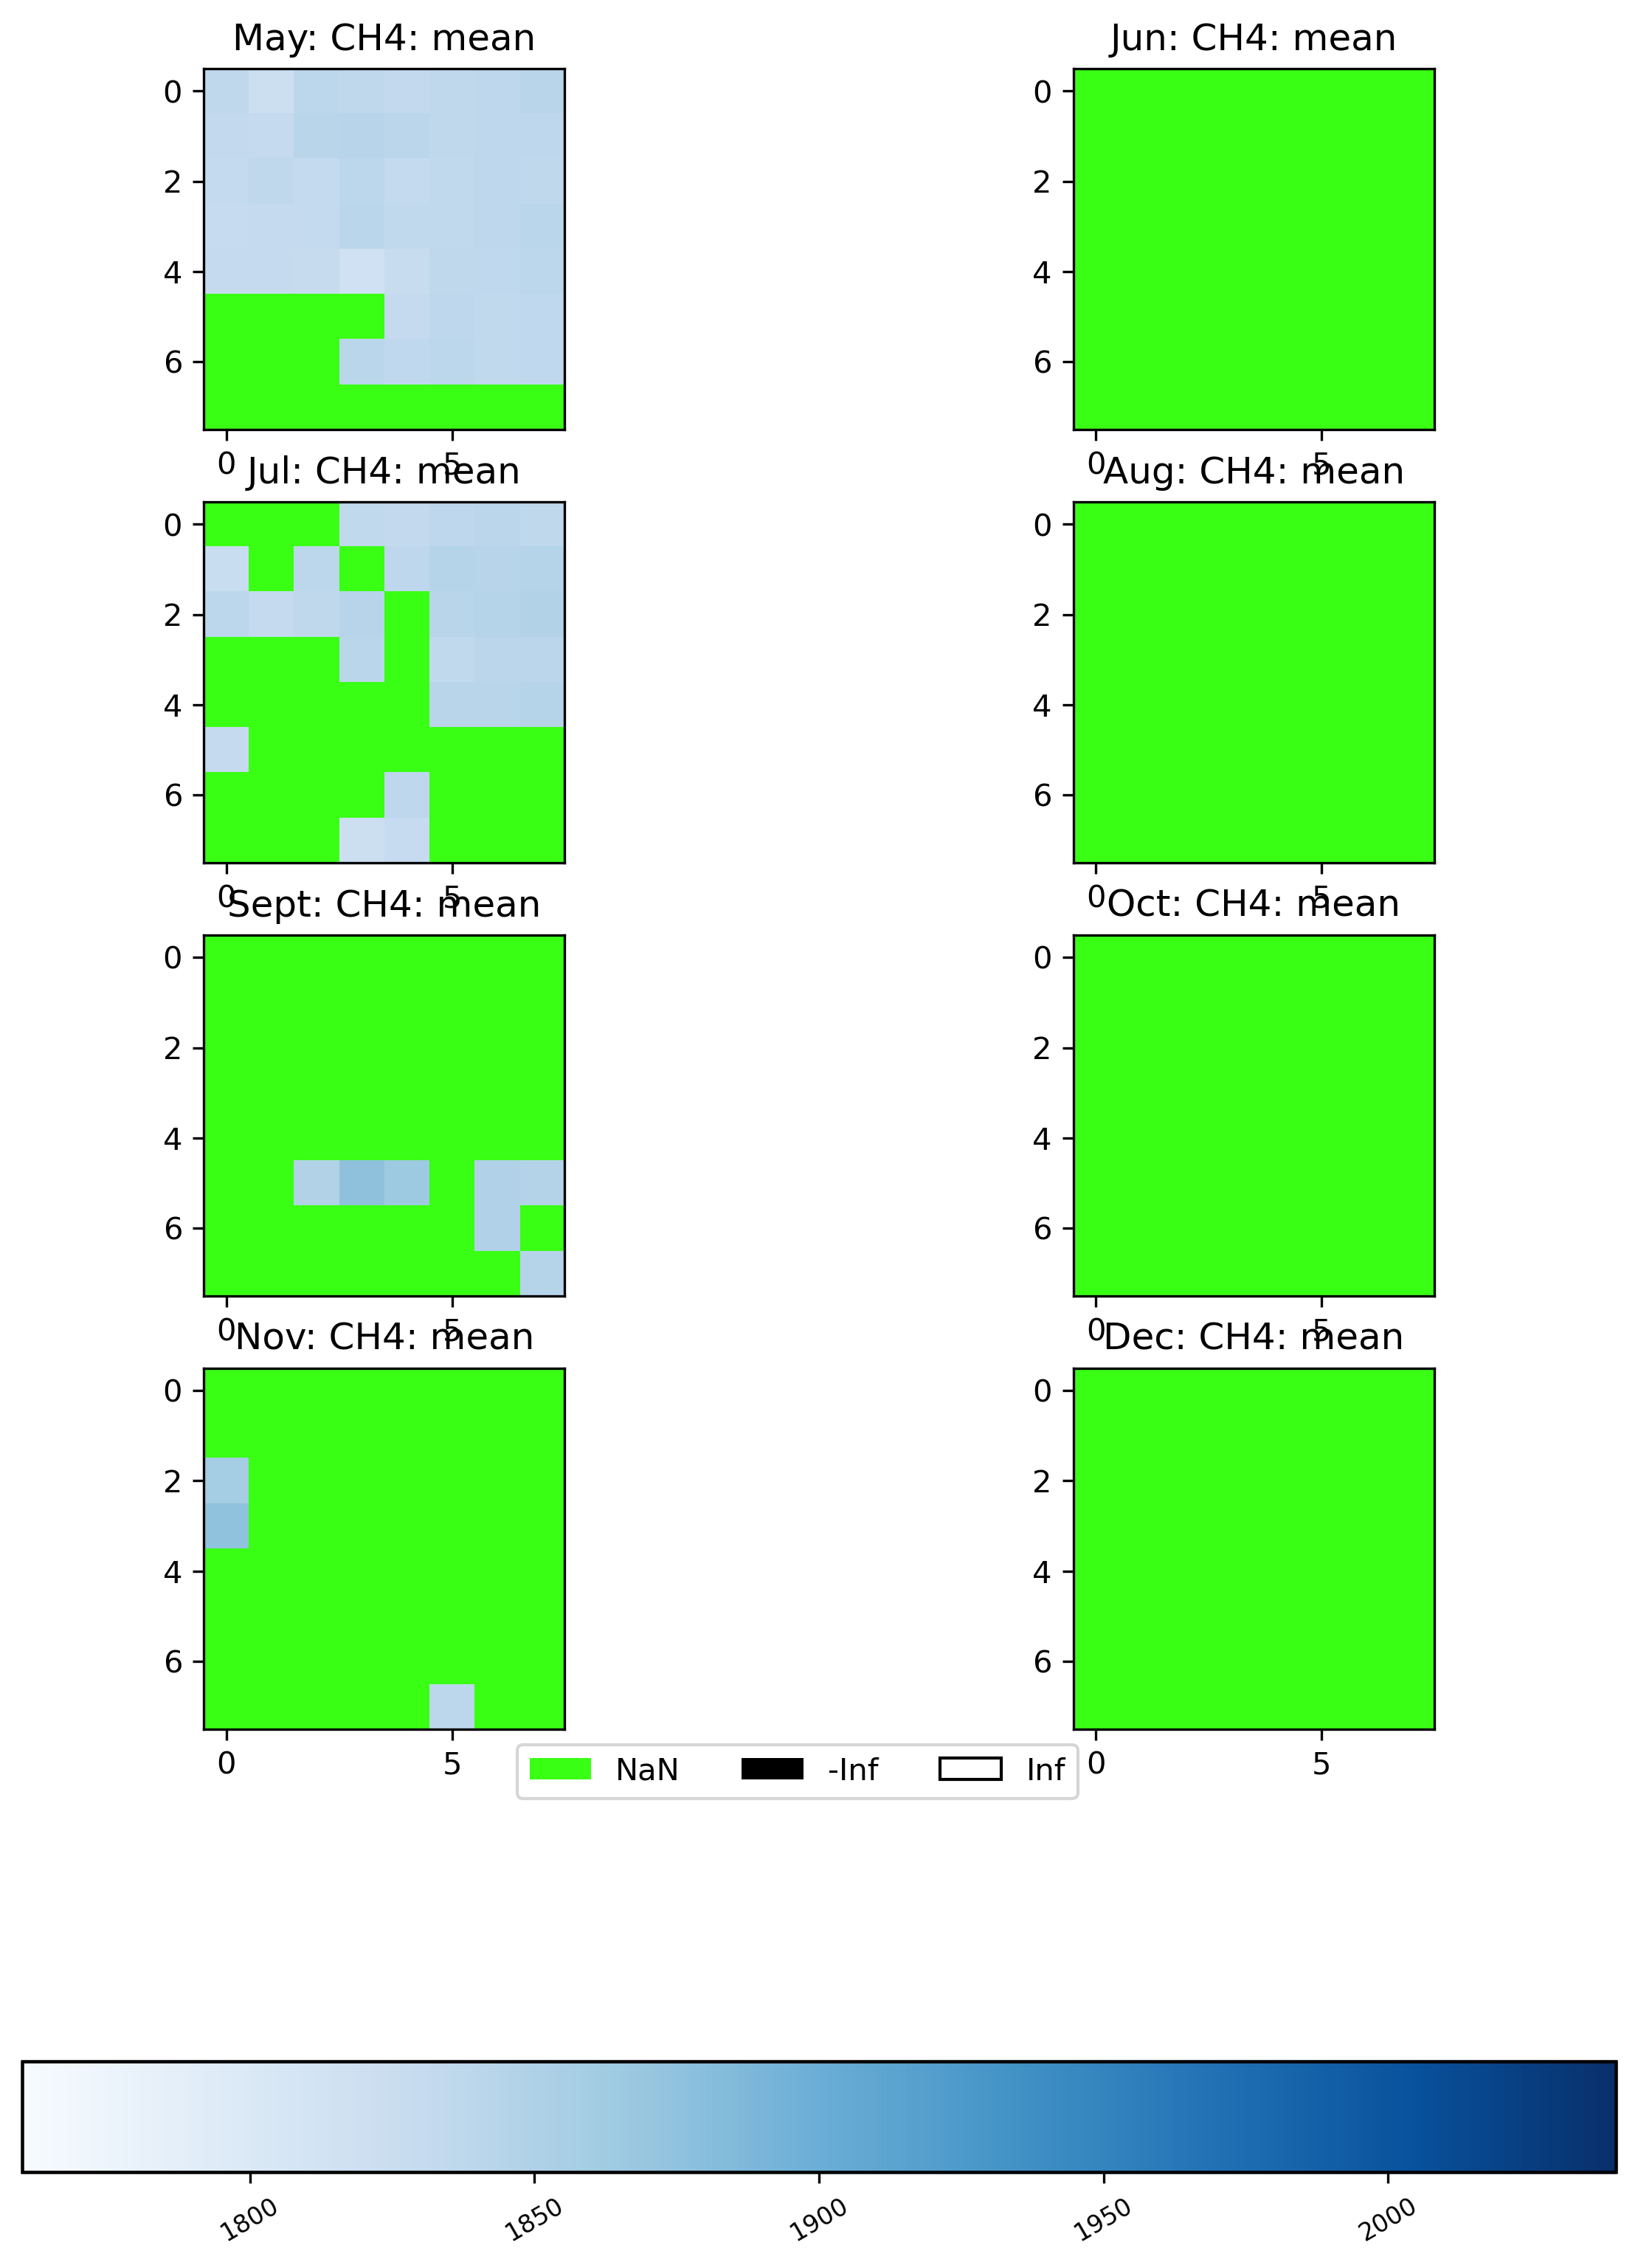

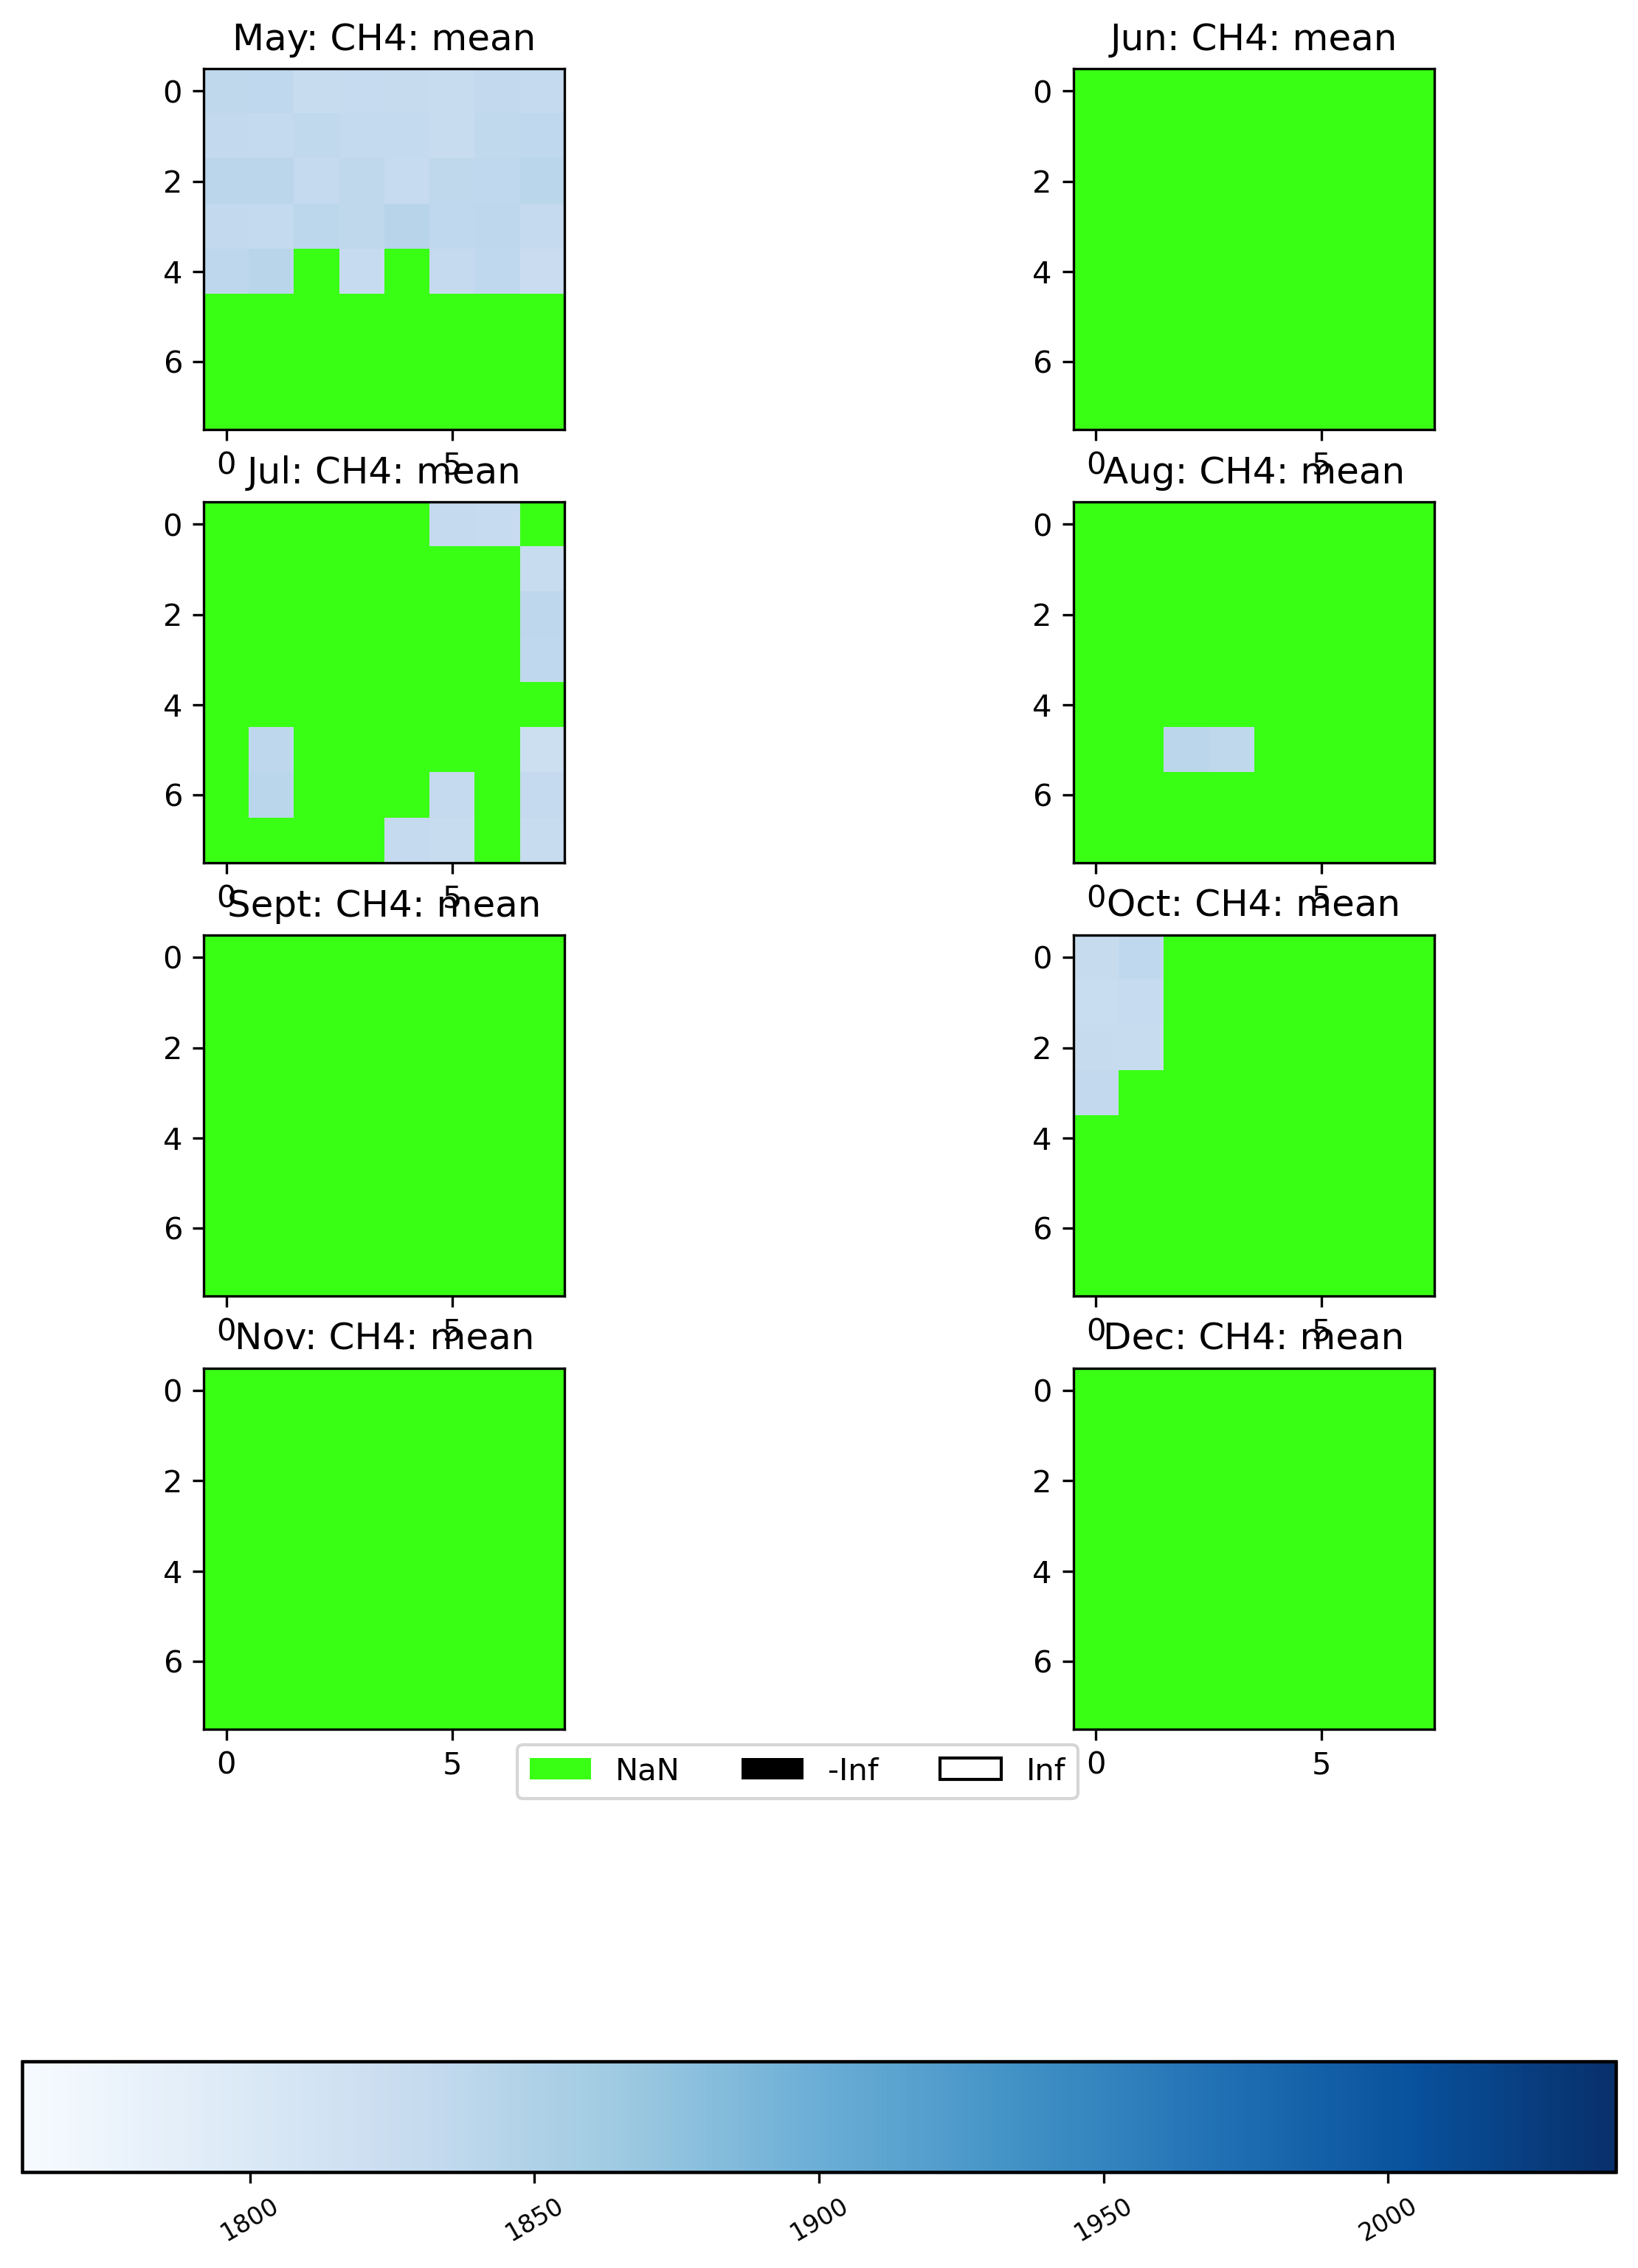

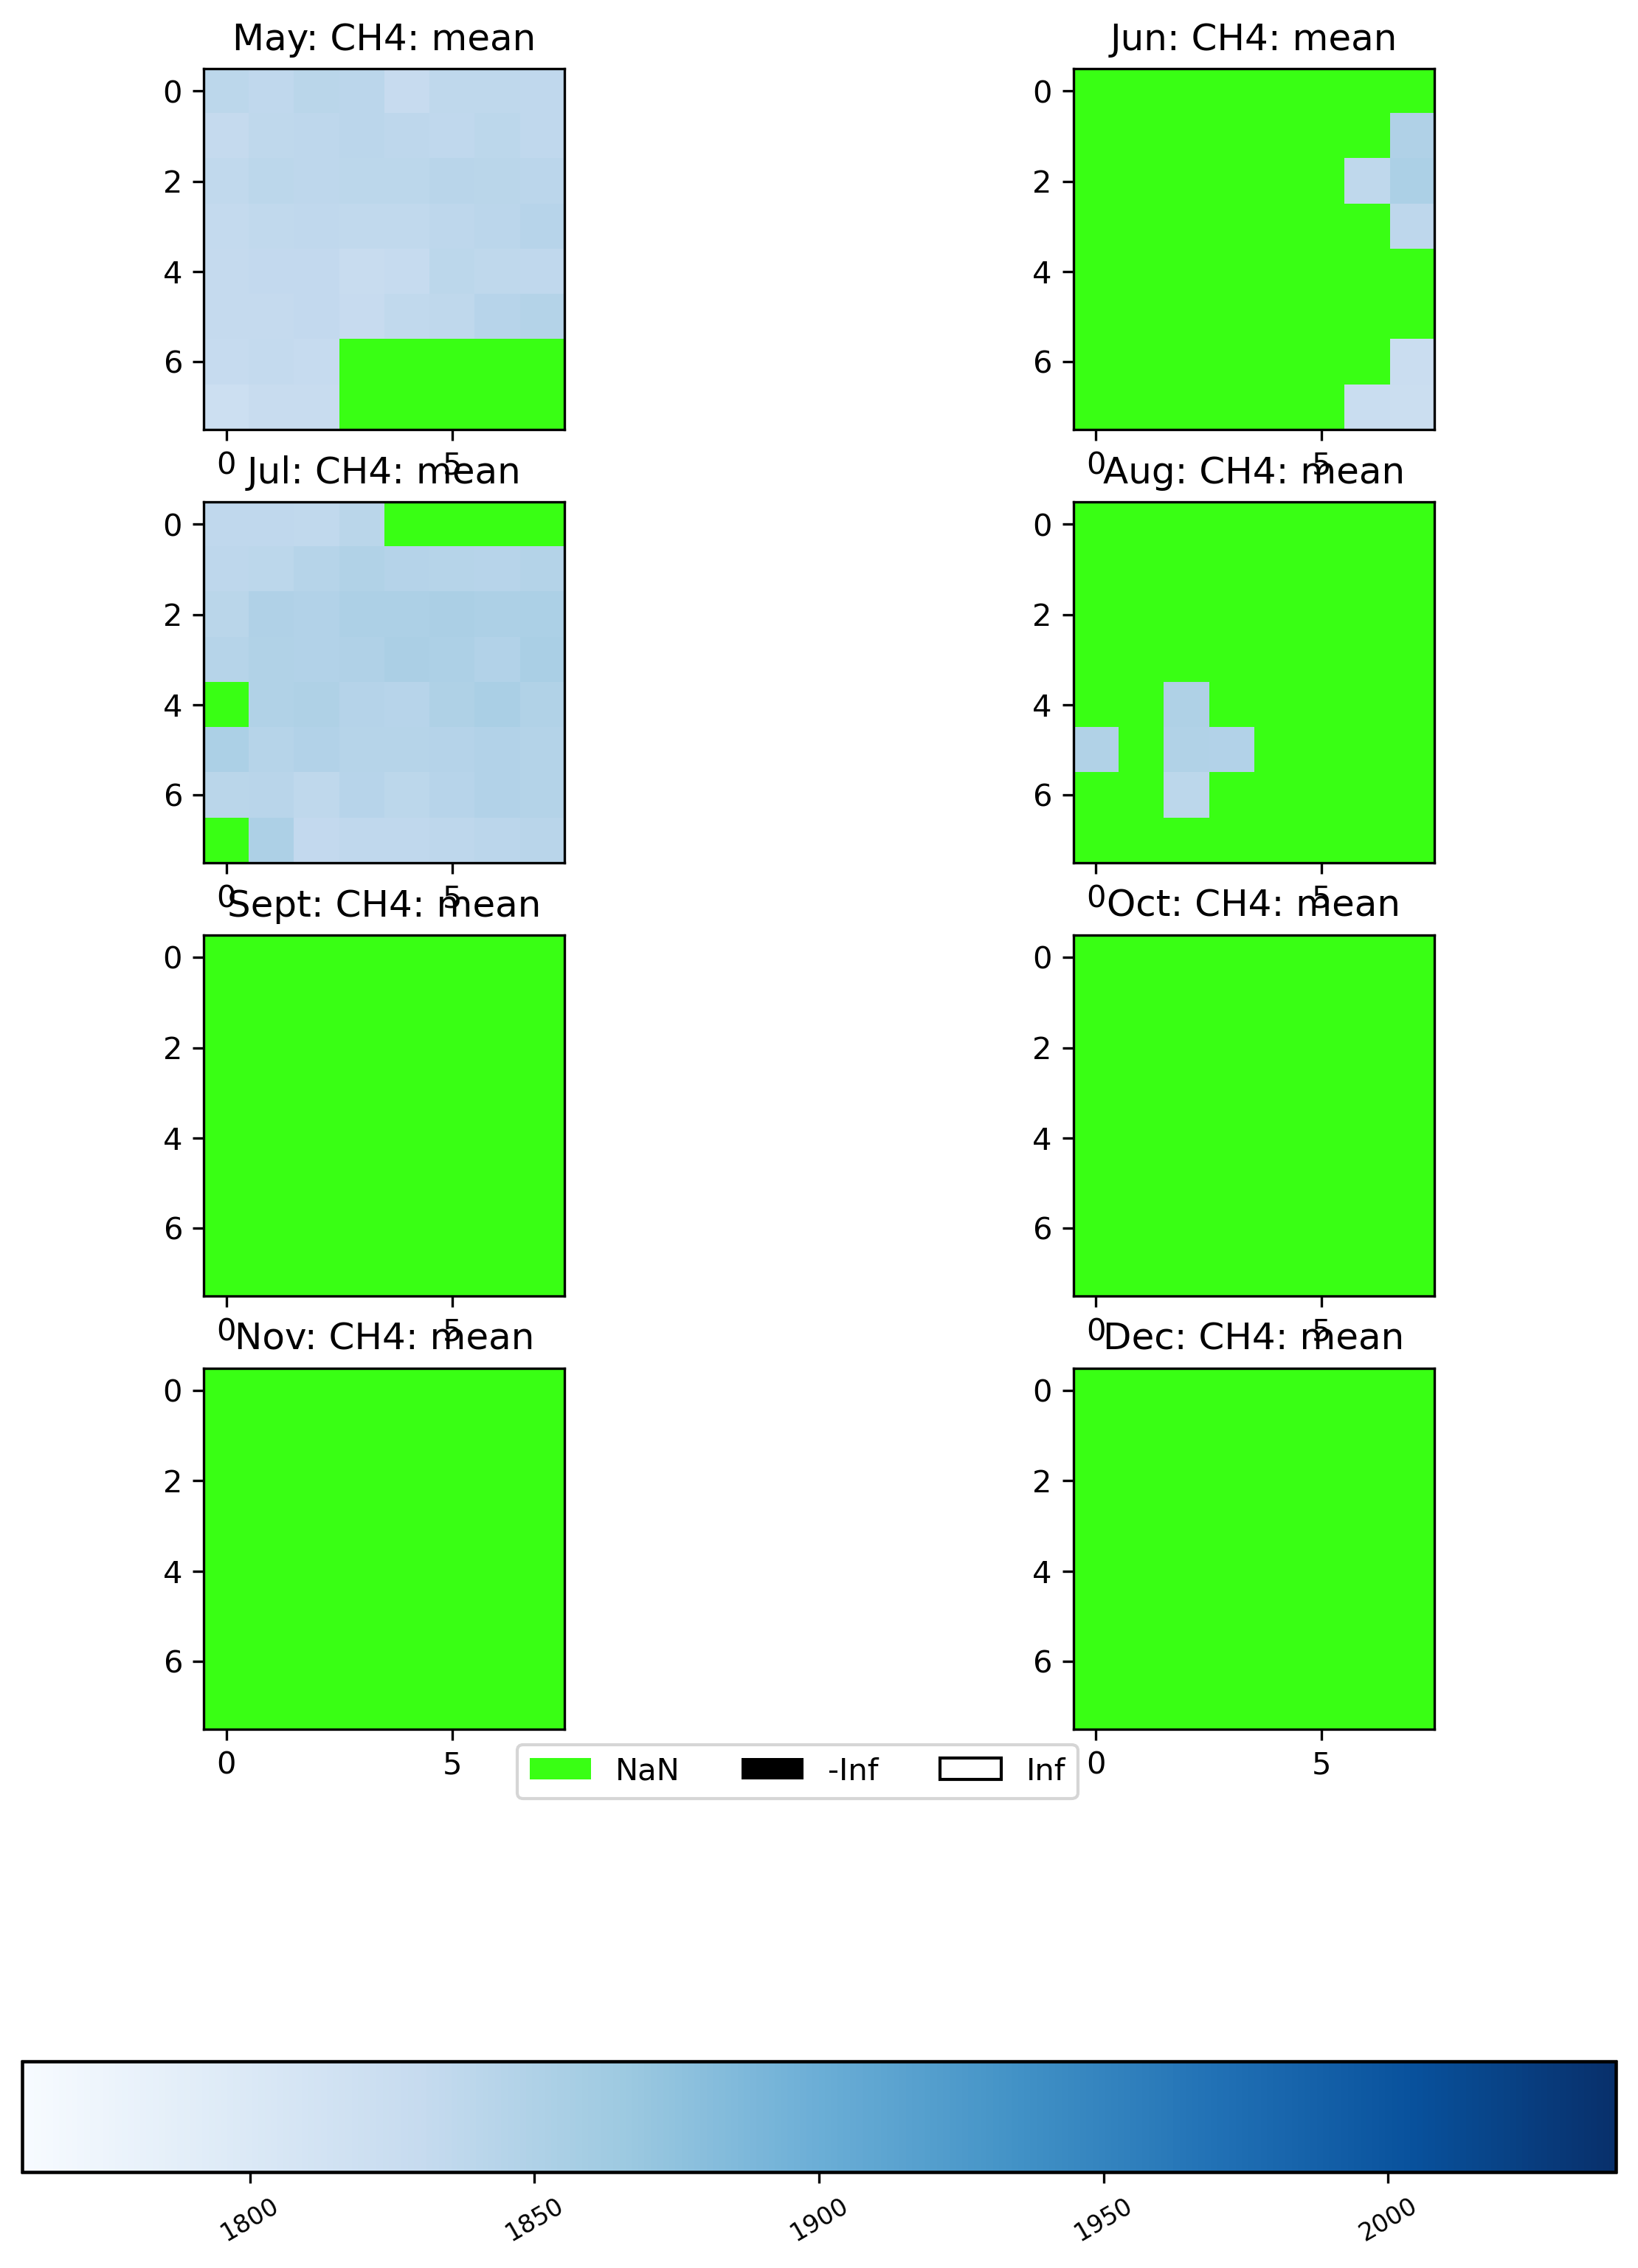

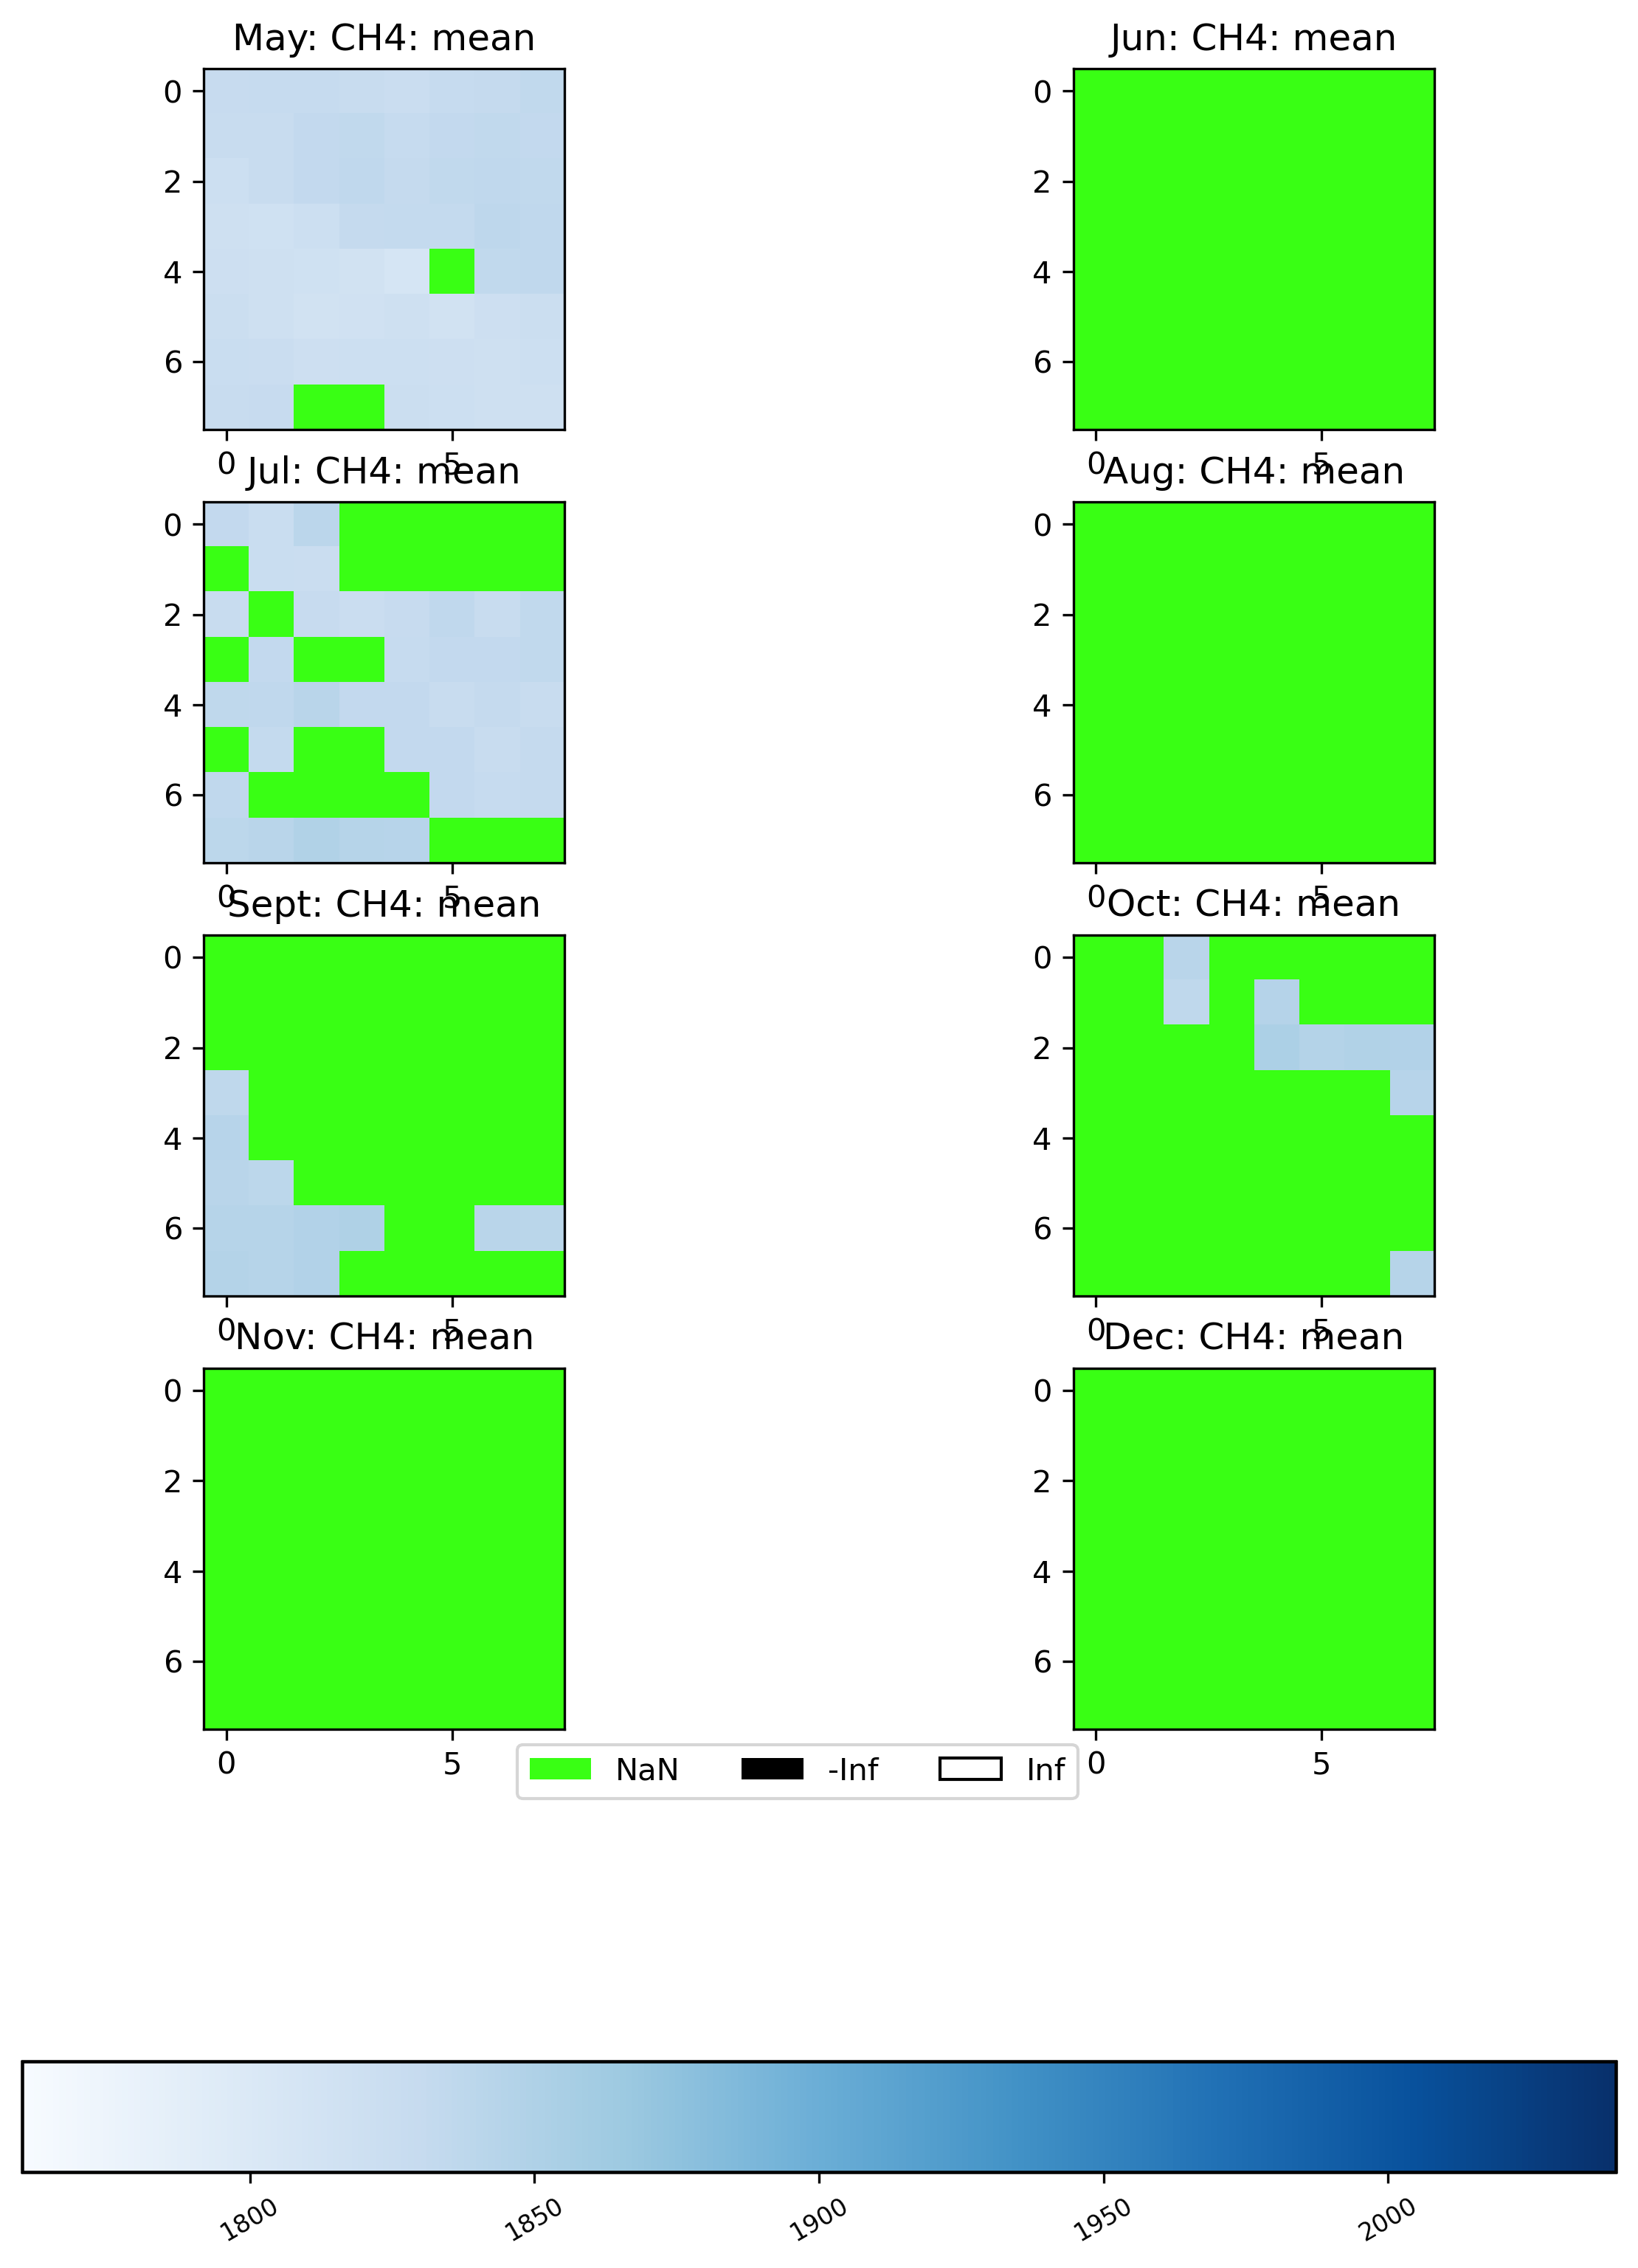

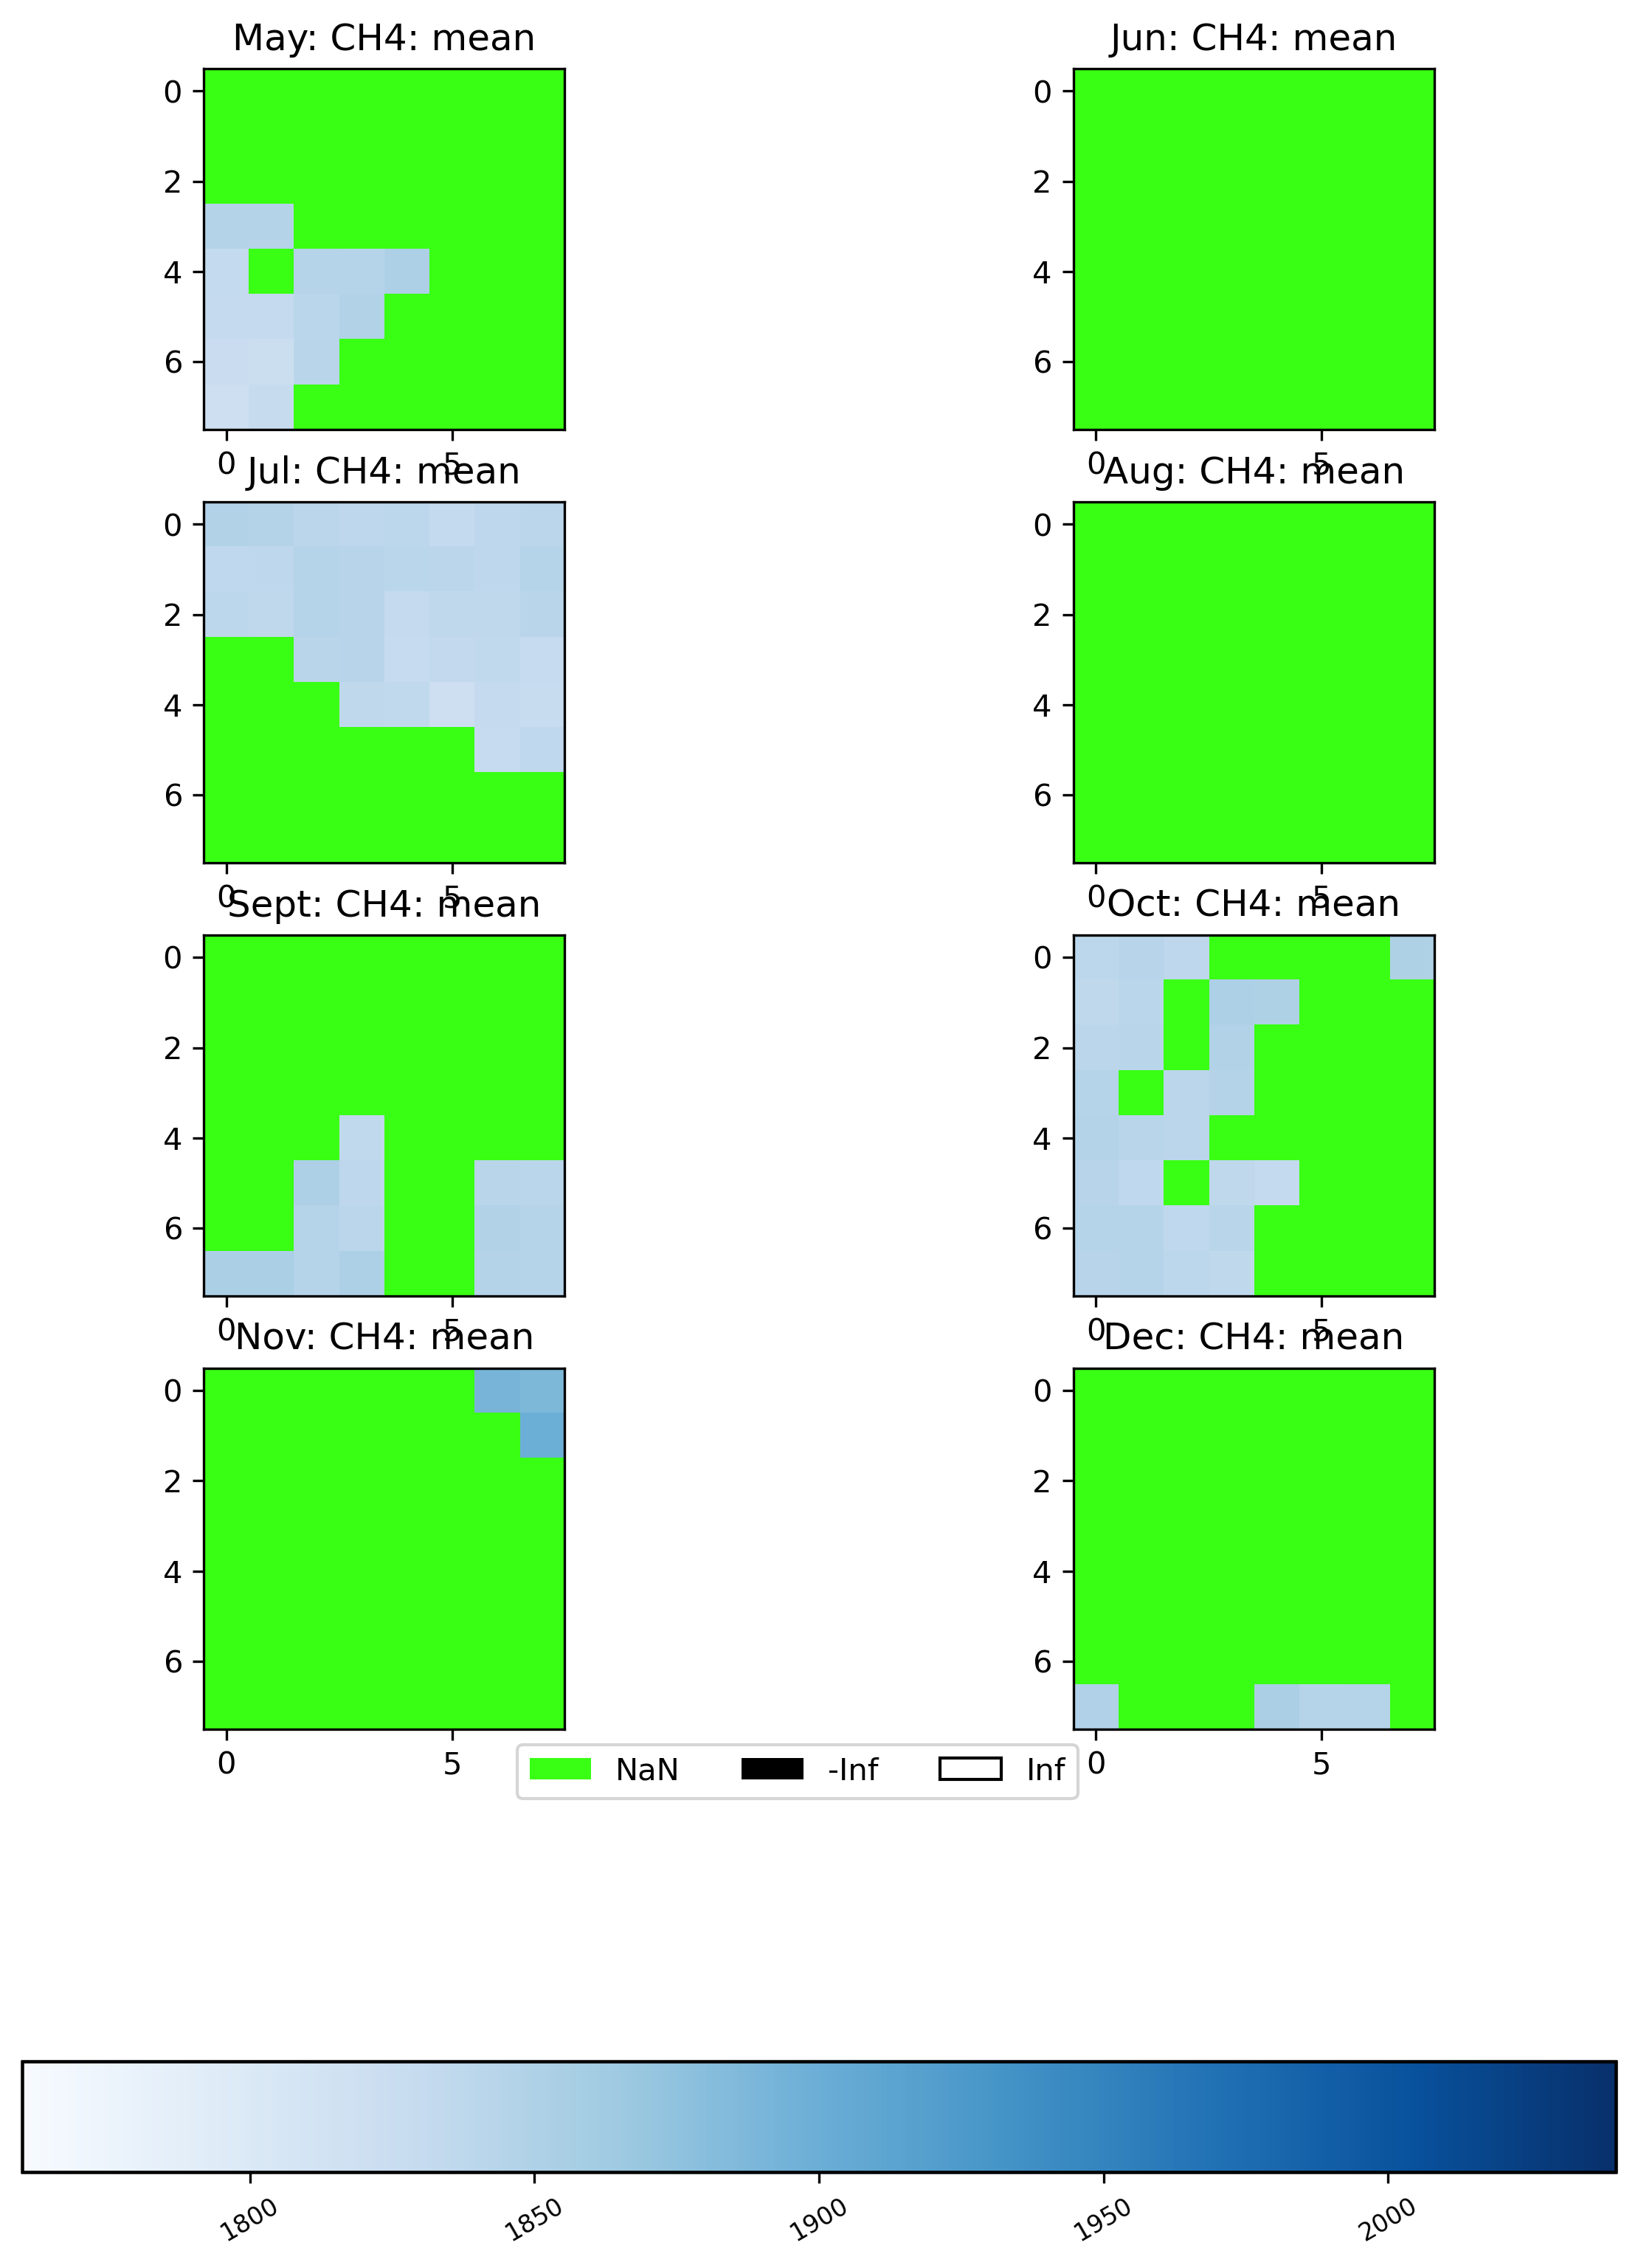

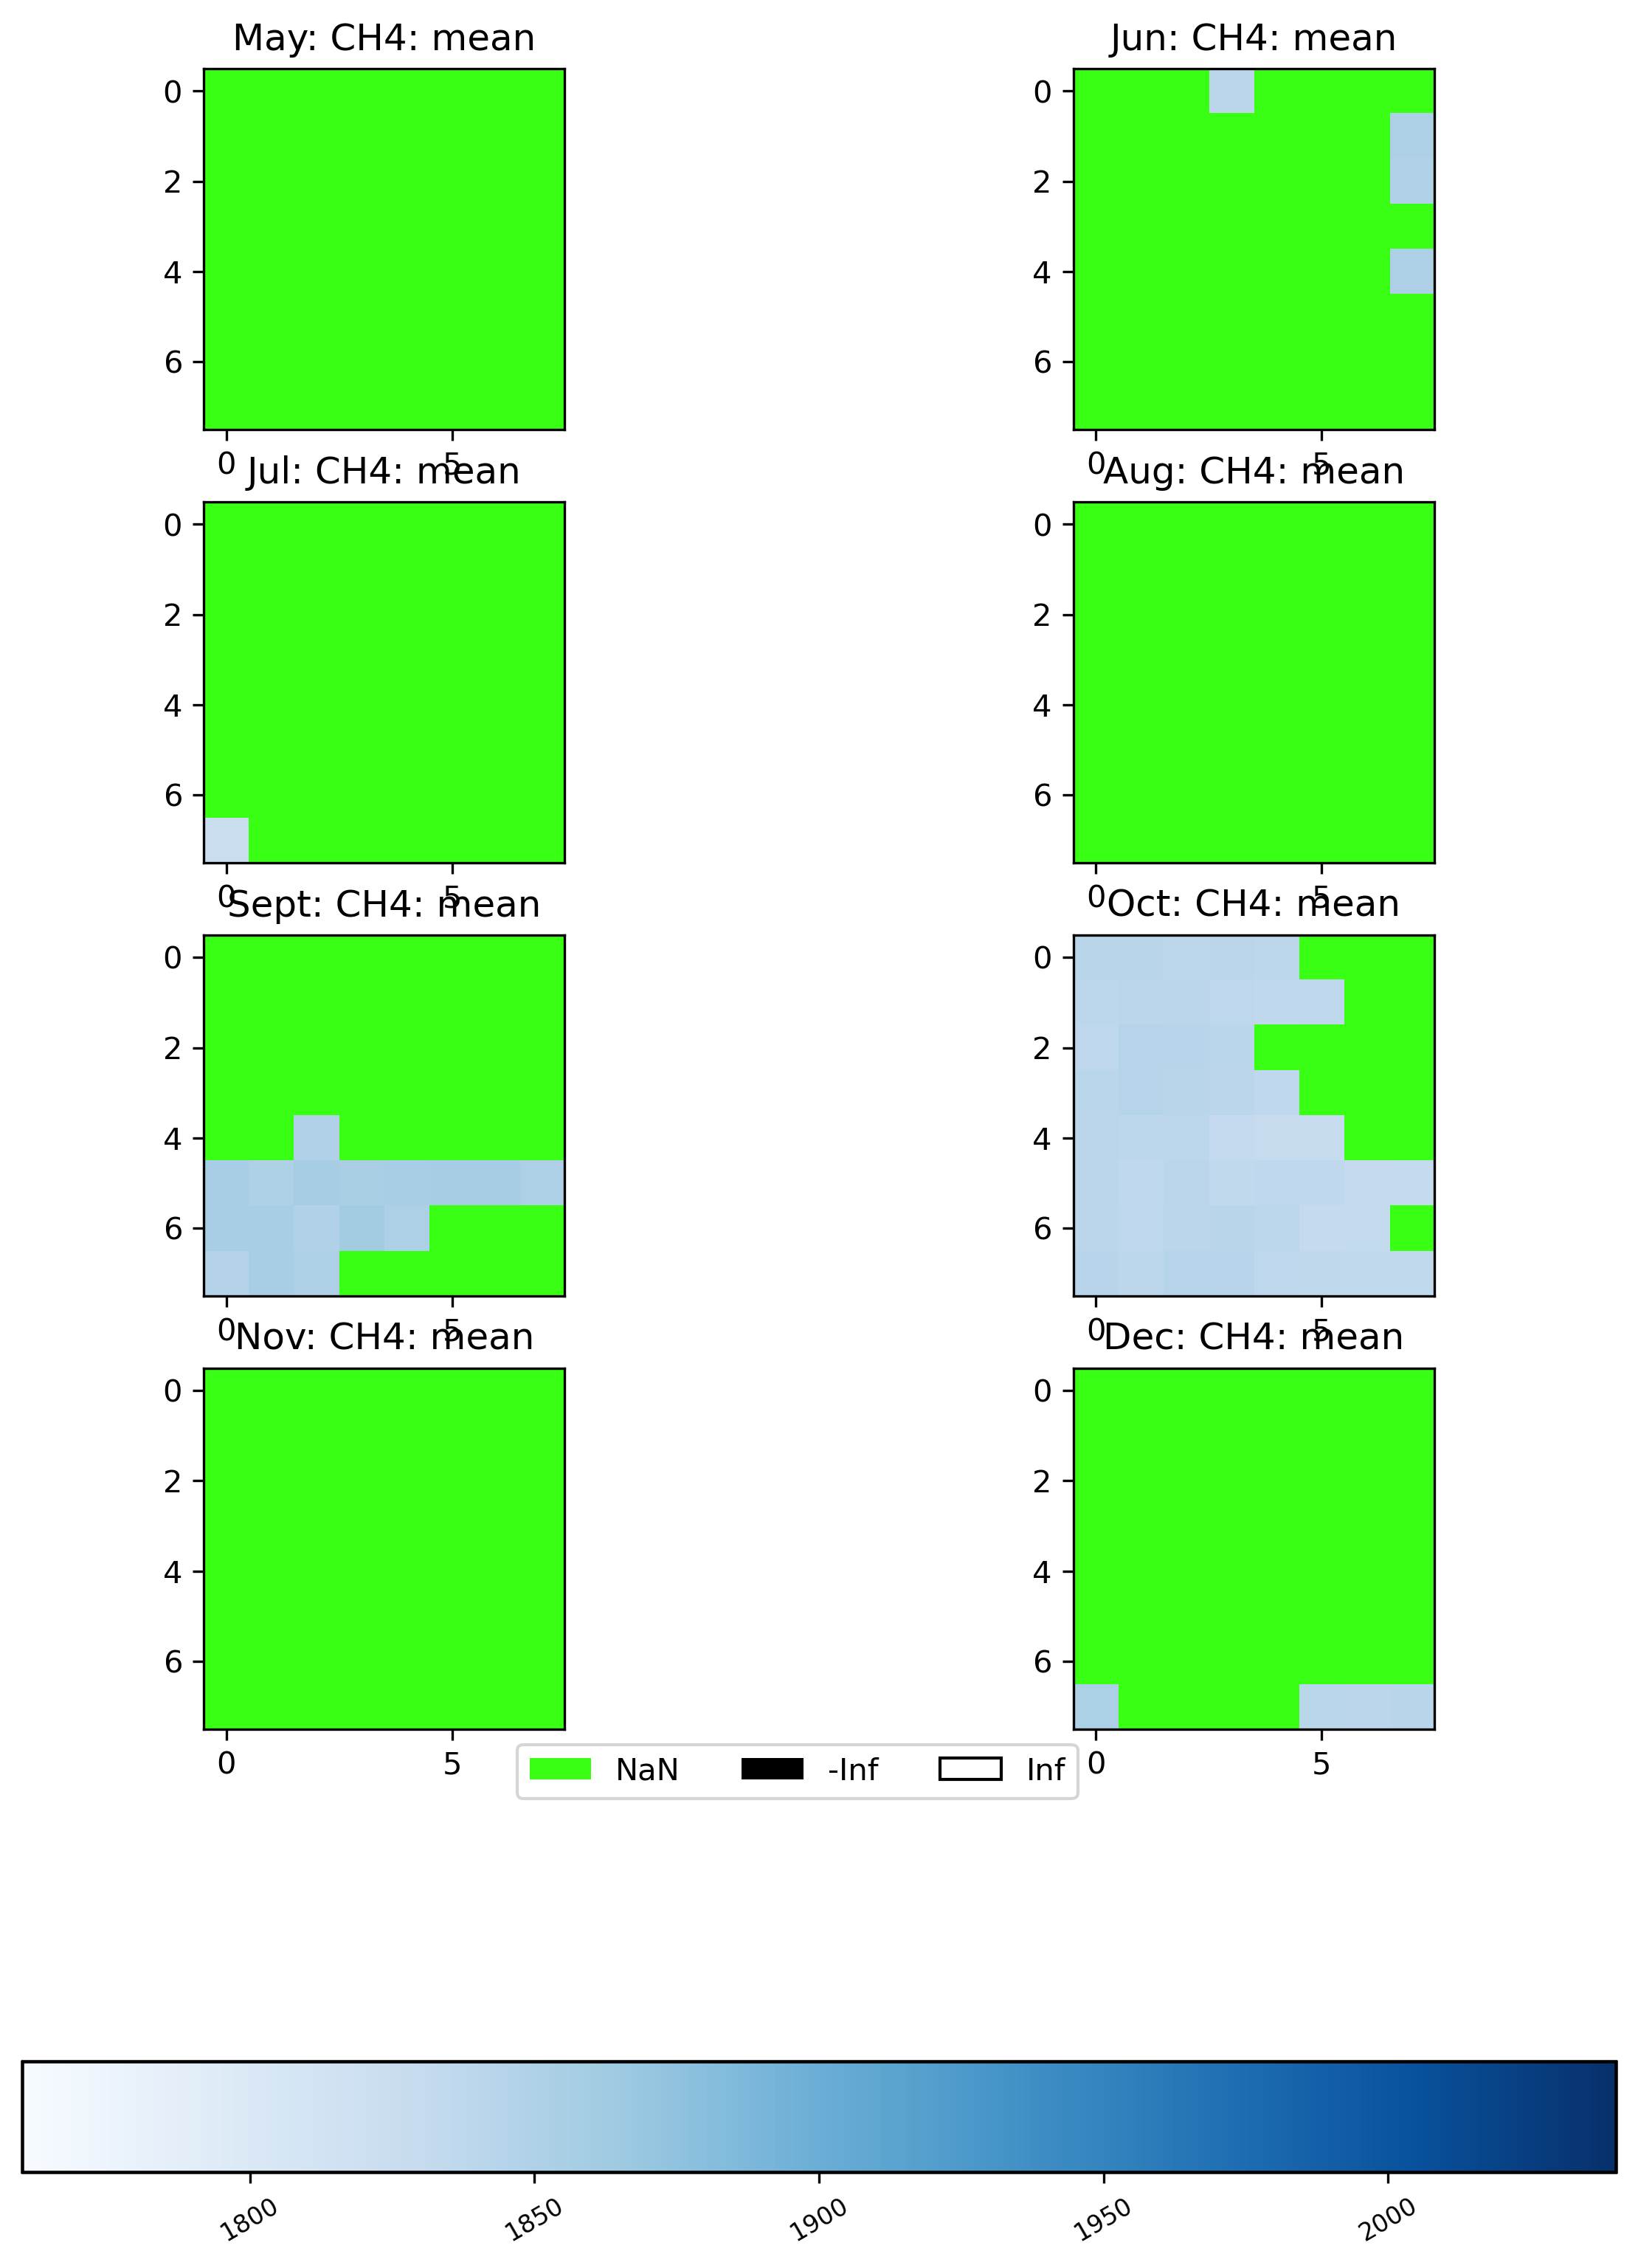

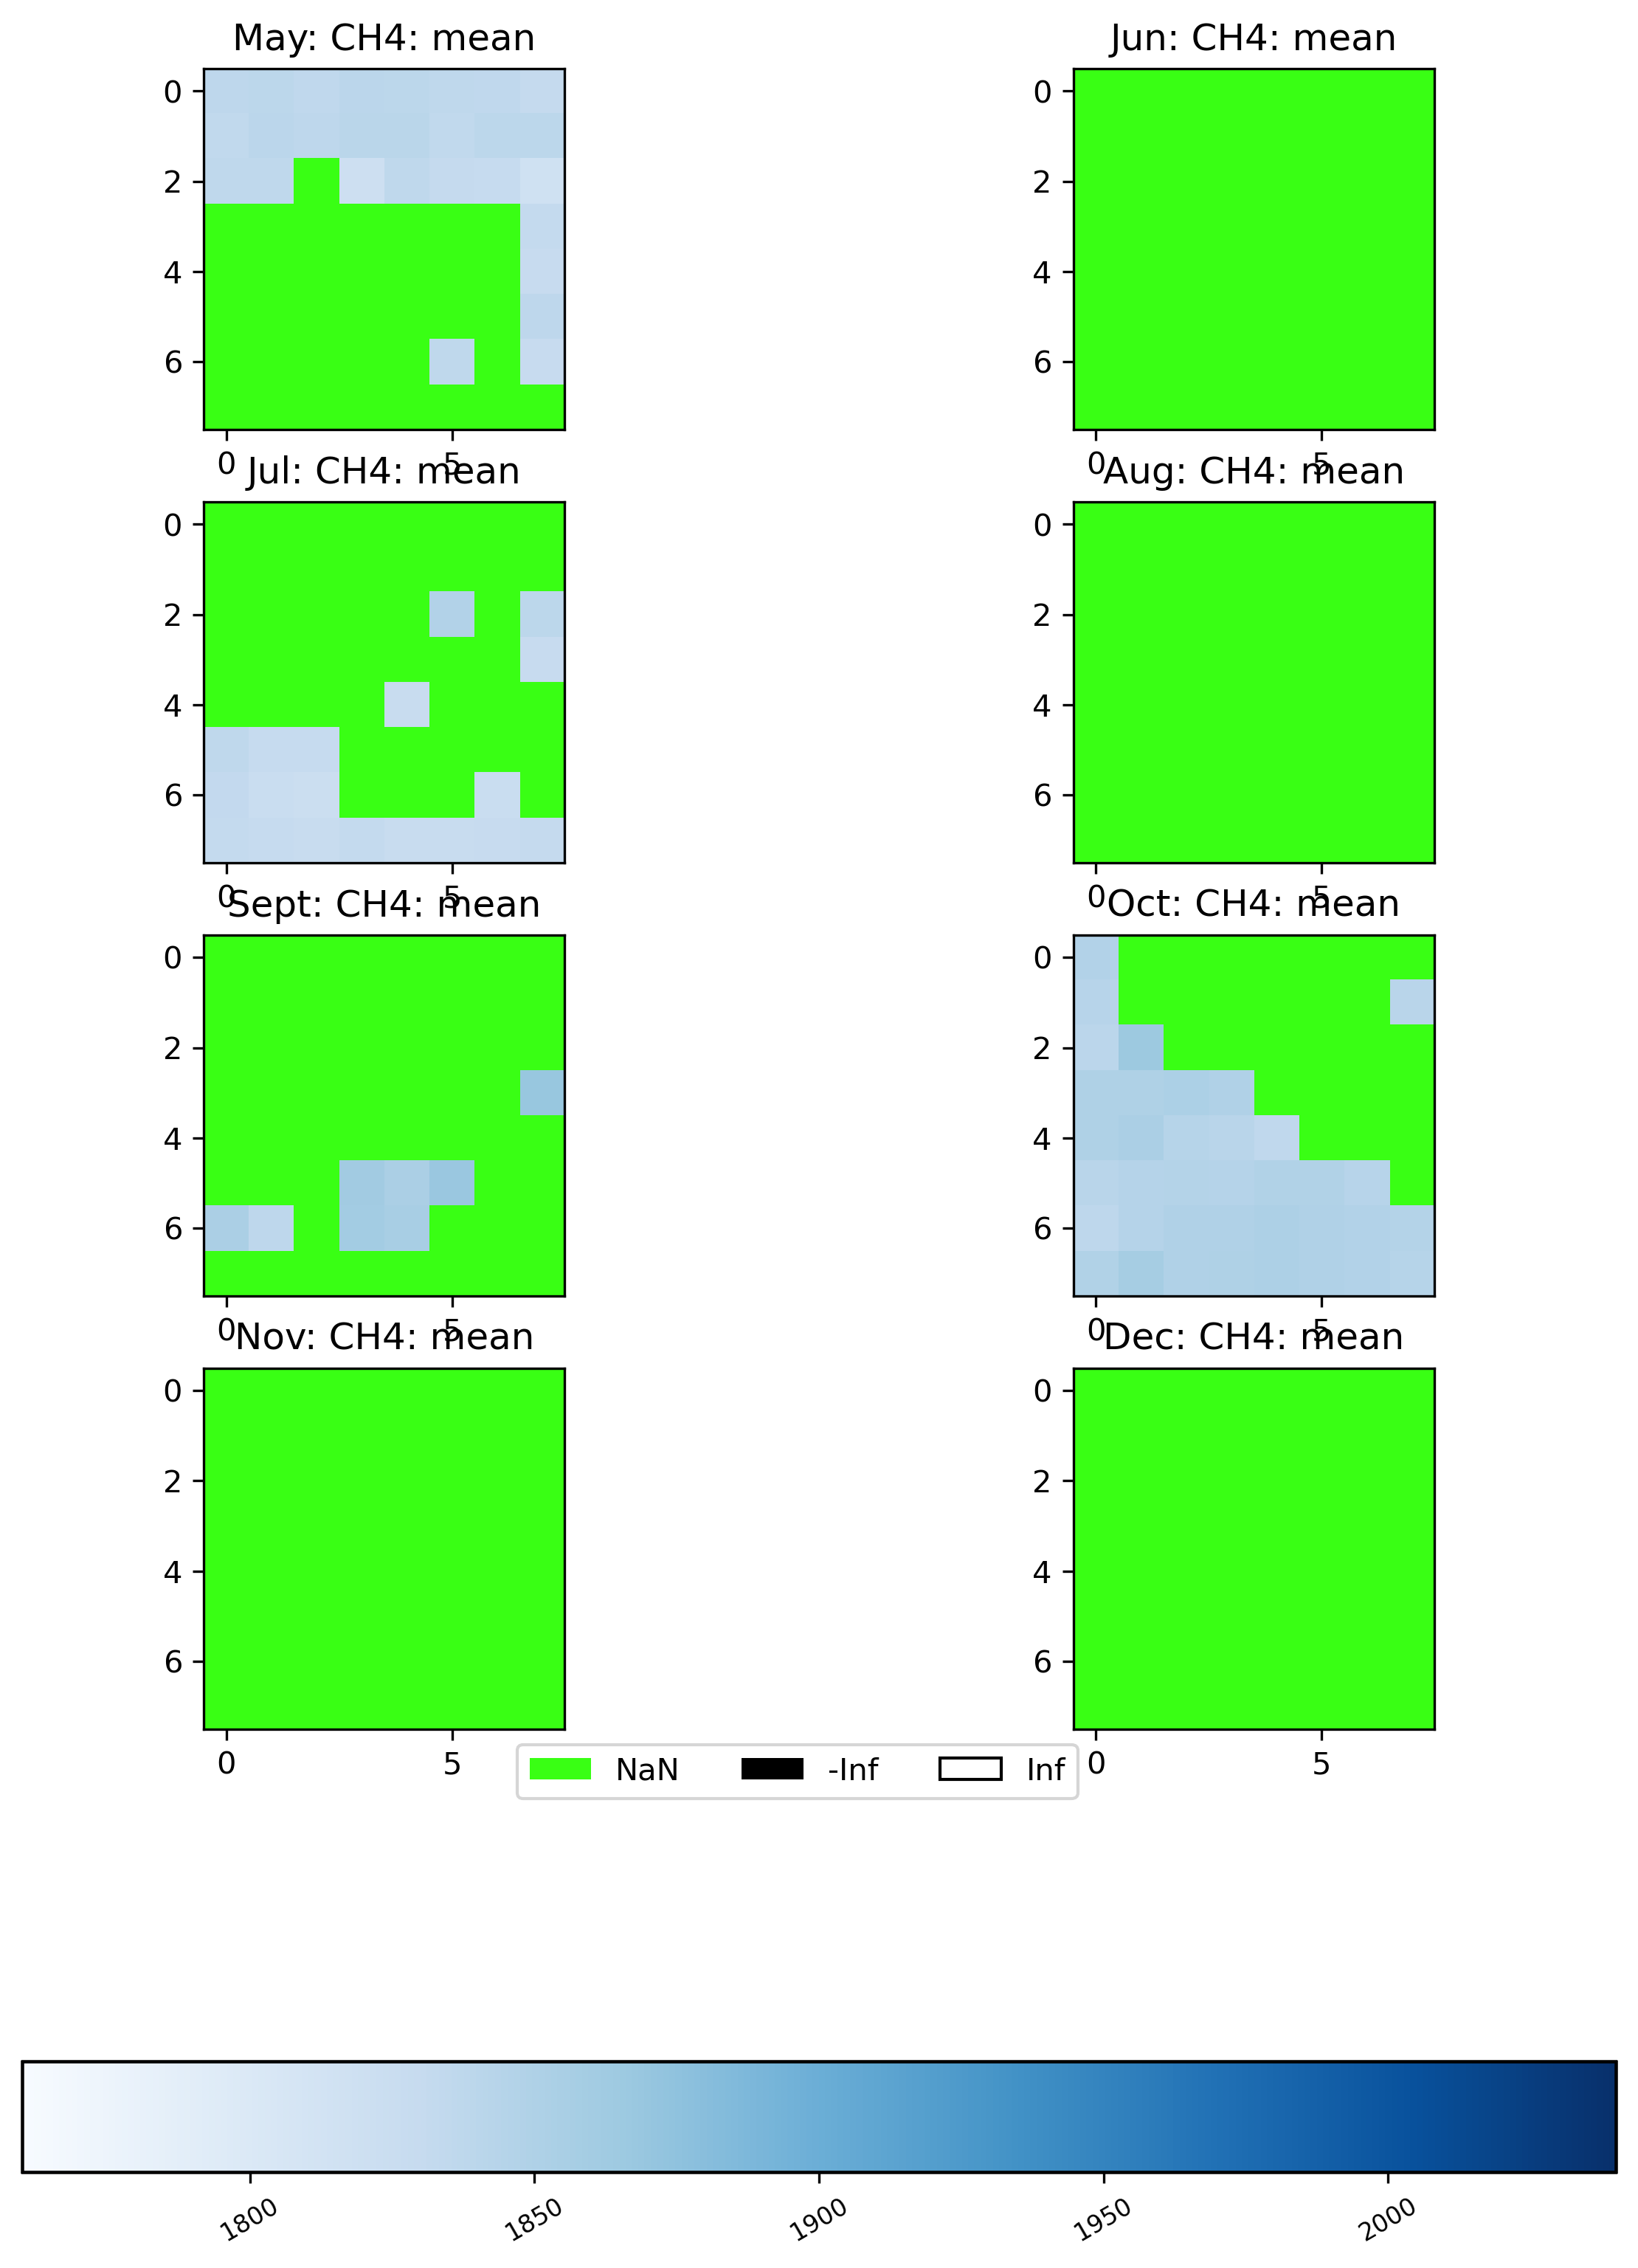

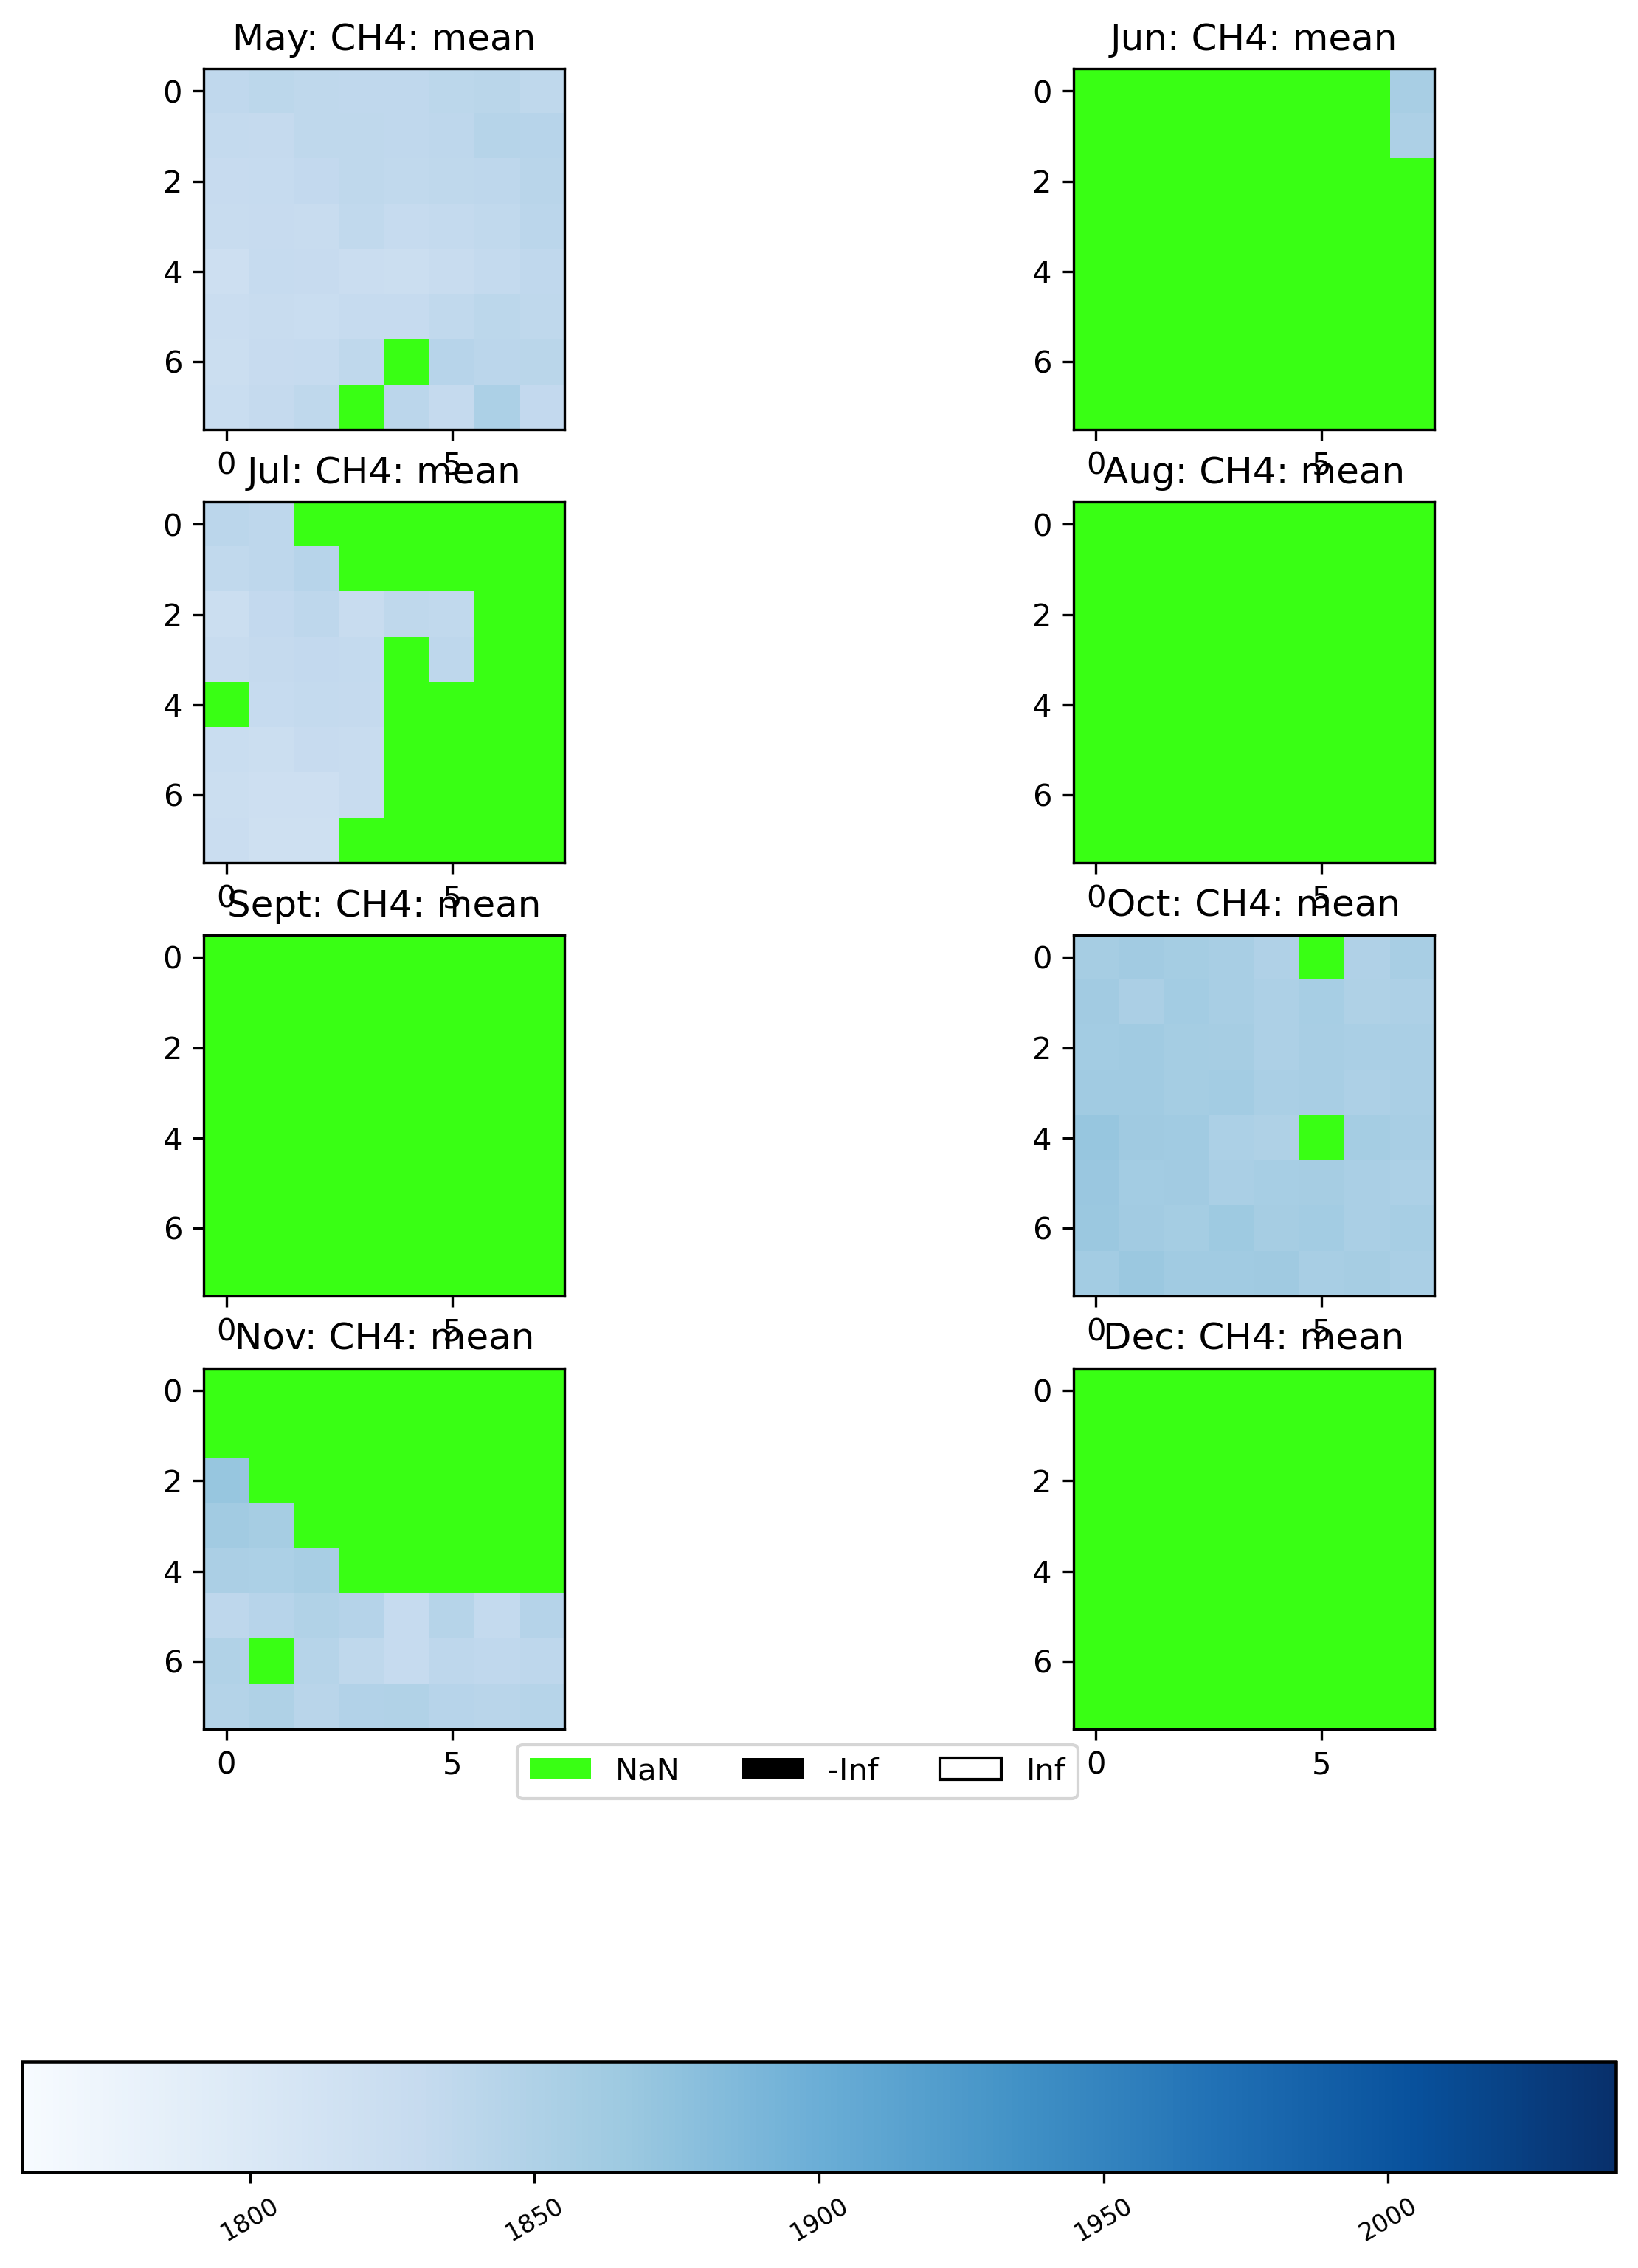

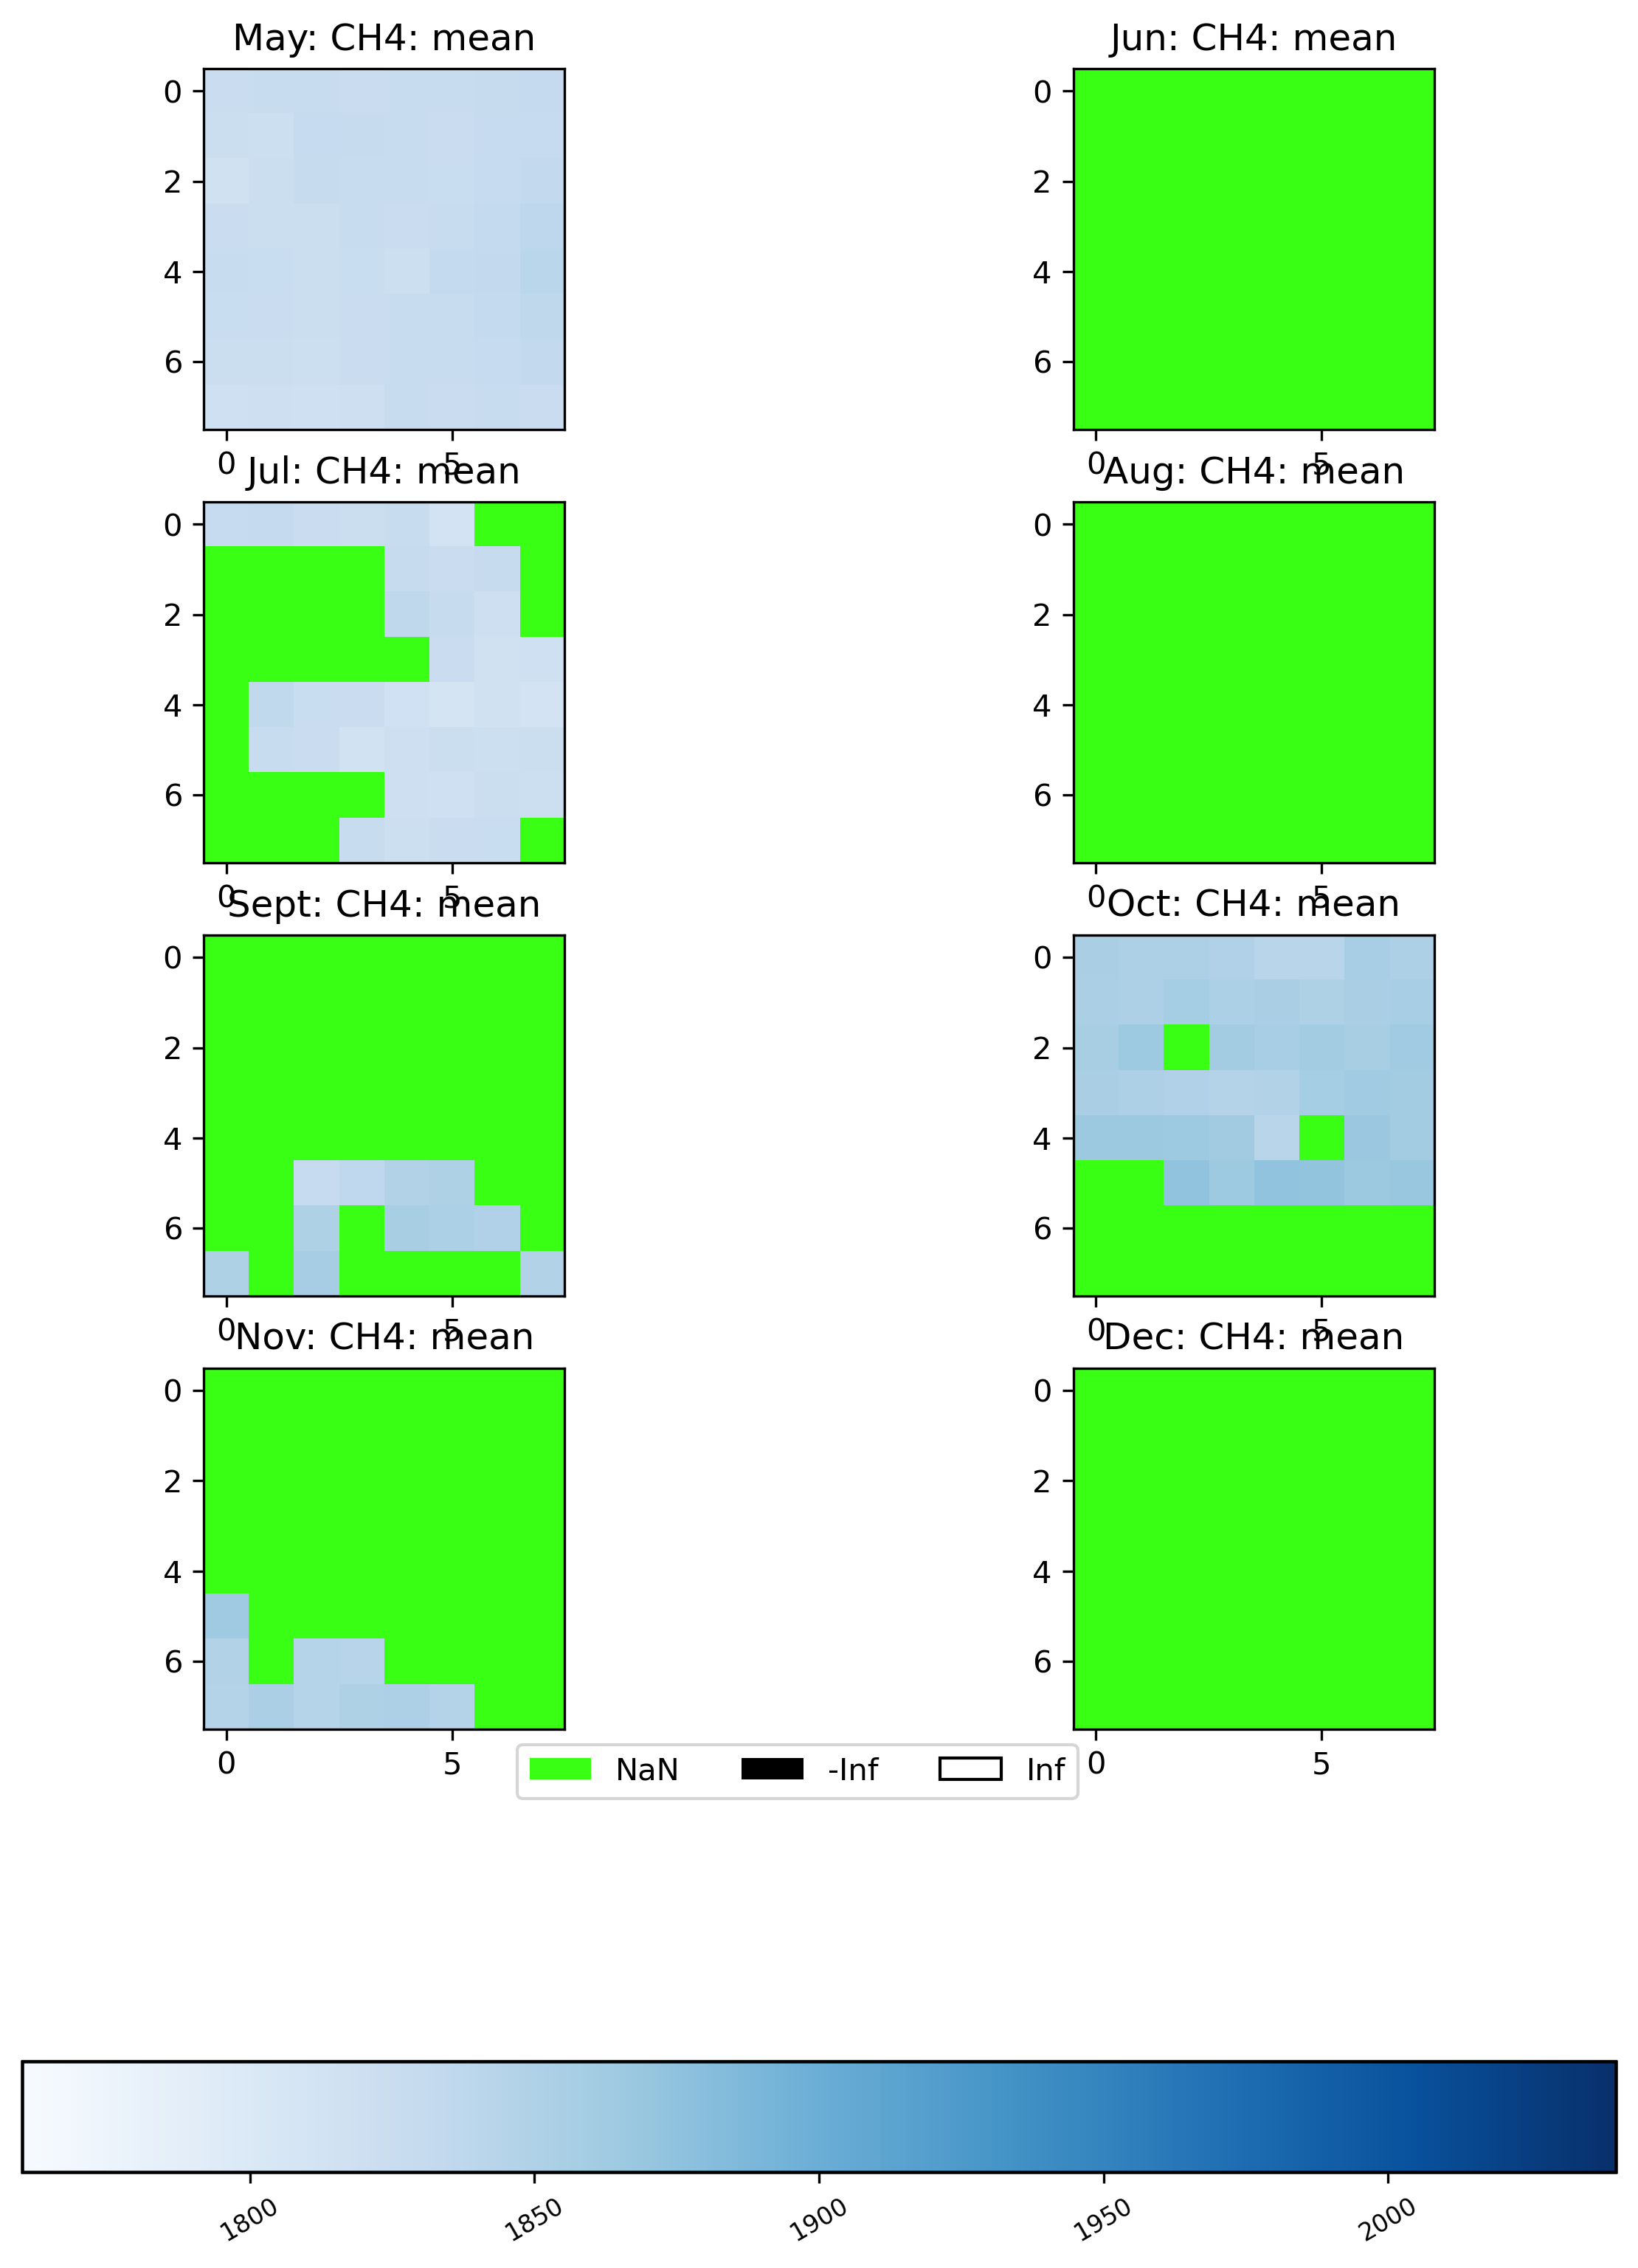

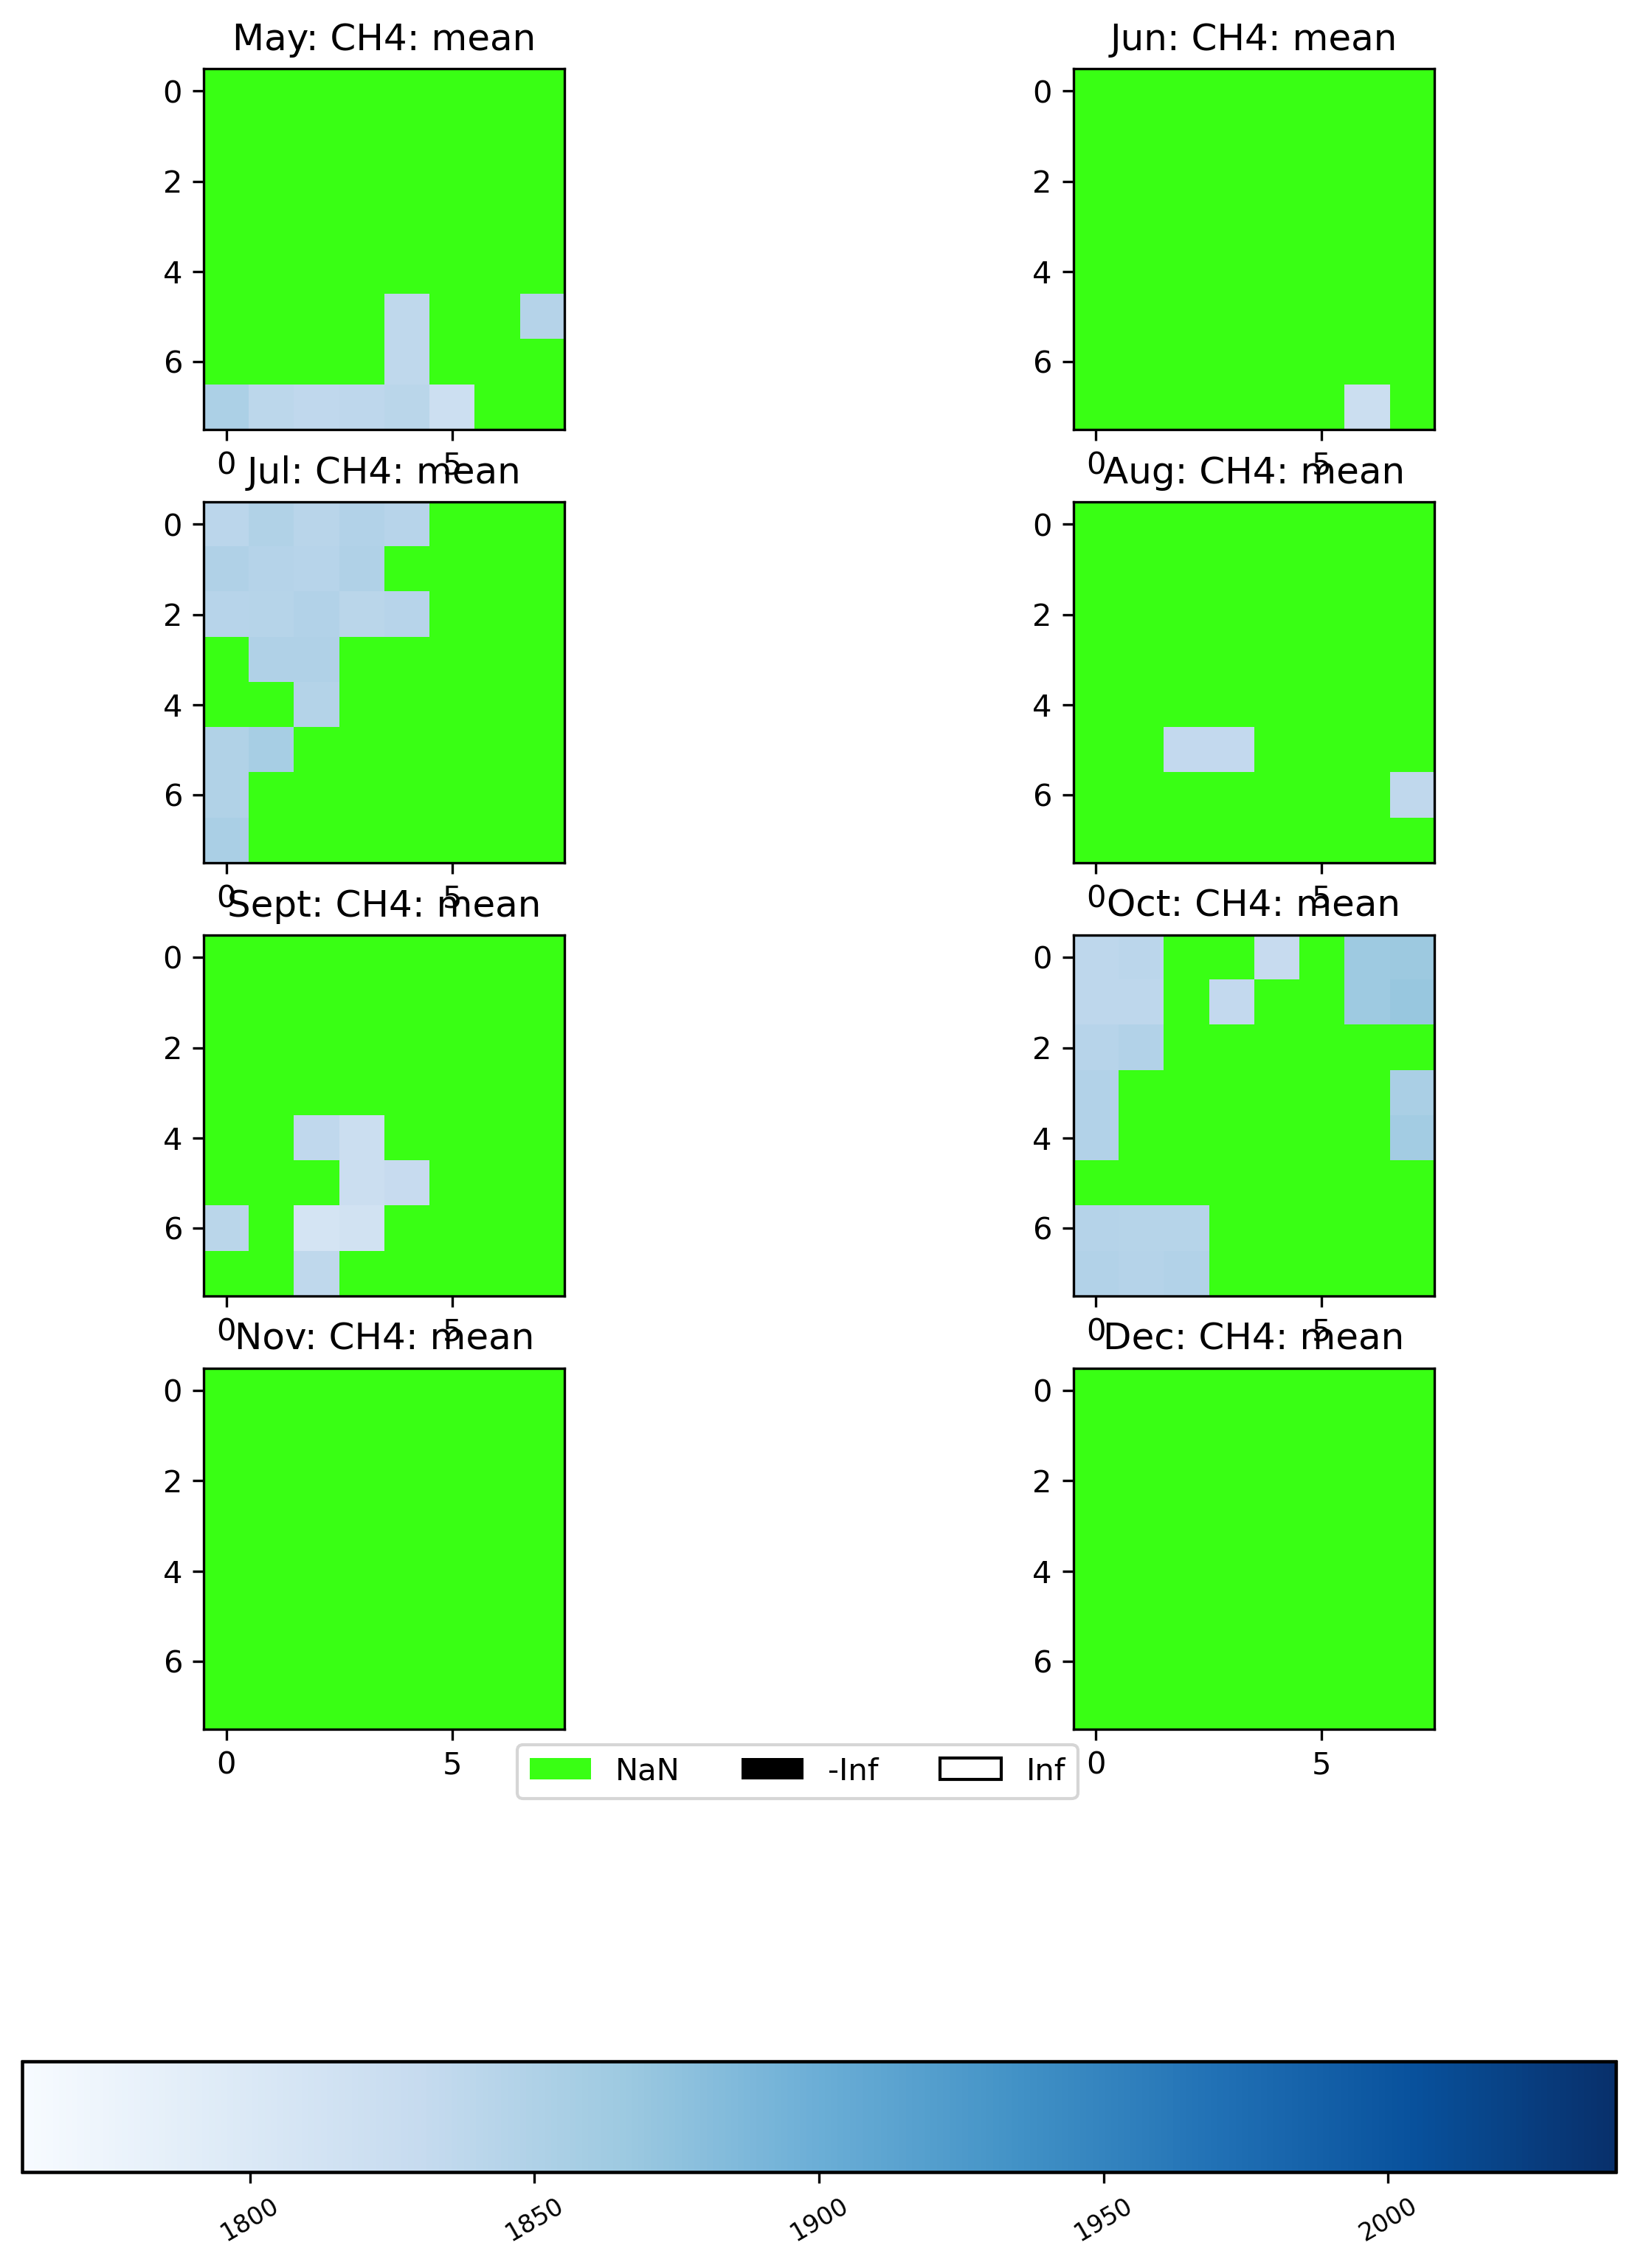

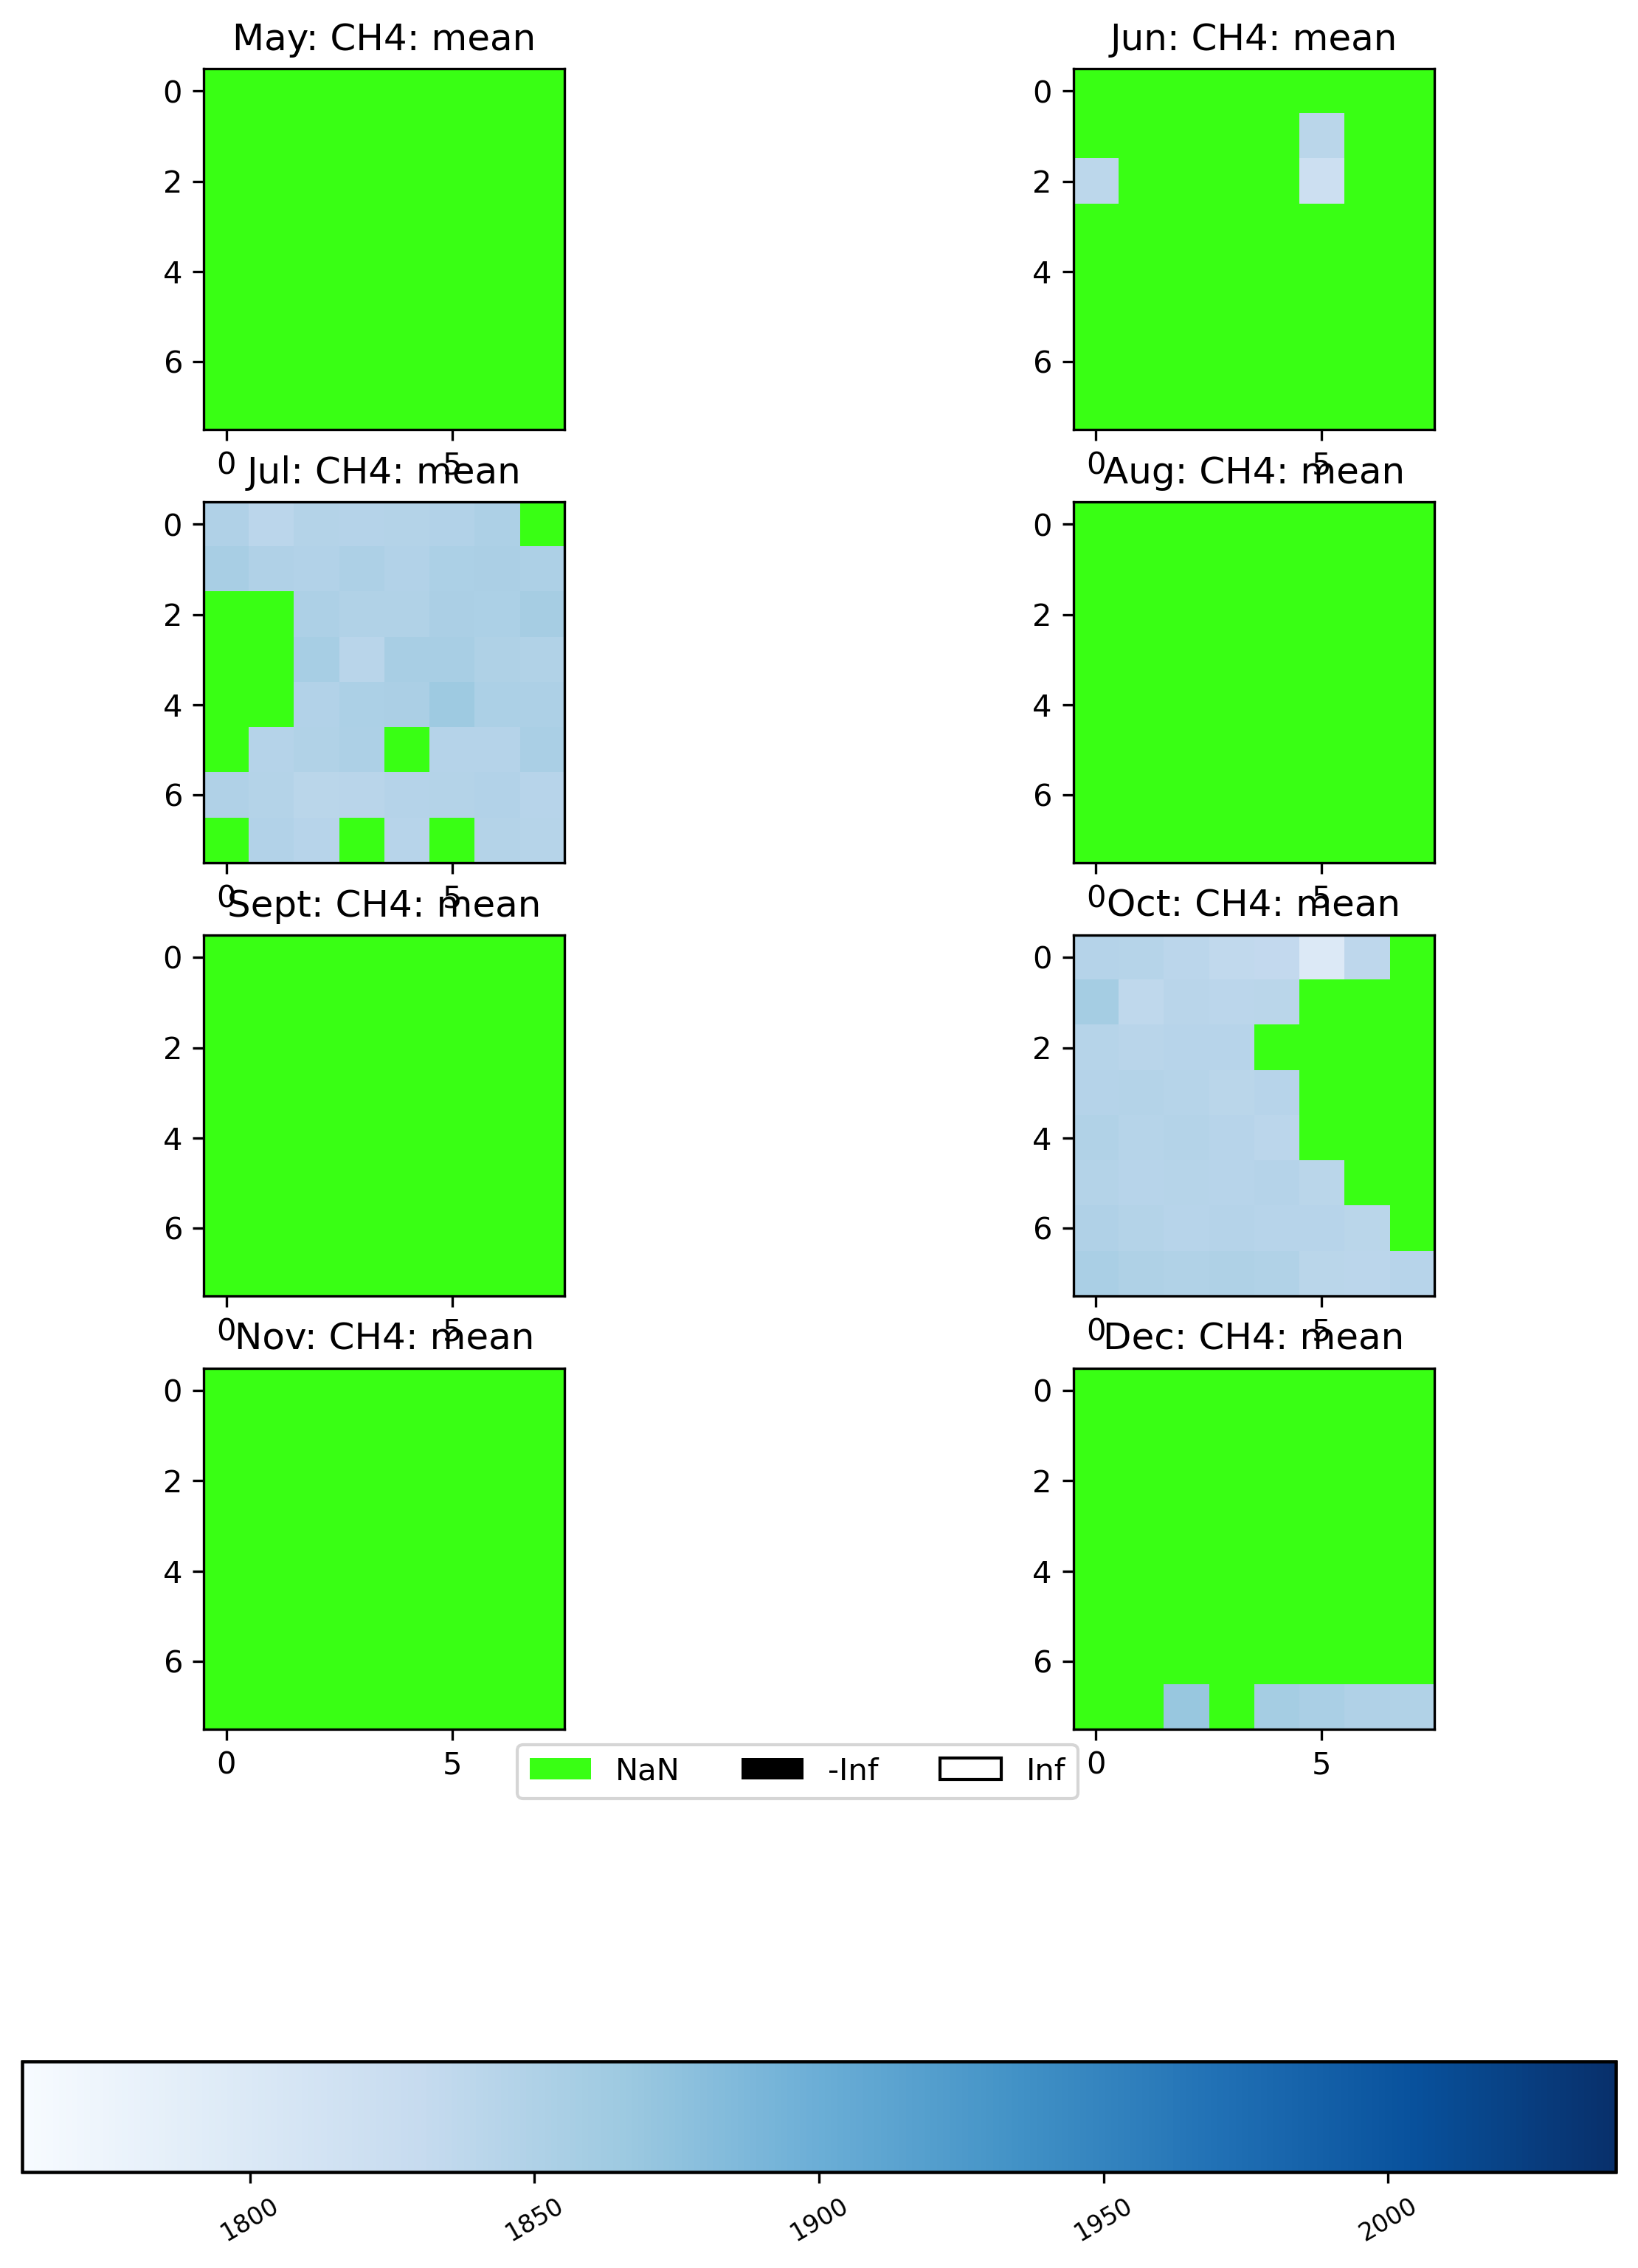

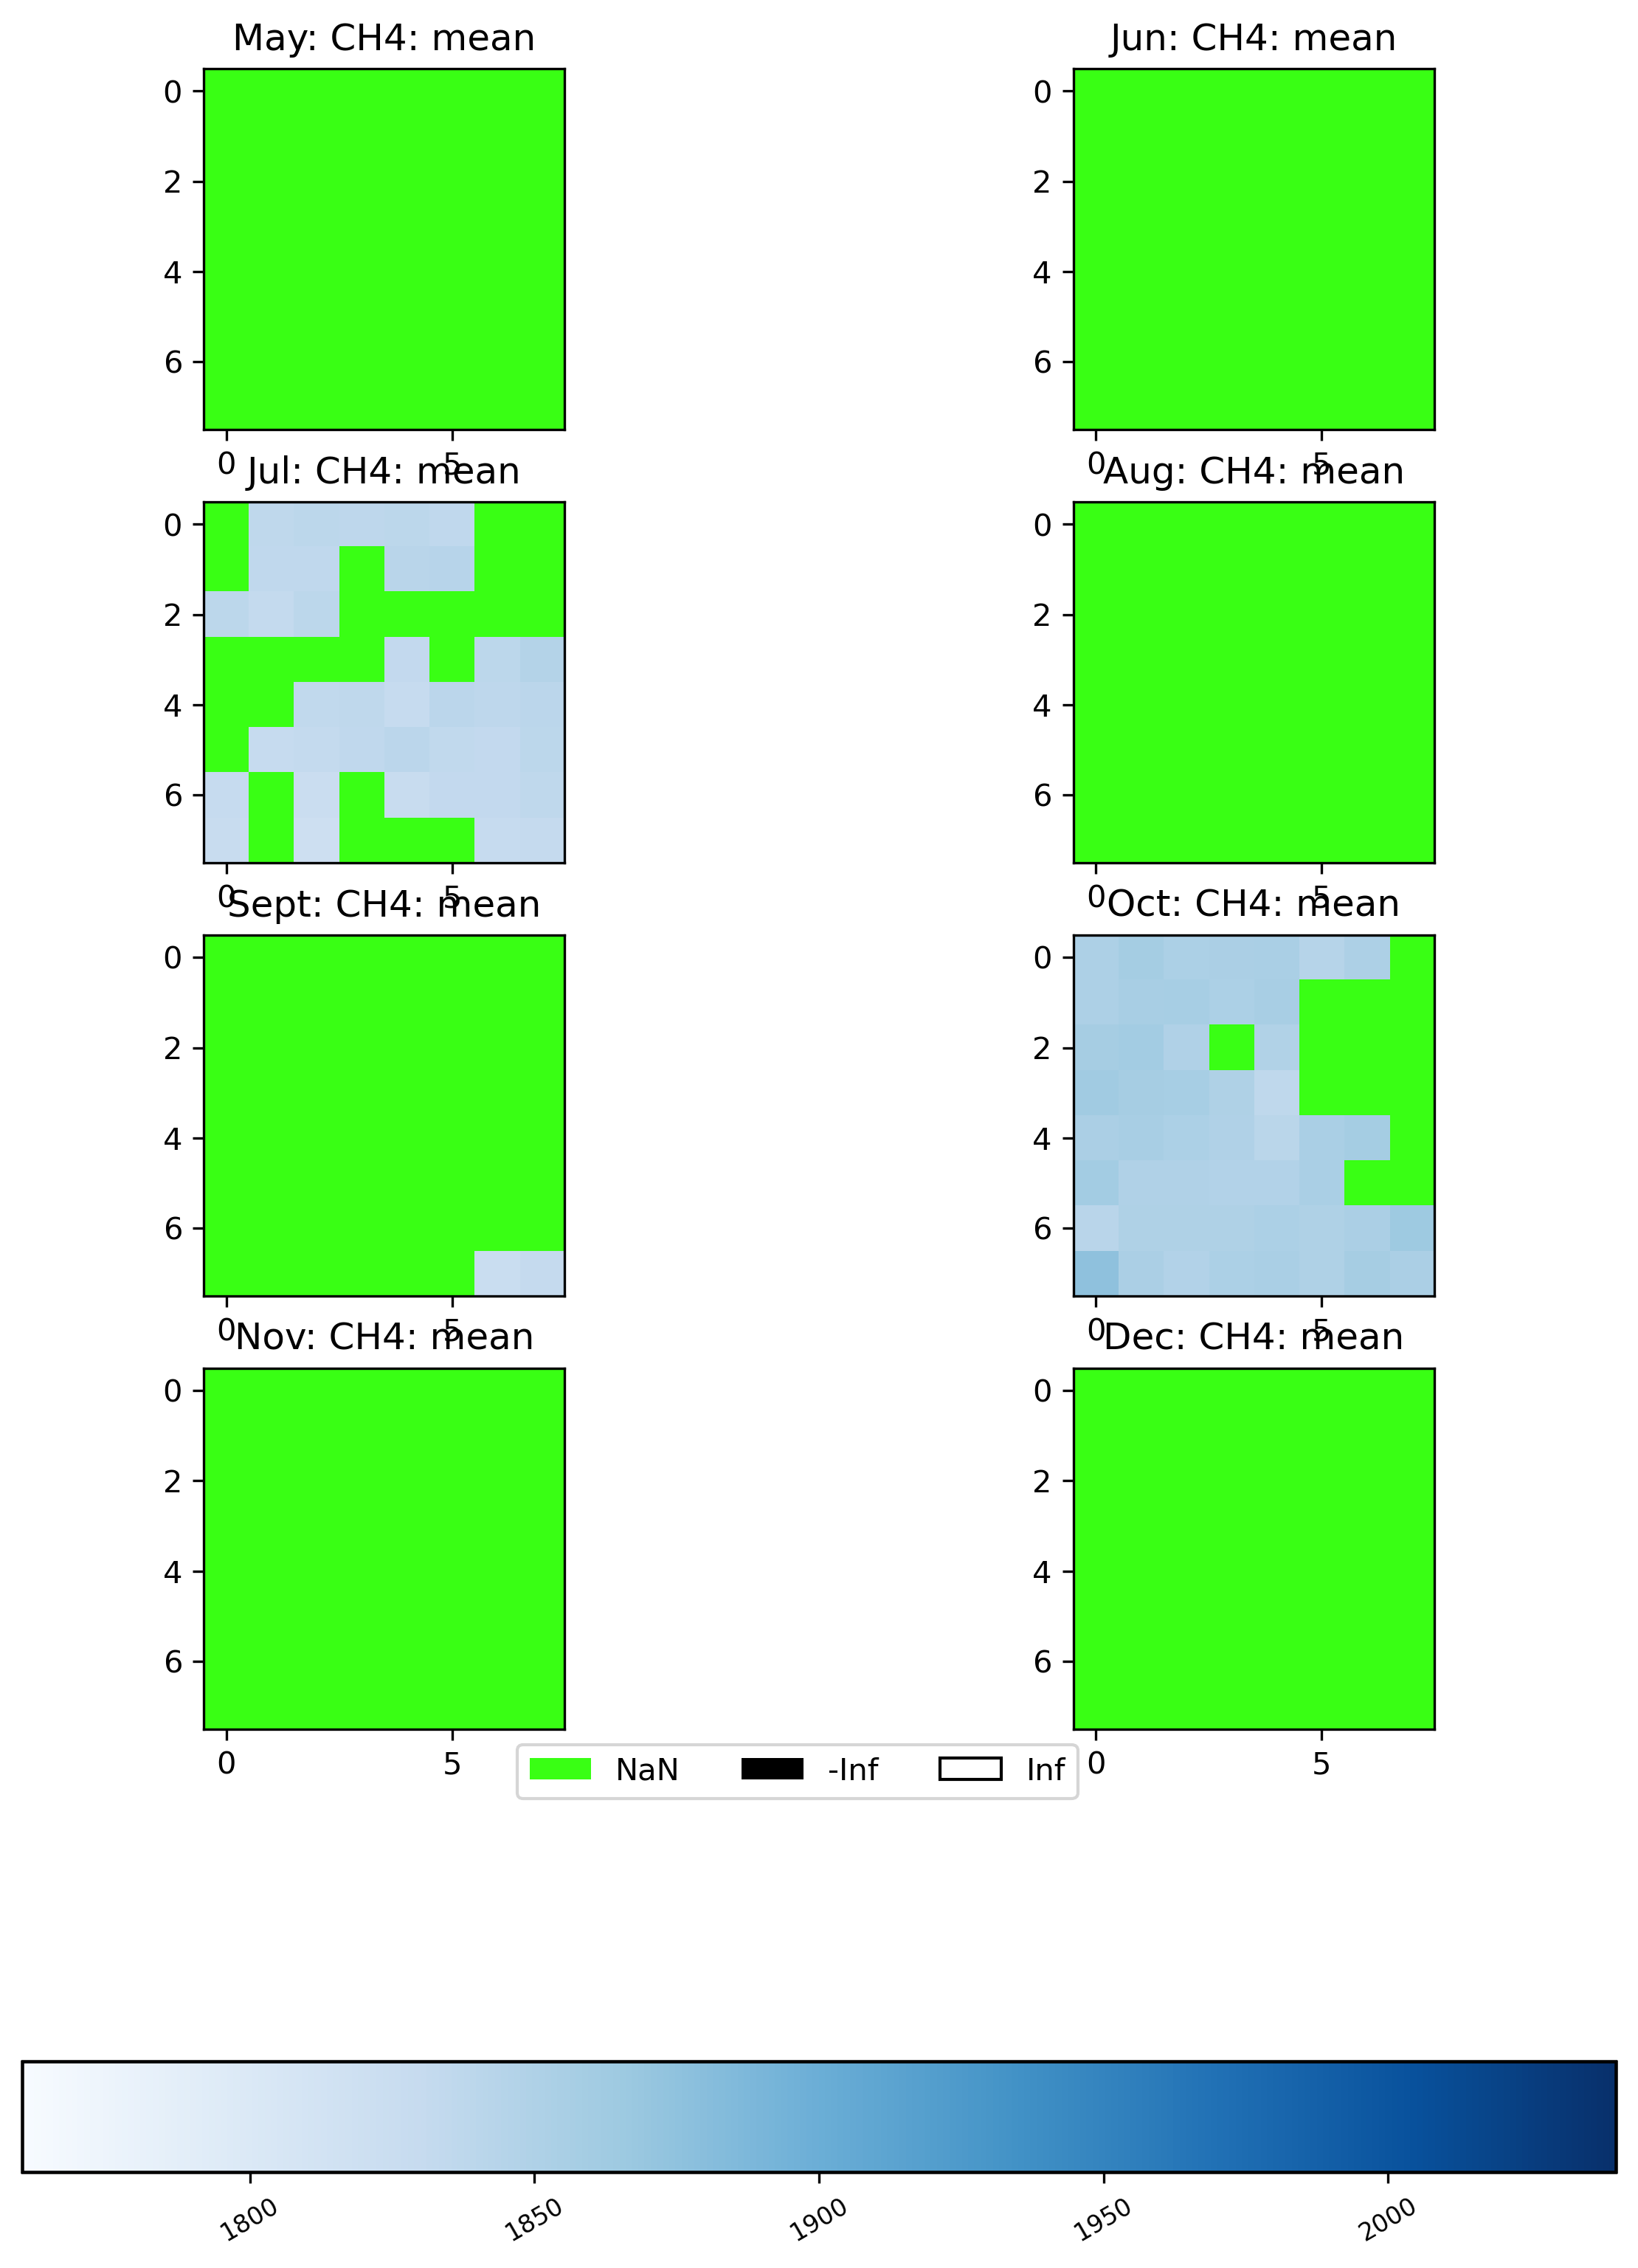

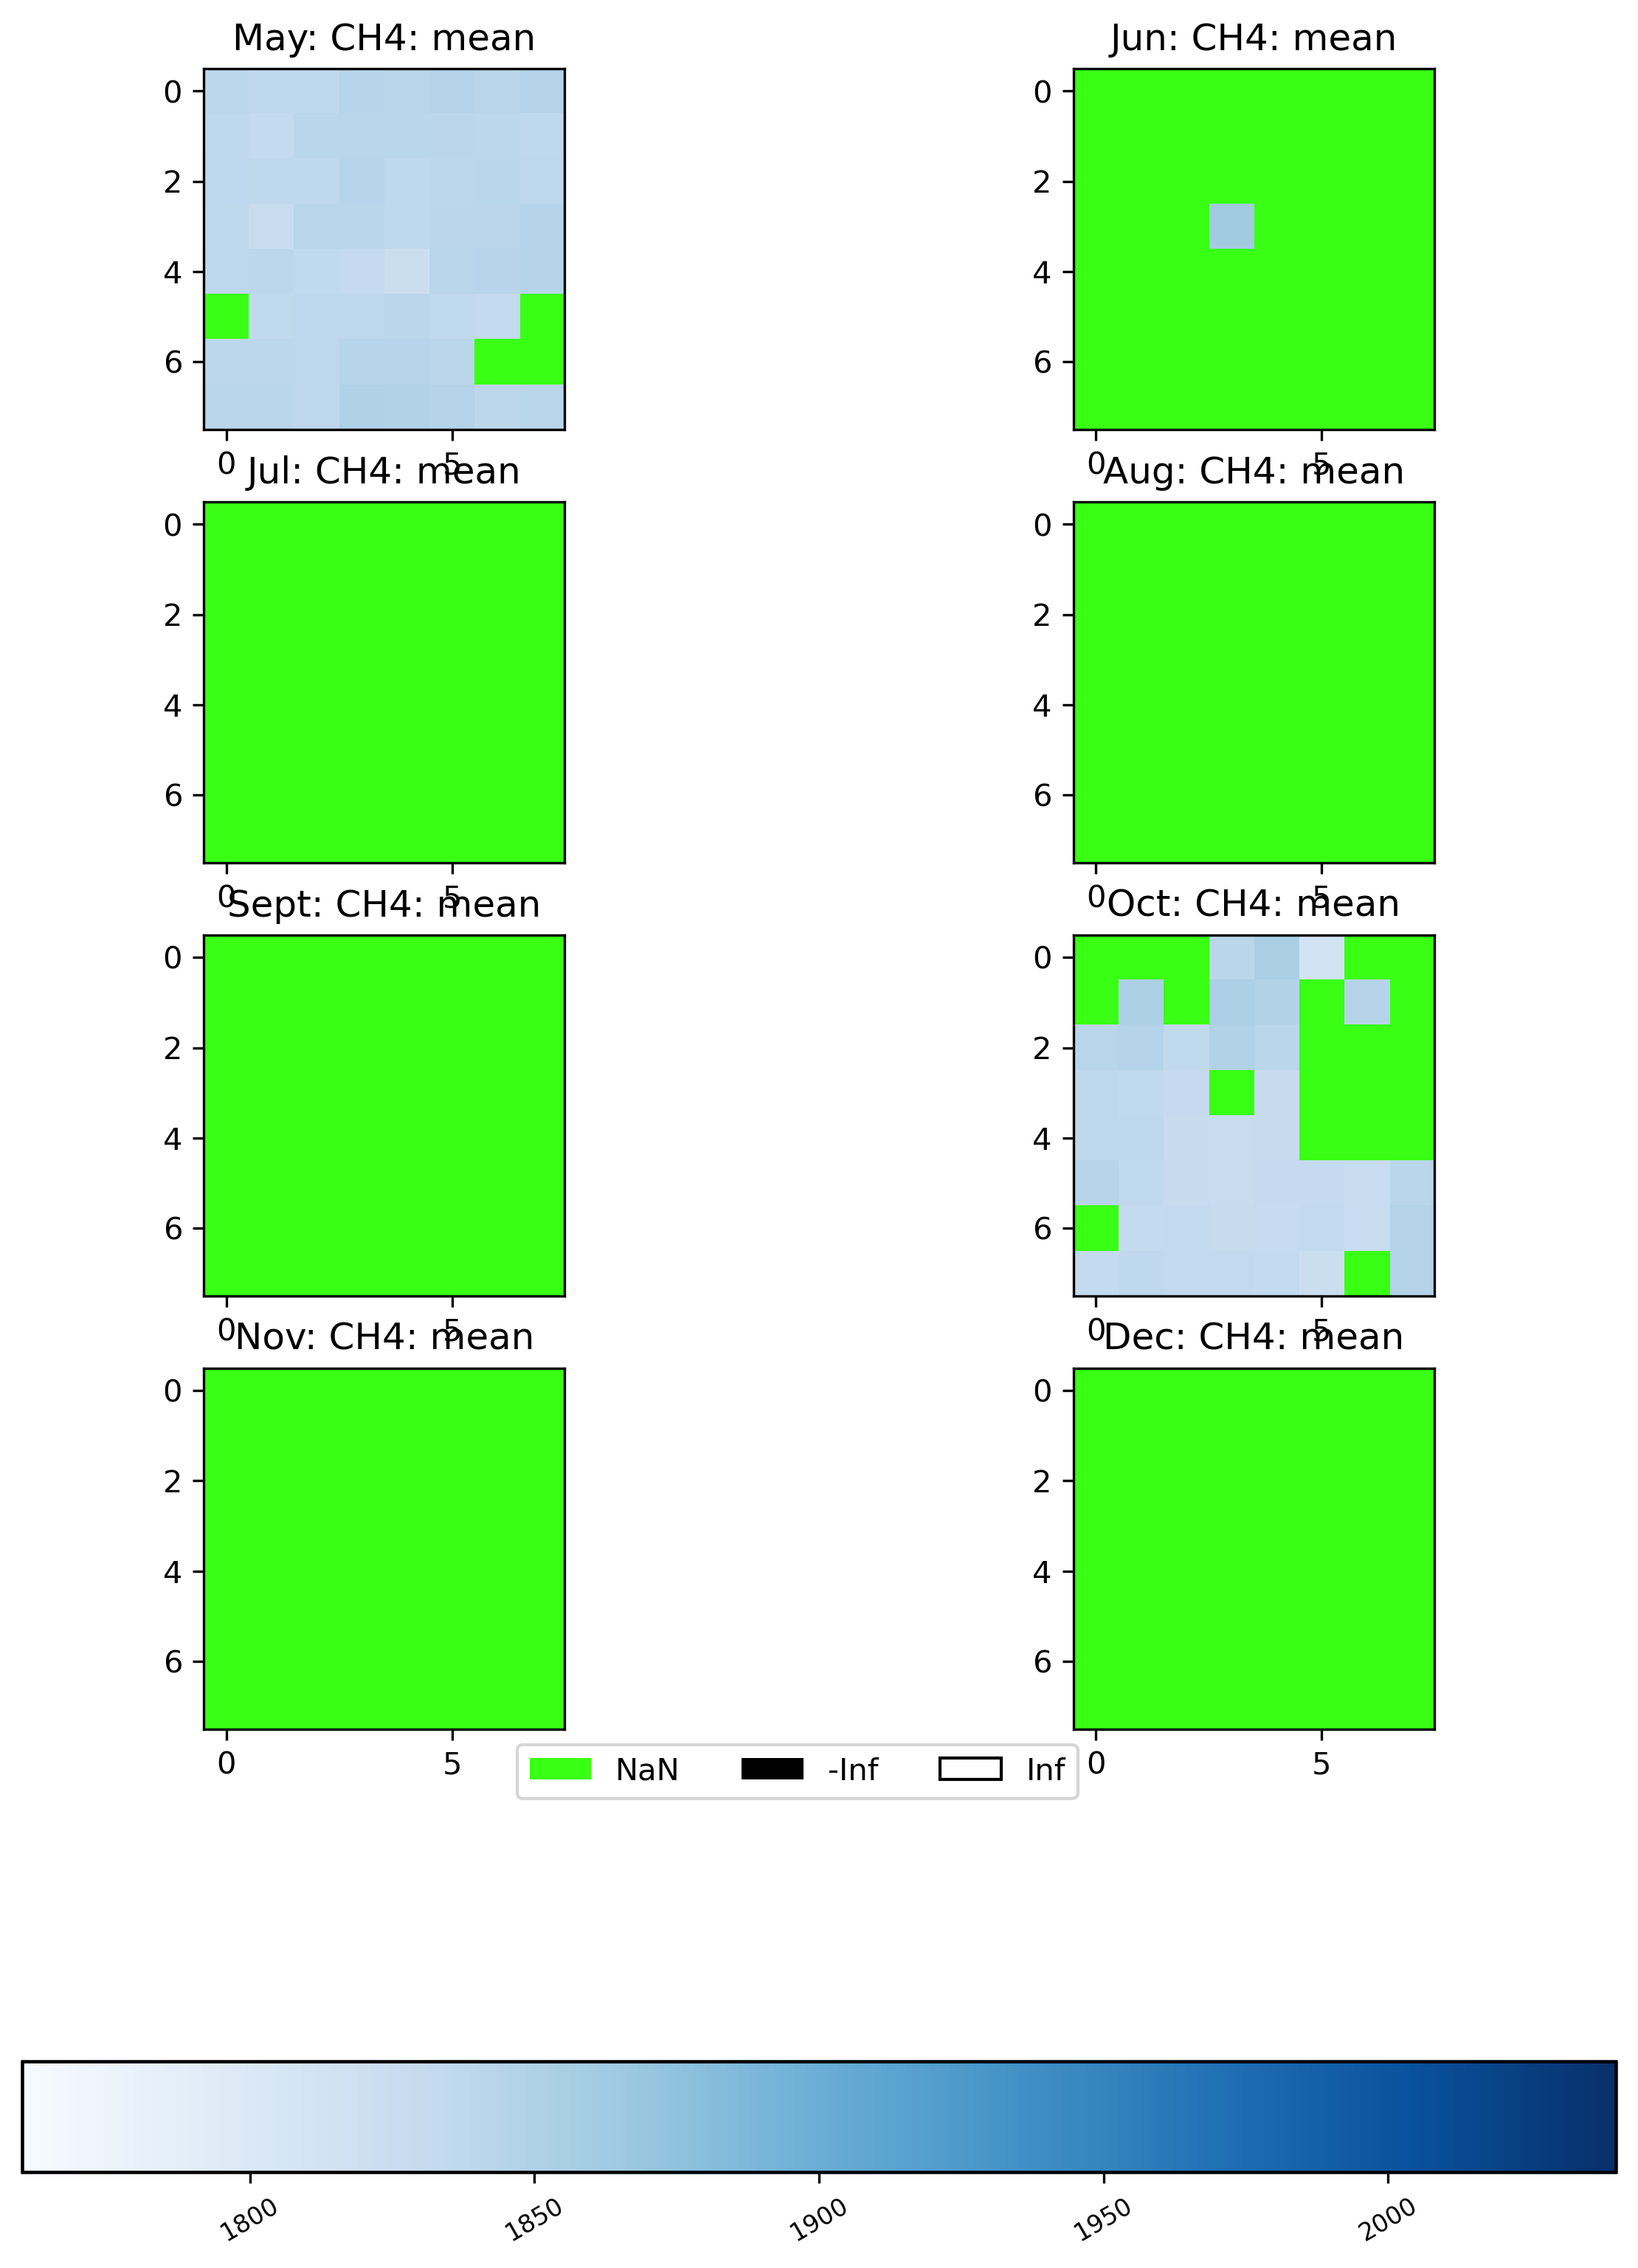

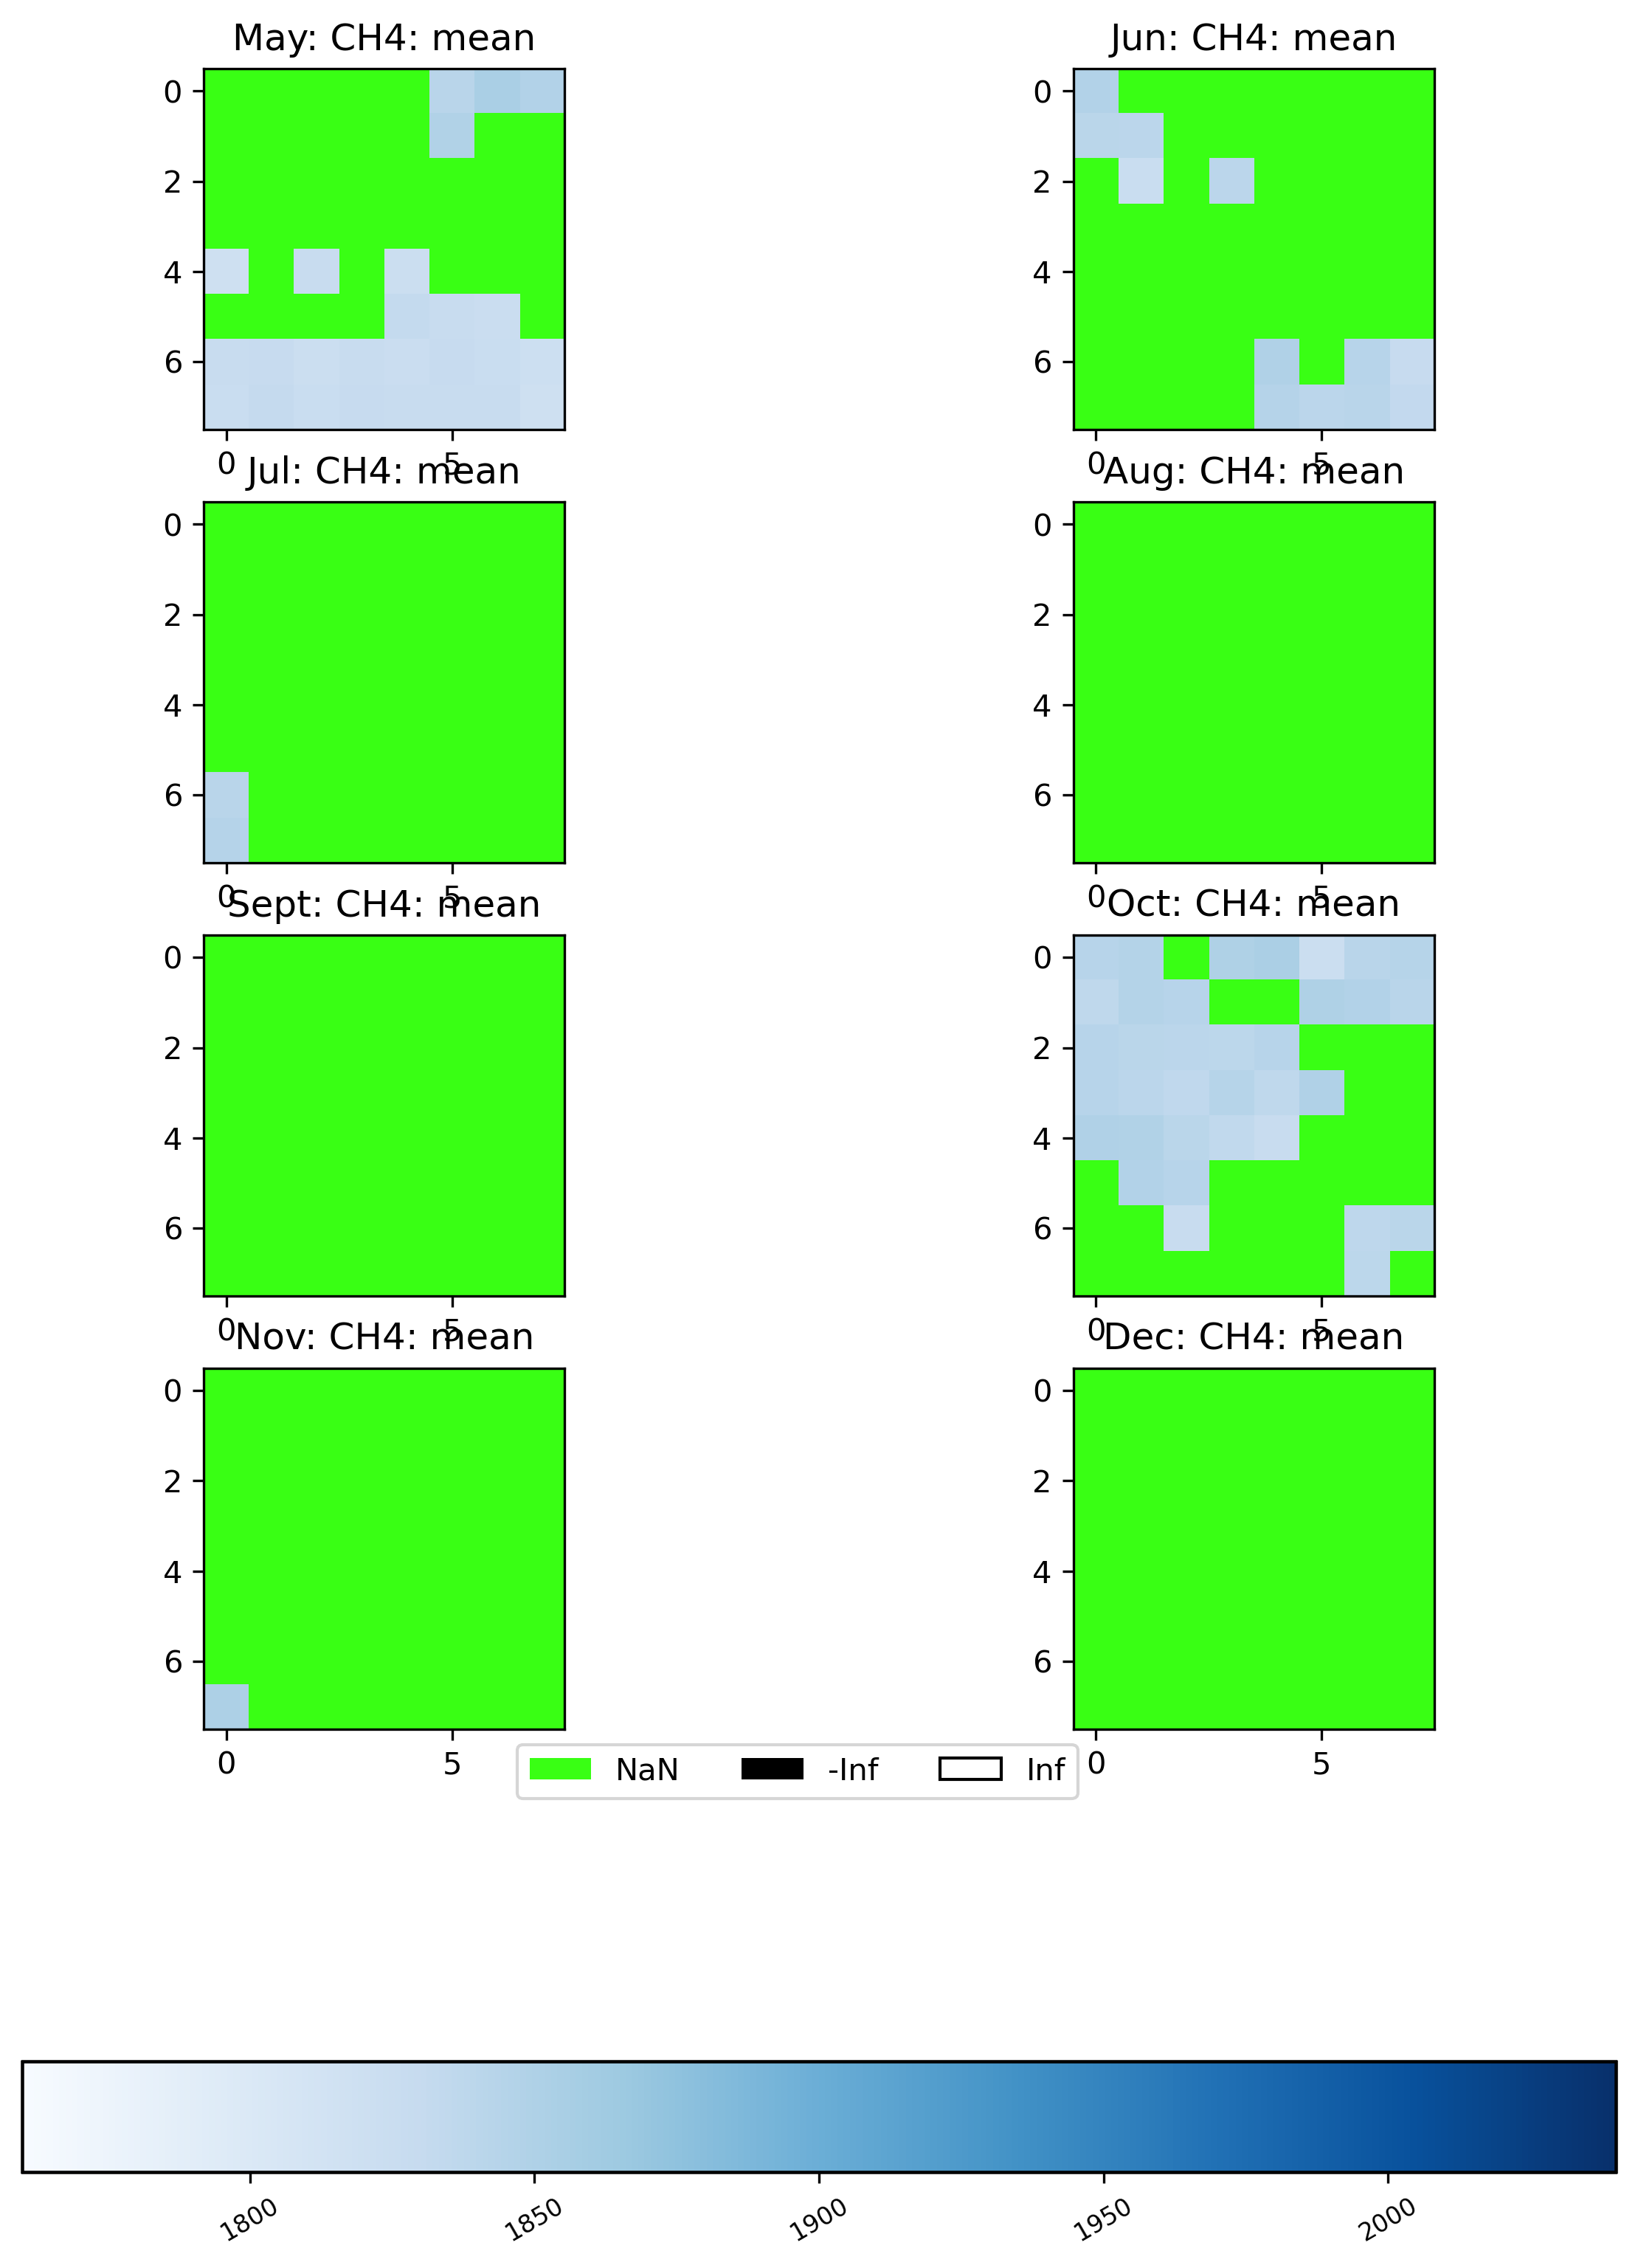

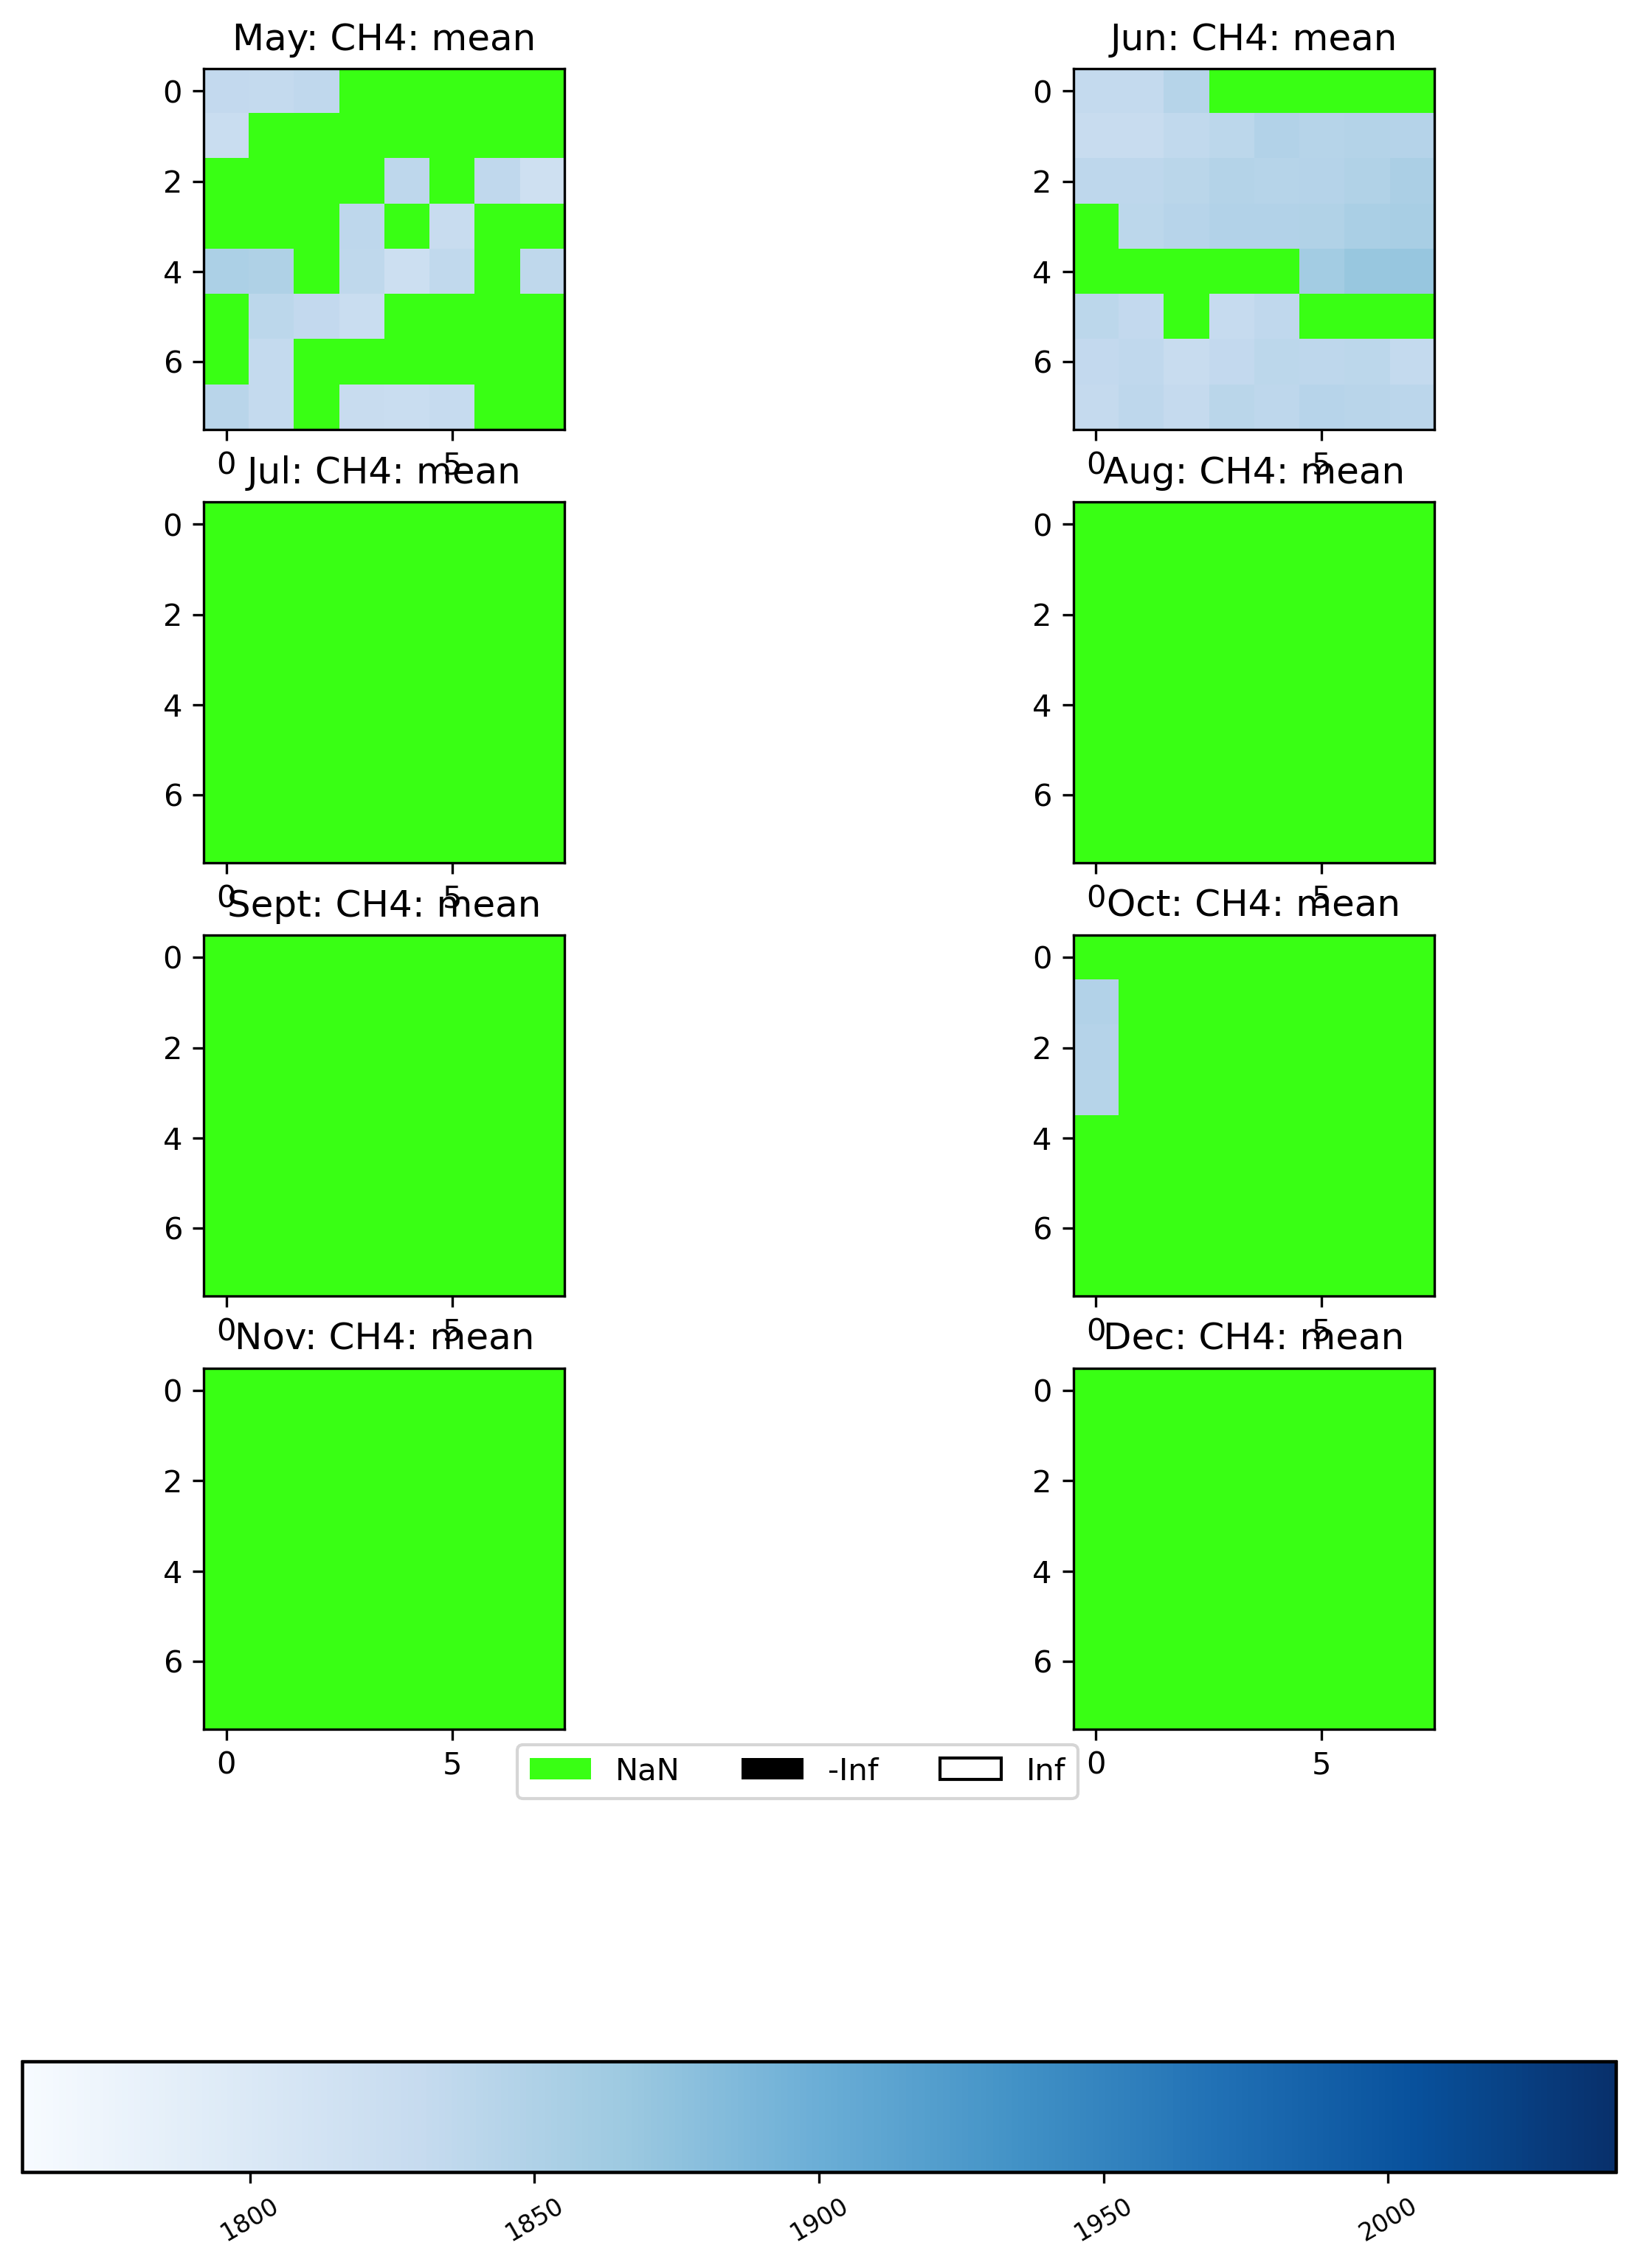

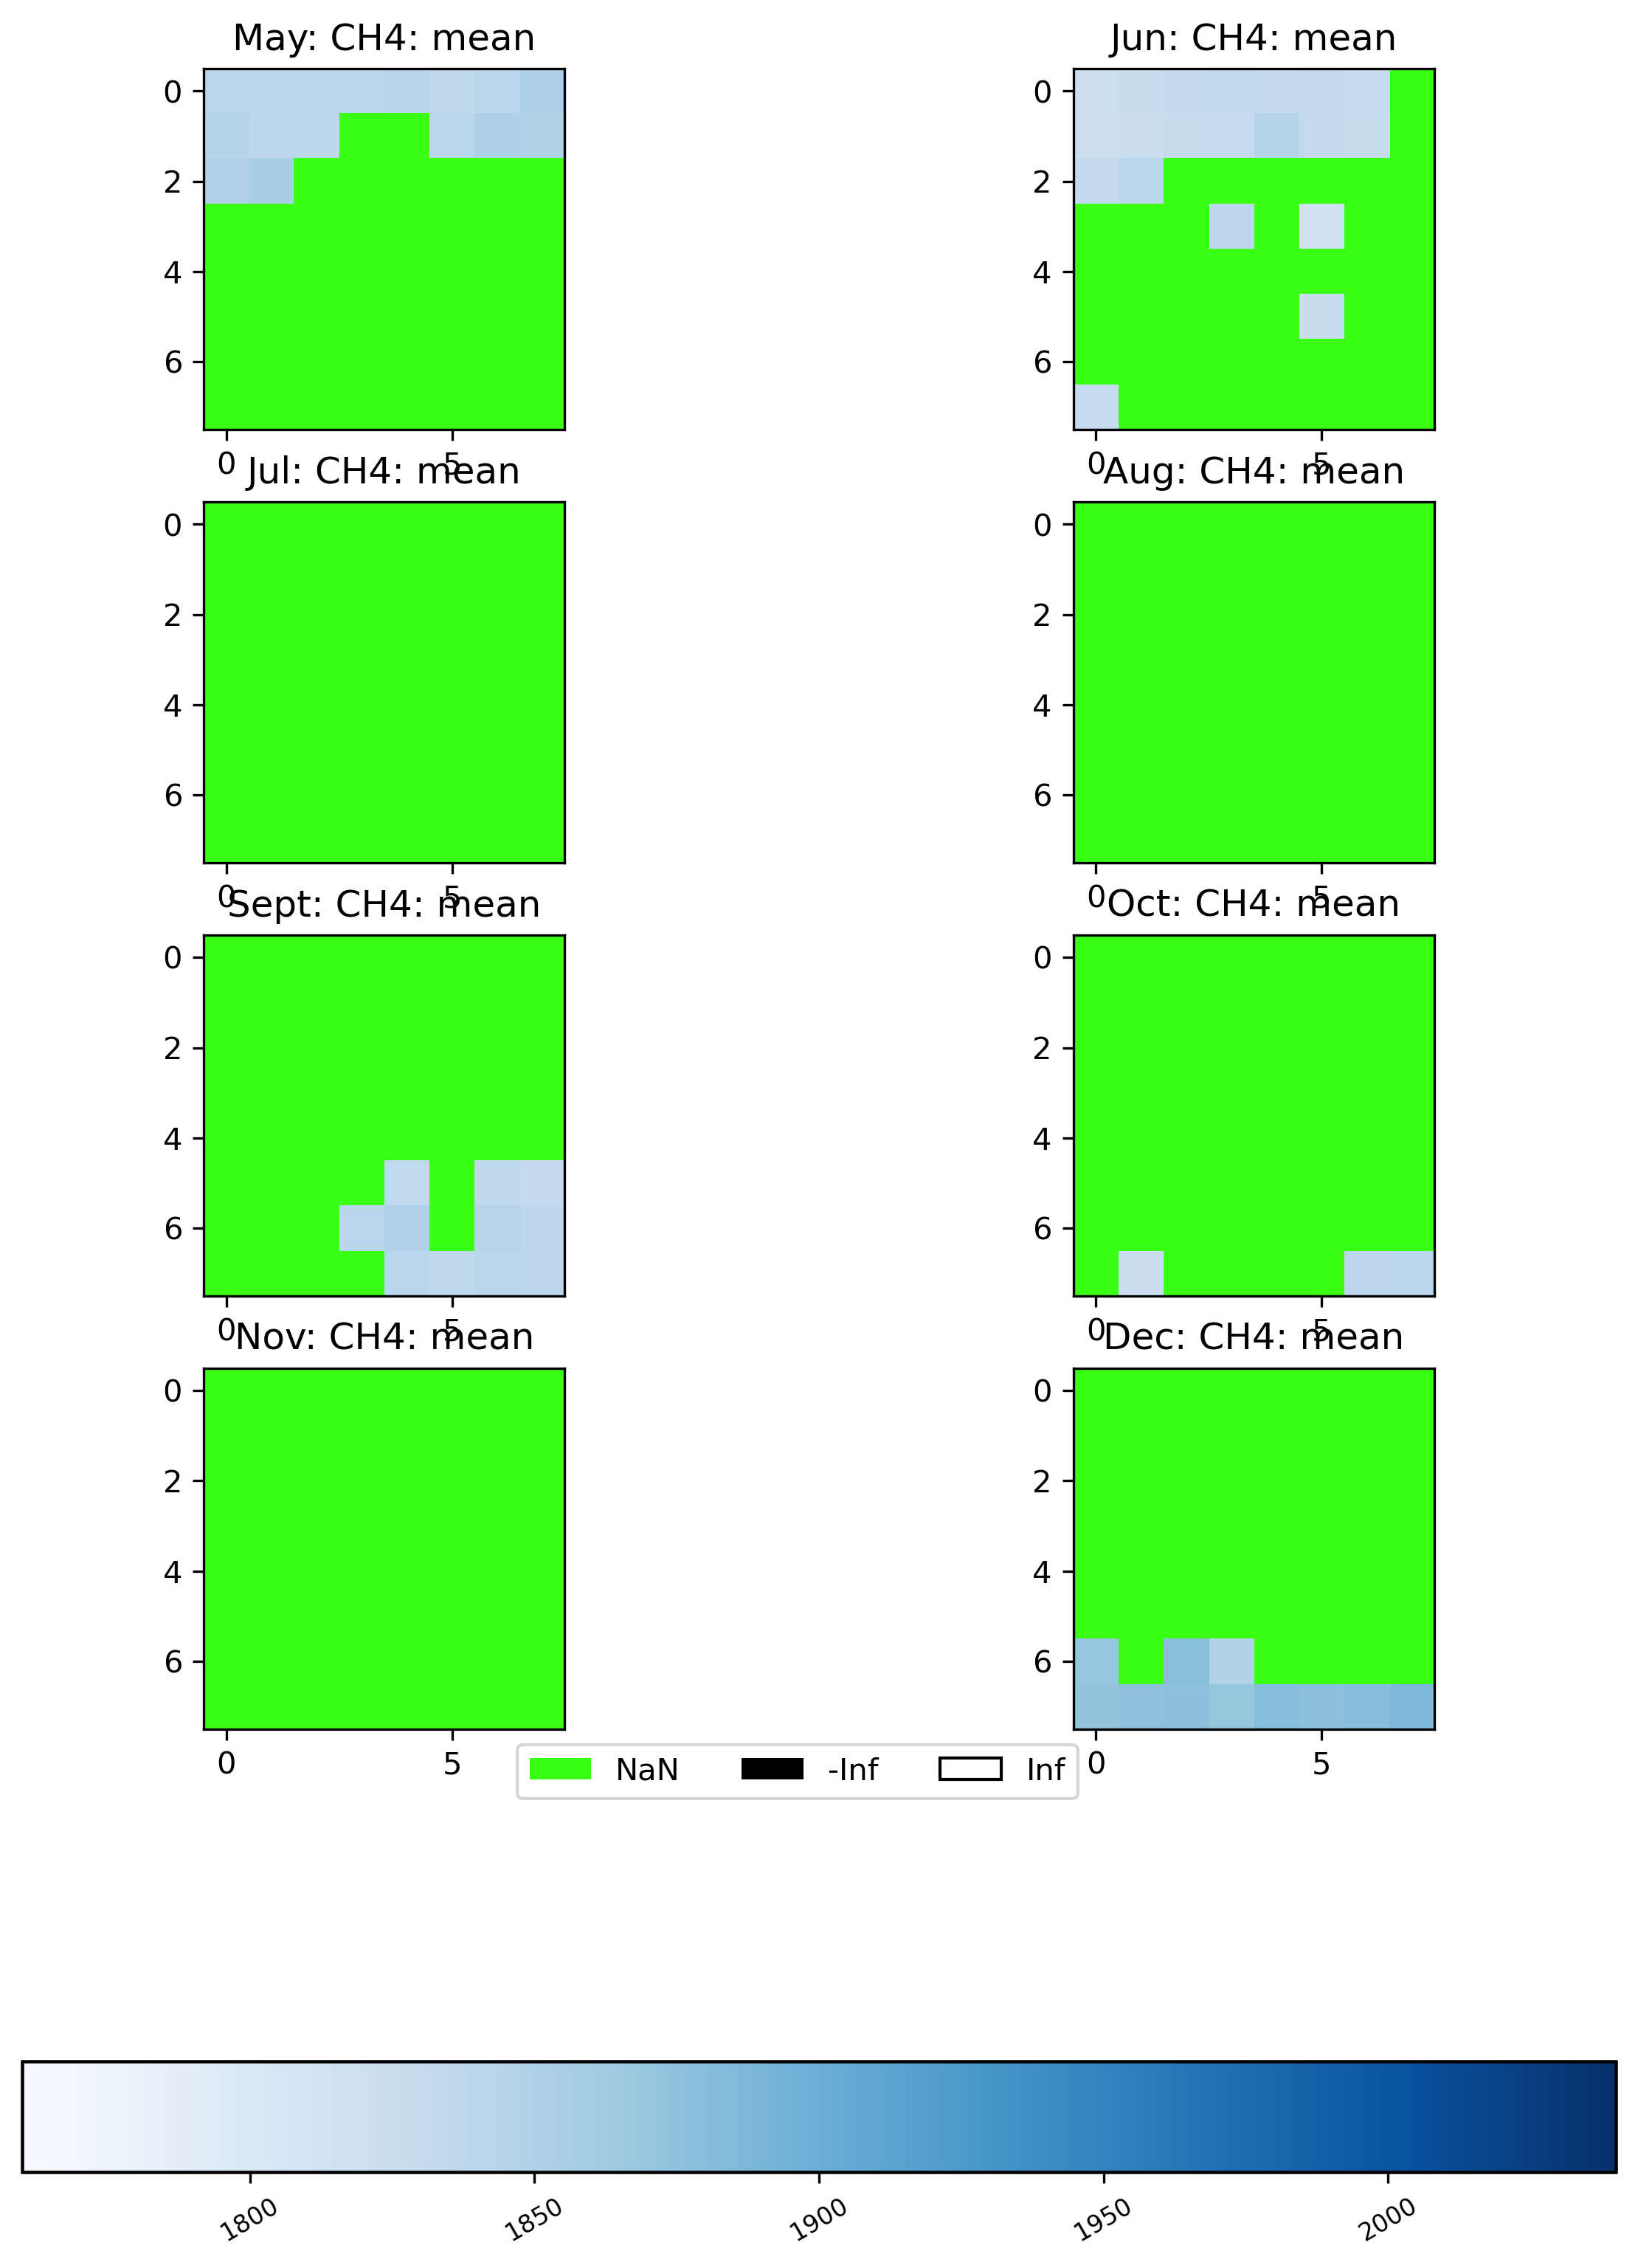

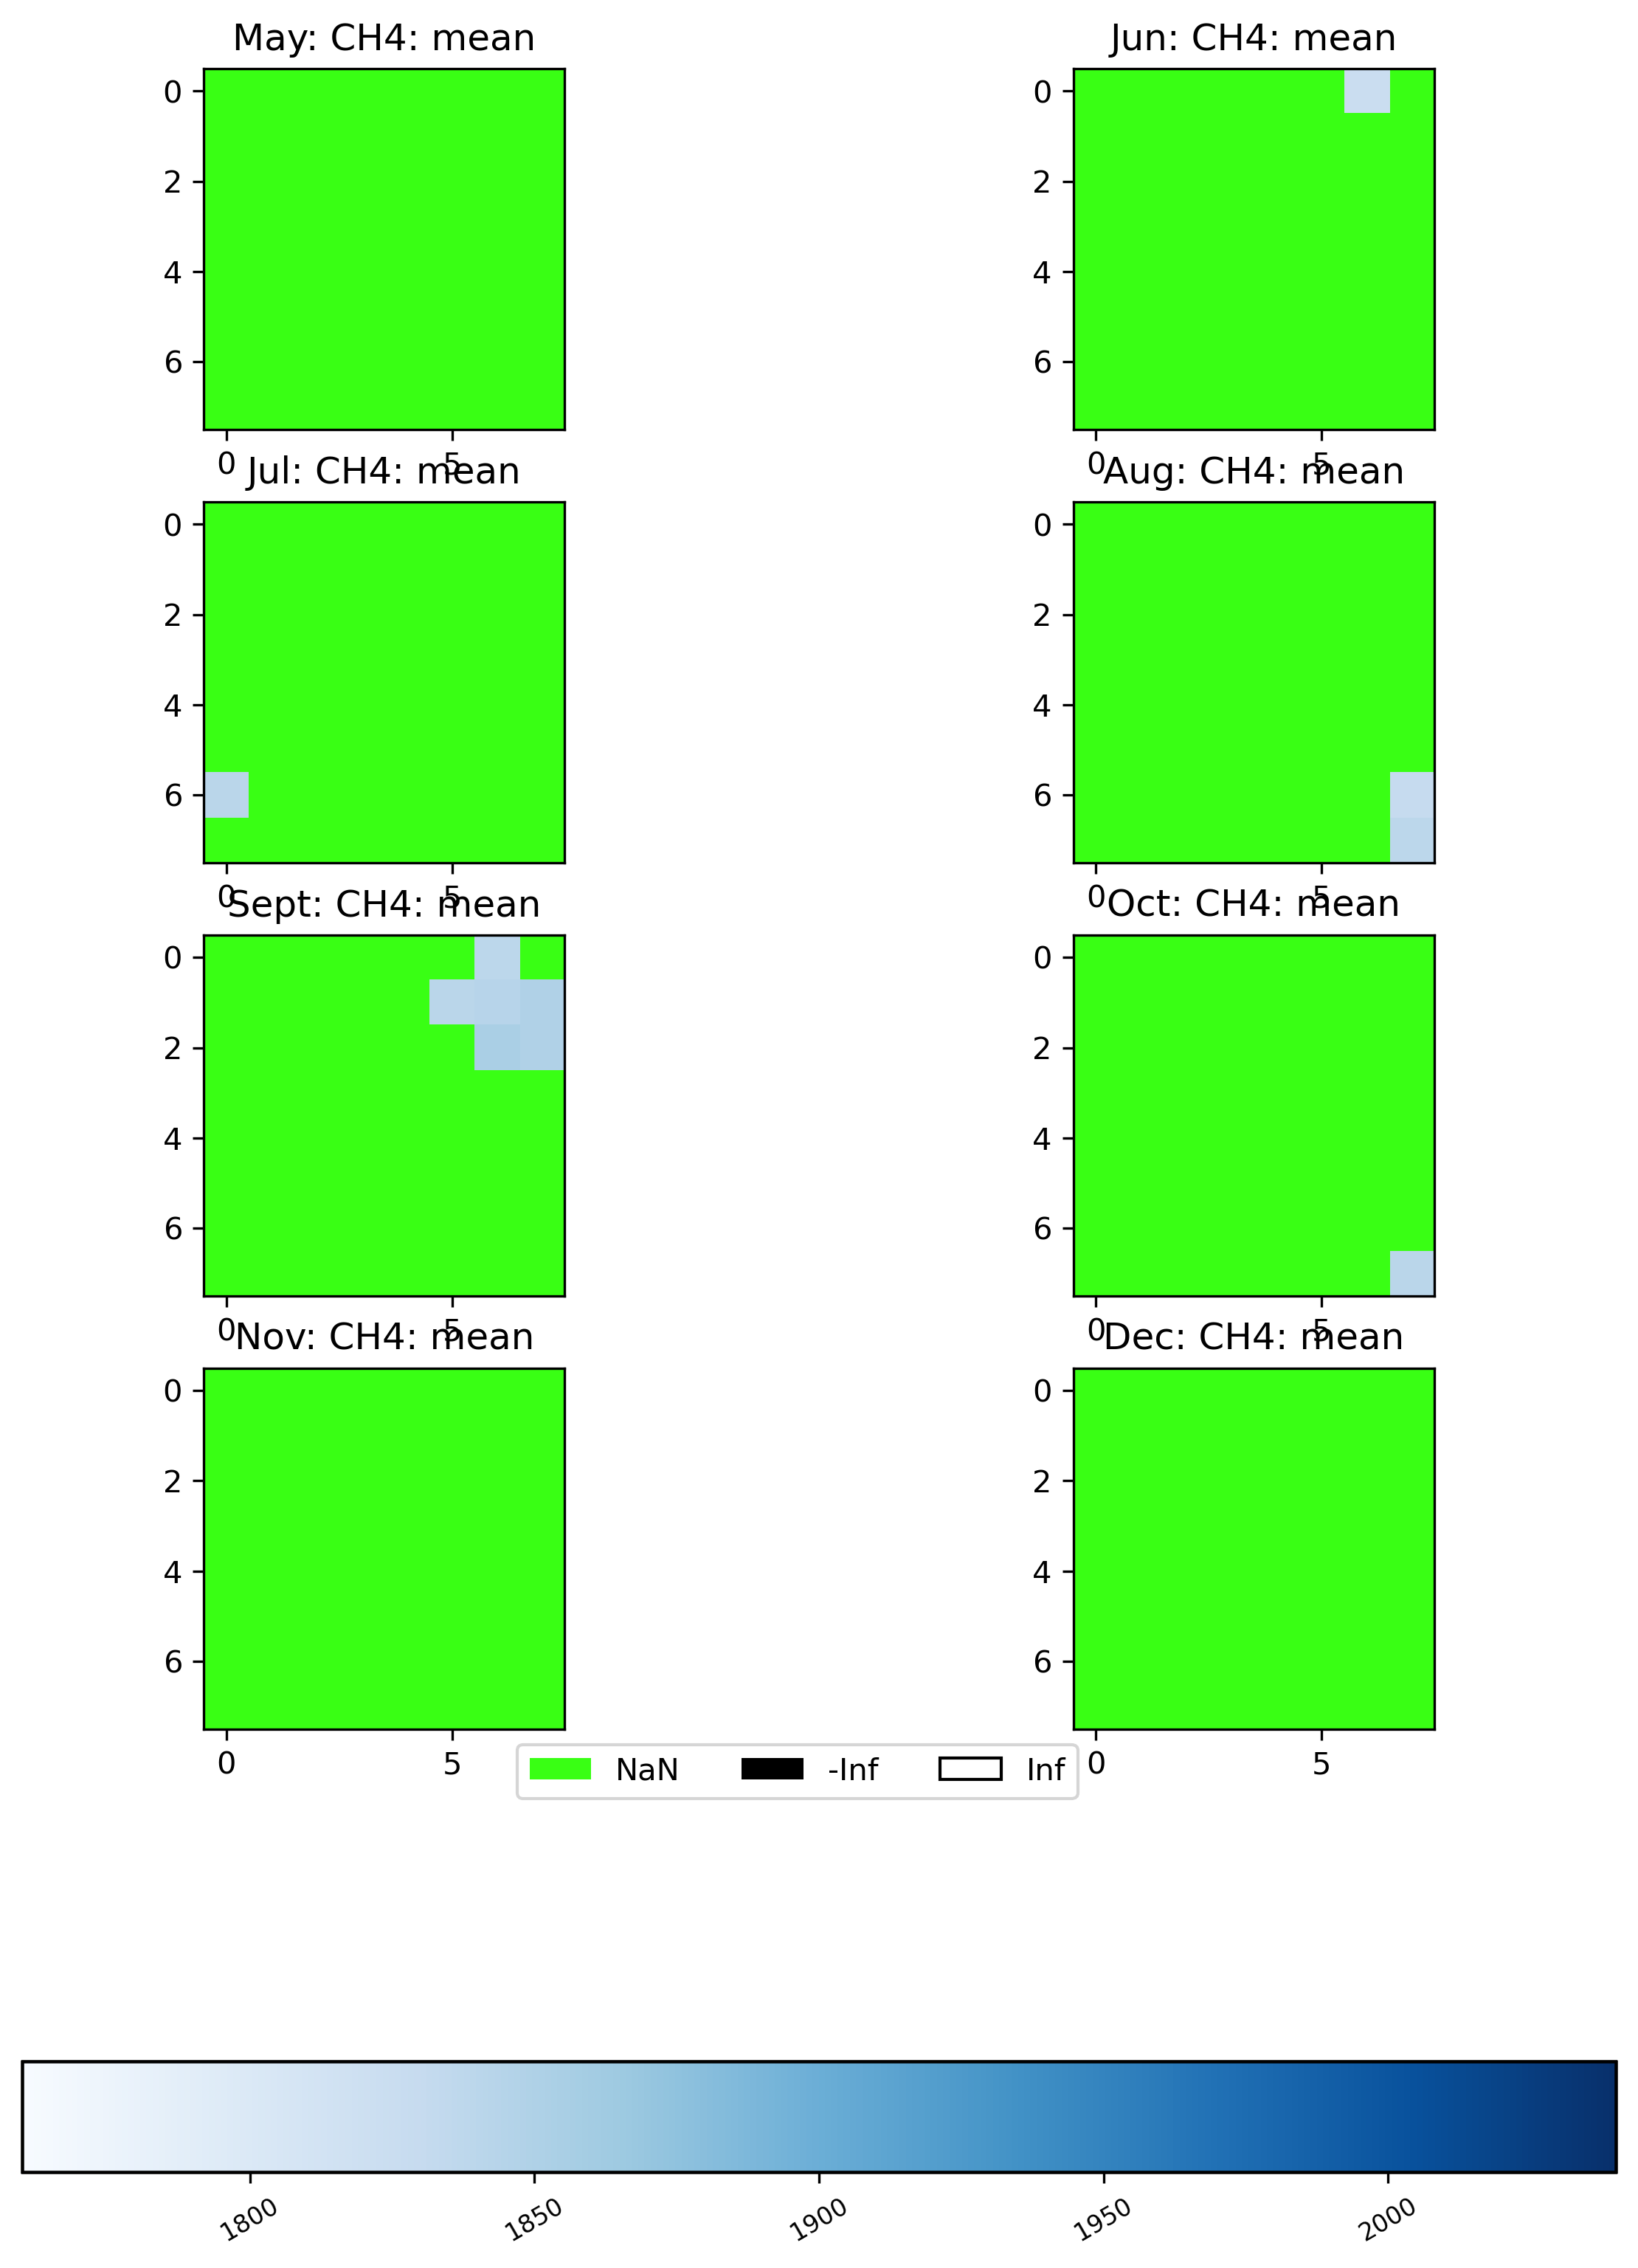

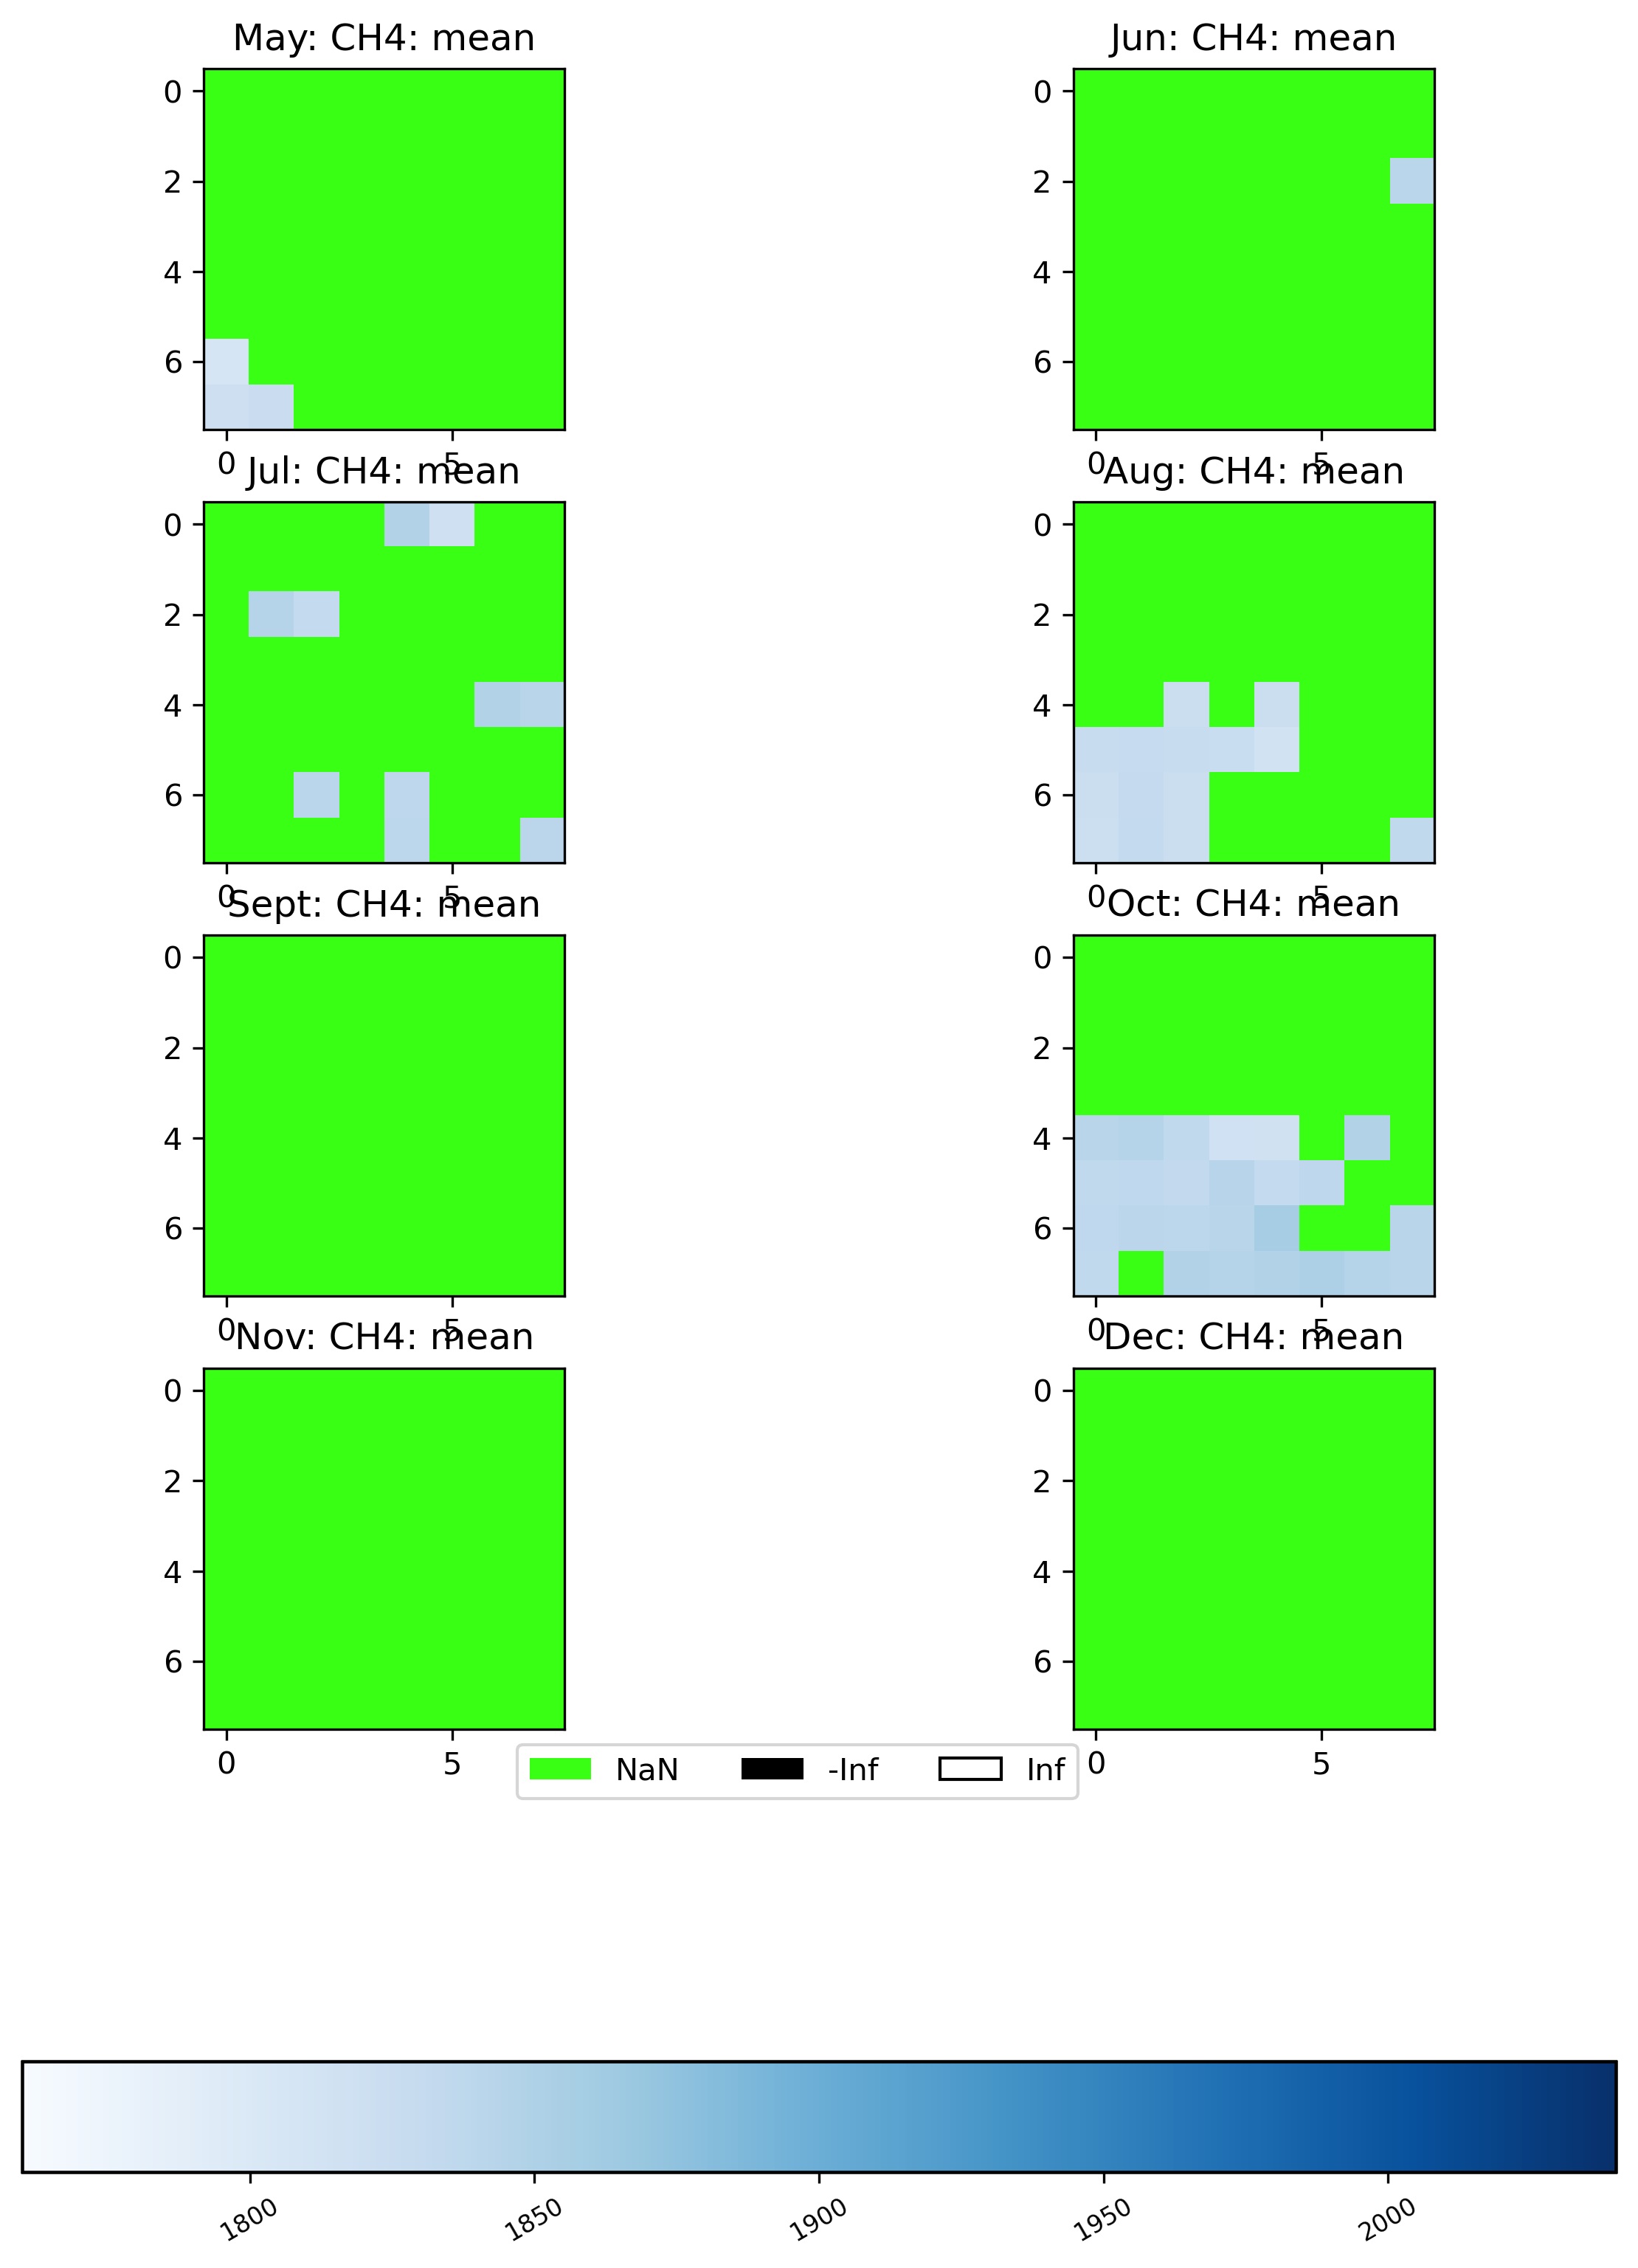

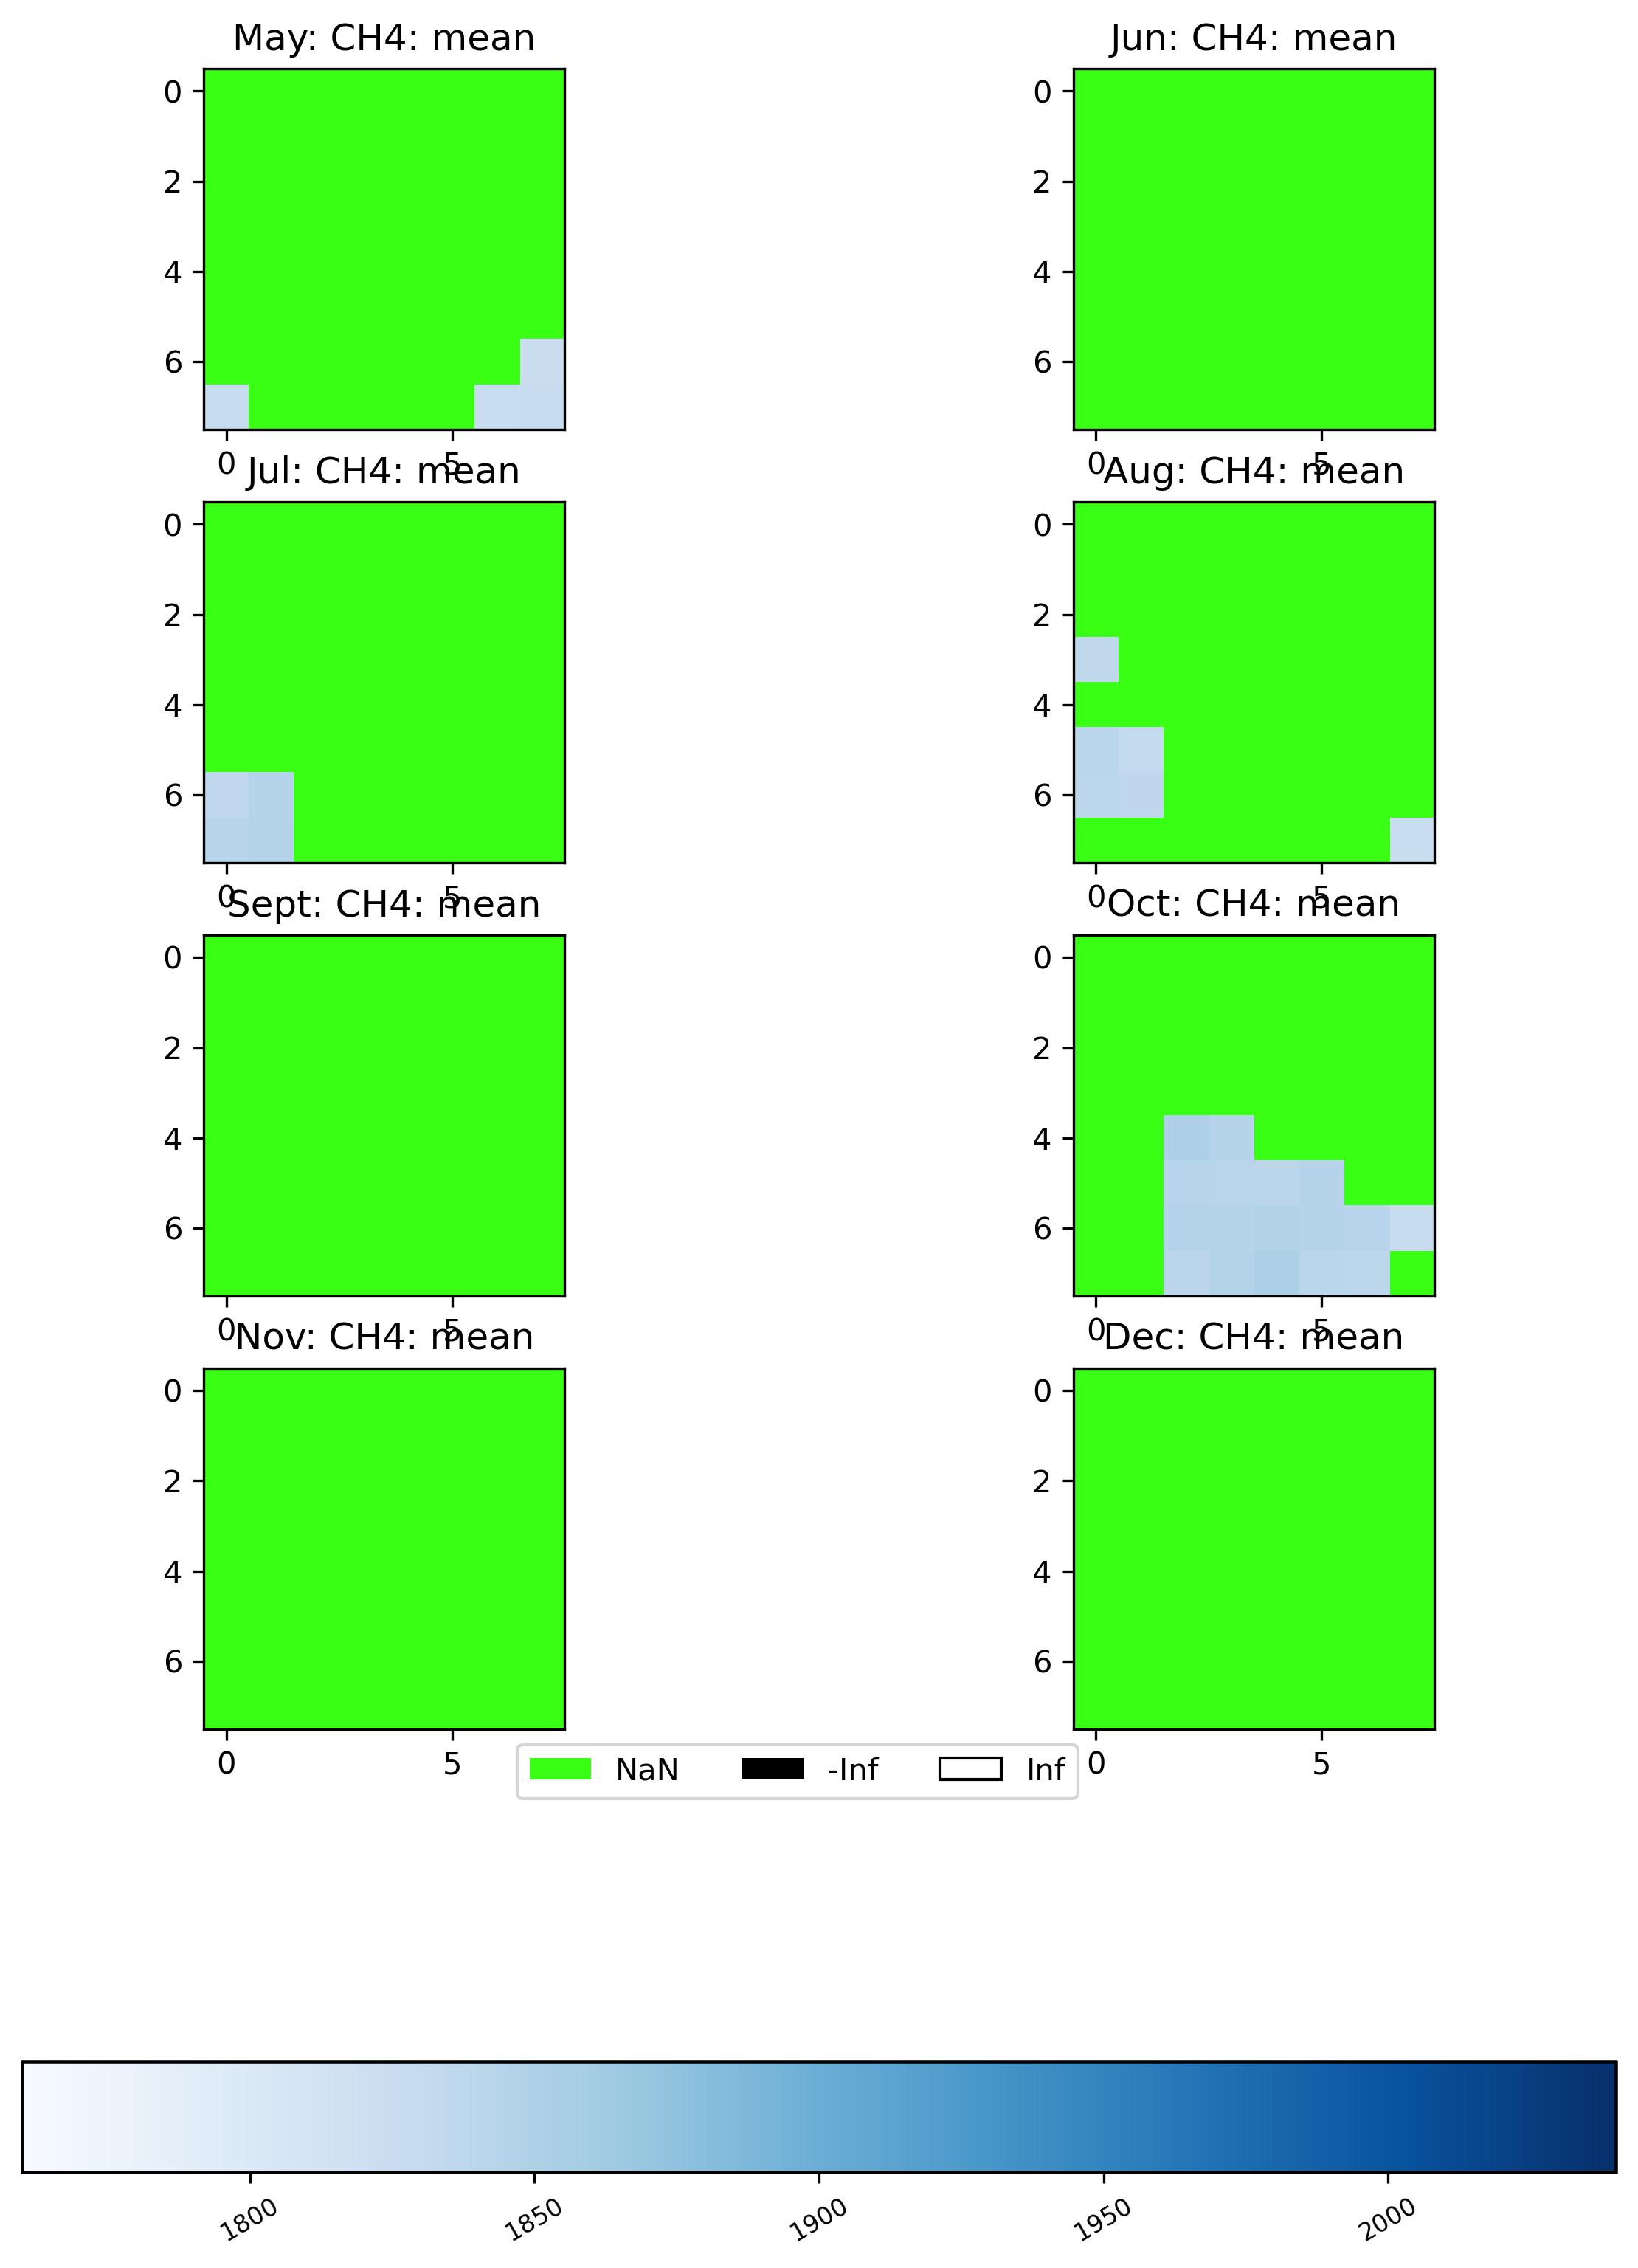

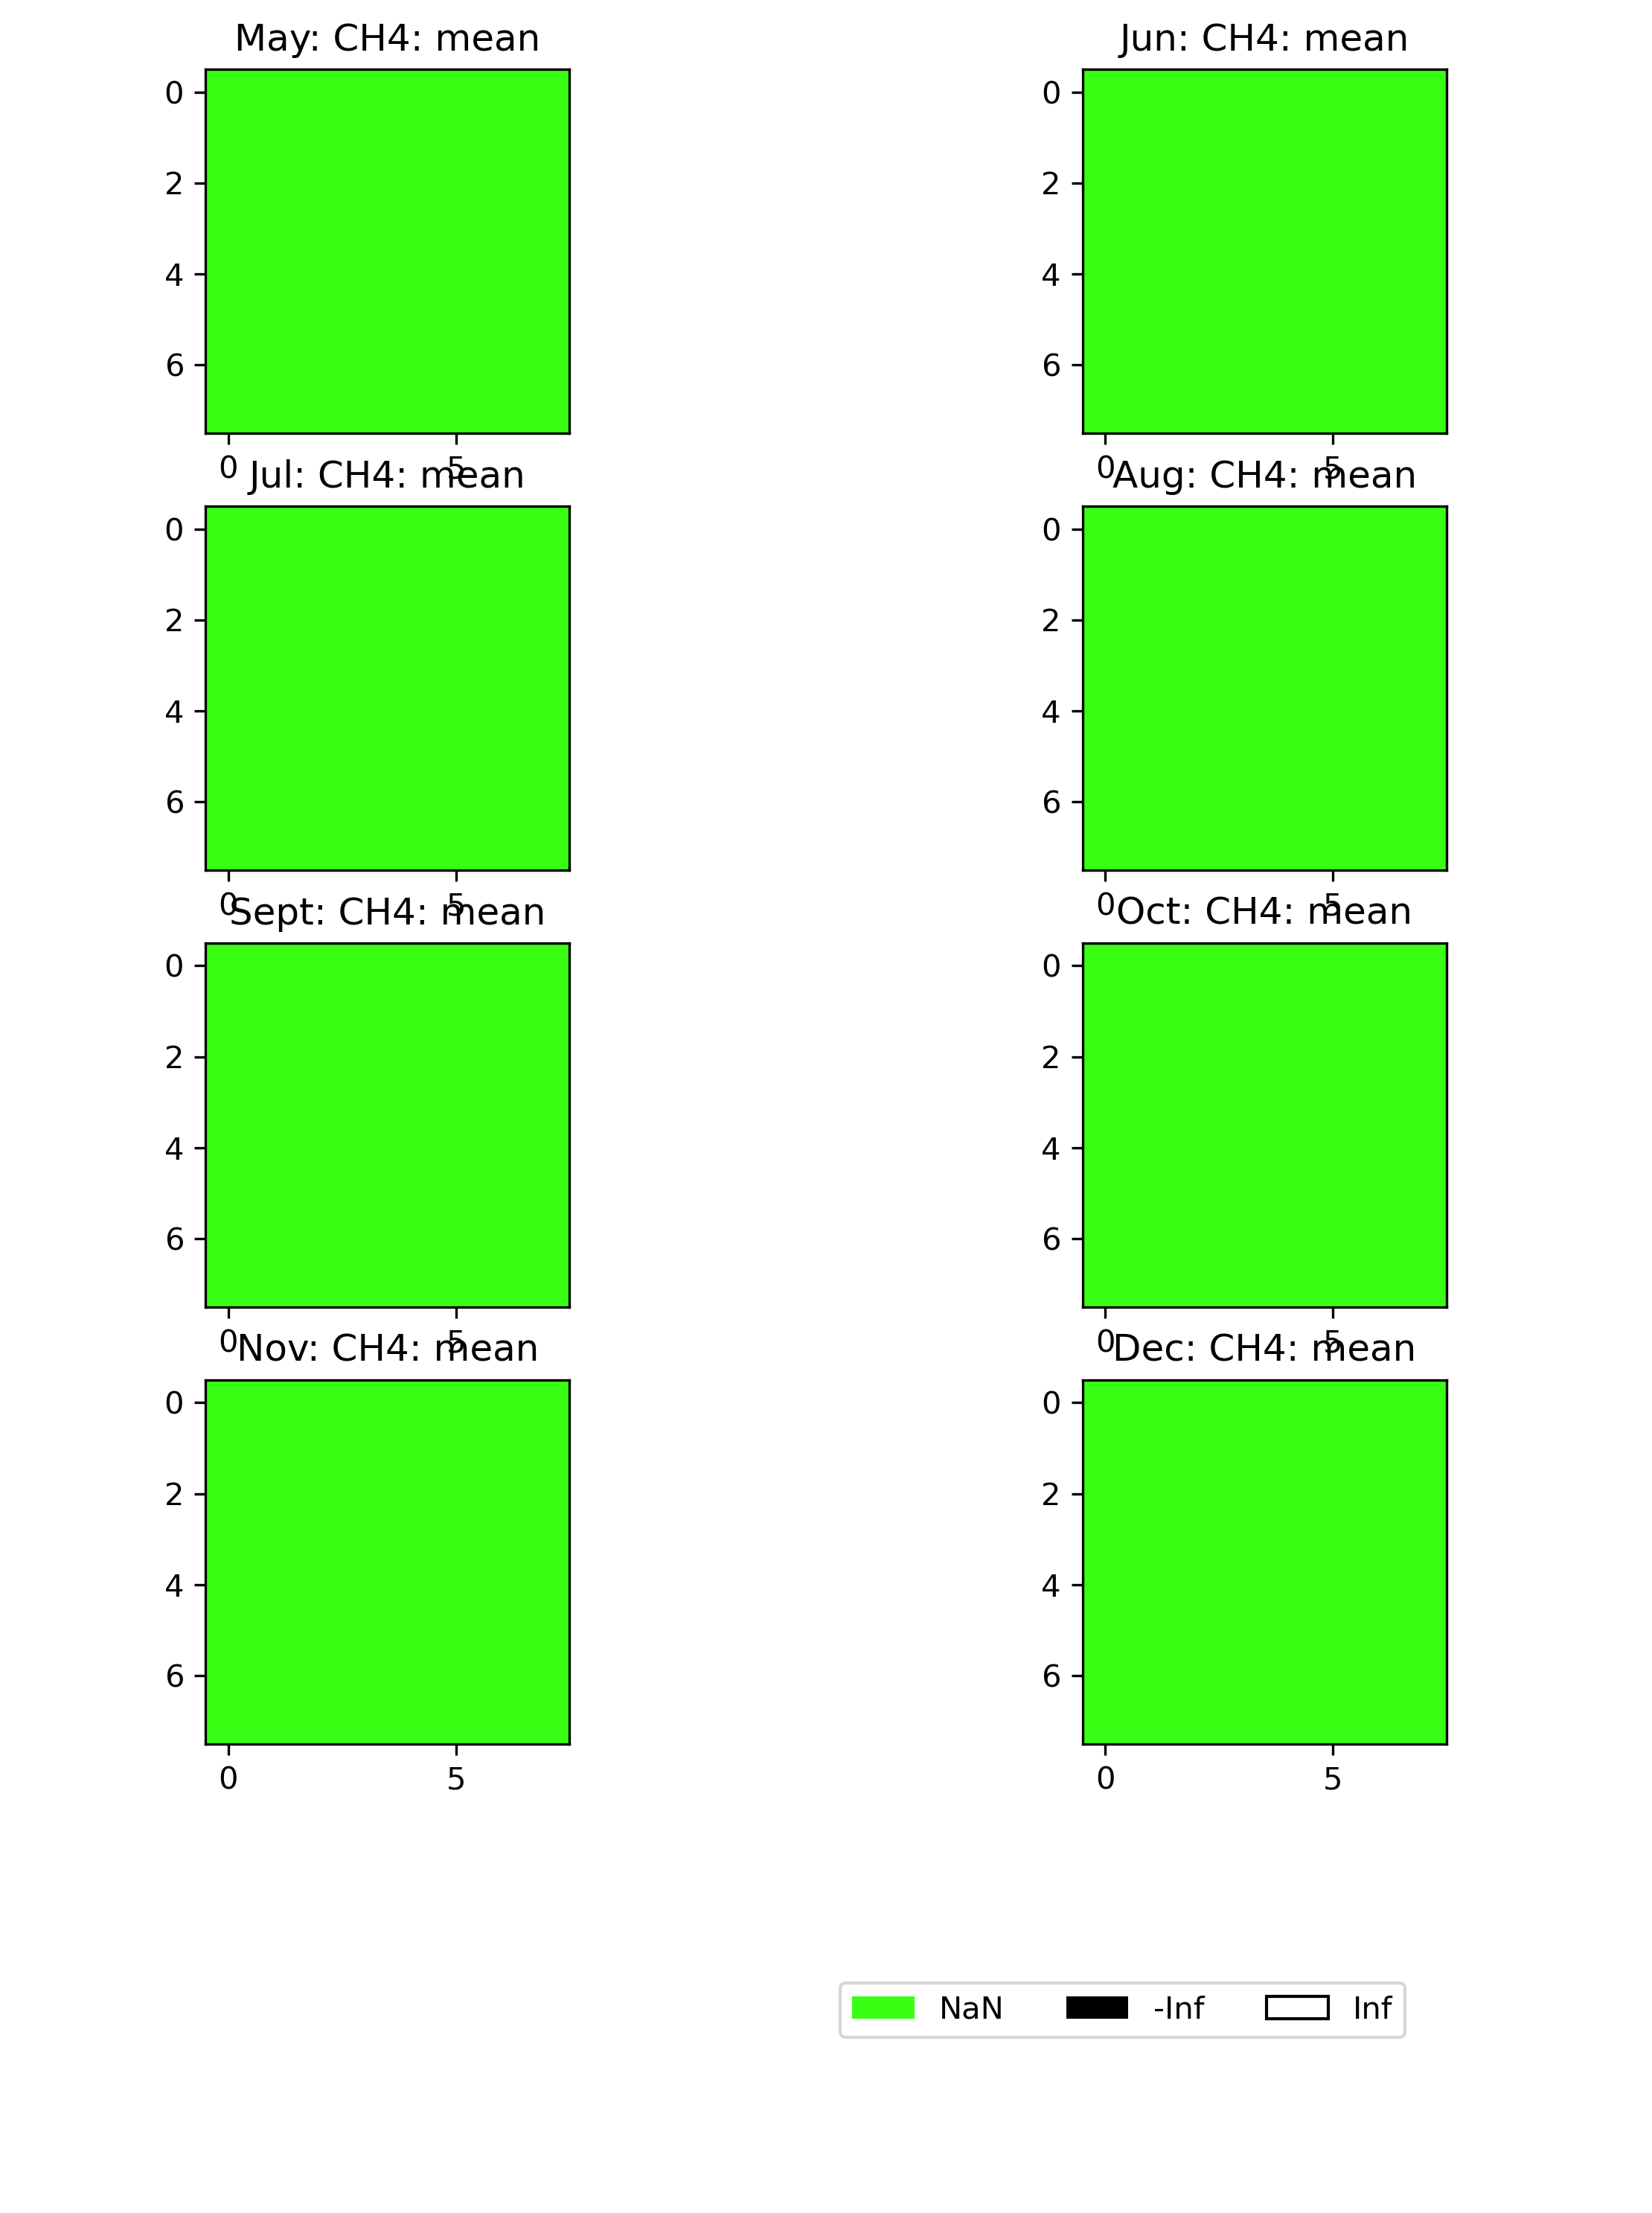

In [244]:
import matplotlib as mpl
import matplotlib.pyplot as plt
for i in range(0,32):
    ldcpy.plot(ds, "CH4", sets=["May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"], calc="mean", start=i, end=i, weighted=False, plot_type="spatial_nonglobe", cbar_min=1760, cbar_max=2040, color="Blues")
    if i < 10:
        plt.savefig(f"../../plots/methane/2018Bakken/2018Bakken0{i}.png", bbox_inches="tight")
    else:
        plt.savefig(f"../../plots/methane/2018Bakken/2018Bakken{i}.png", bbox_inches="tight")